## Pregunta 1: Estimadores de theta
### Método de Momentos


======= Analysis for Key: 195557 =======
Method of Moments estimator for θ: -0.9304185 
Maximum Likelihood estimator for θ: -0.6028039 
Sample size: 20 
Sample minimum: -0.6028039 
Sample maximum: 0.9399623 
Sample range: 1.542766 
Sample mean: 0.06958153 
Sample variance: 0.2408897 
Theoretical variance for U(θ, θ+2): 0.3333333 

======= Analysis for Key: 196891 =======
Method of Moments estimator for θ: -1.228618 
Maximum Likelihood estimator for θ: -0.9230087 
Sample size: 20 
Sample minimum: -0.9230087 
Sample maximum: 0.7228458 
Sample range: 1.645854 
Sample mean: -0.228618 
Sample variance: 0.2306799 
Theoretical variance for U(θ, θ+2): 0.3333333 


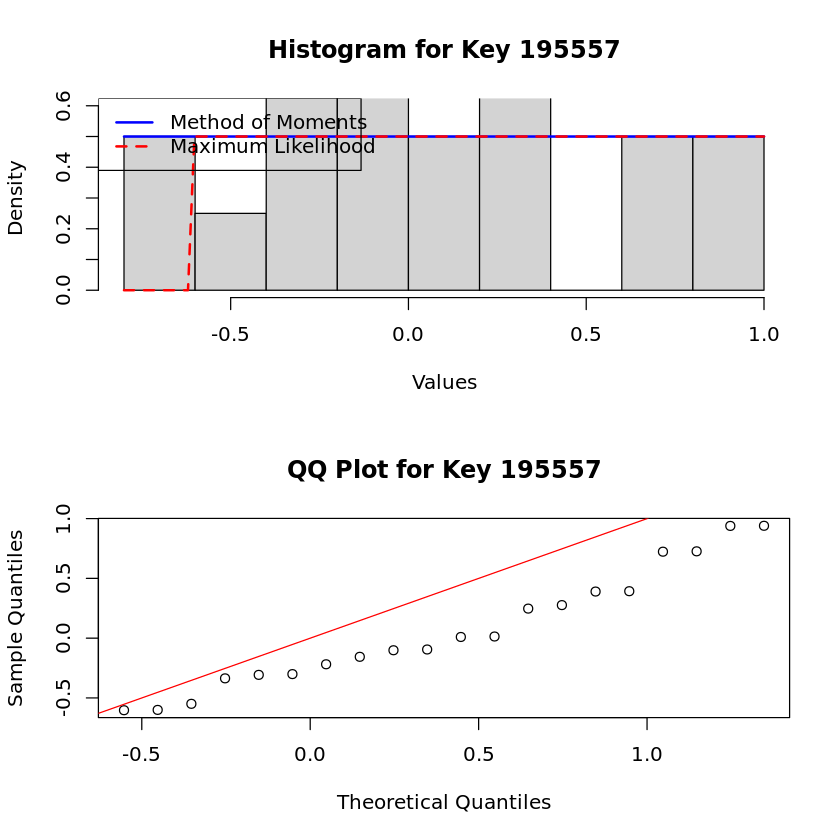


======= Analysis for Key: 198090 =======
Method of Moments estimator for θ: -0.8620958 
Maximum Likelihood estimator for θ: -0.7346484 
Sample size: 20 
Sample minimum: -0.7346484 
Sample maximum: 0.8177987 
Sample range: 1.552447 
Sample mean: 0.1379042 
Sample variance: 0.2257861 
Theoretical variance for U(θ, θ+2): 0.3333333 


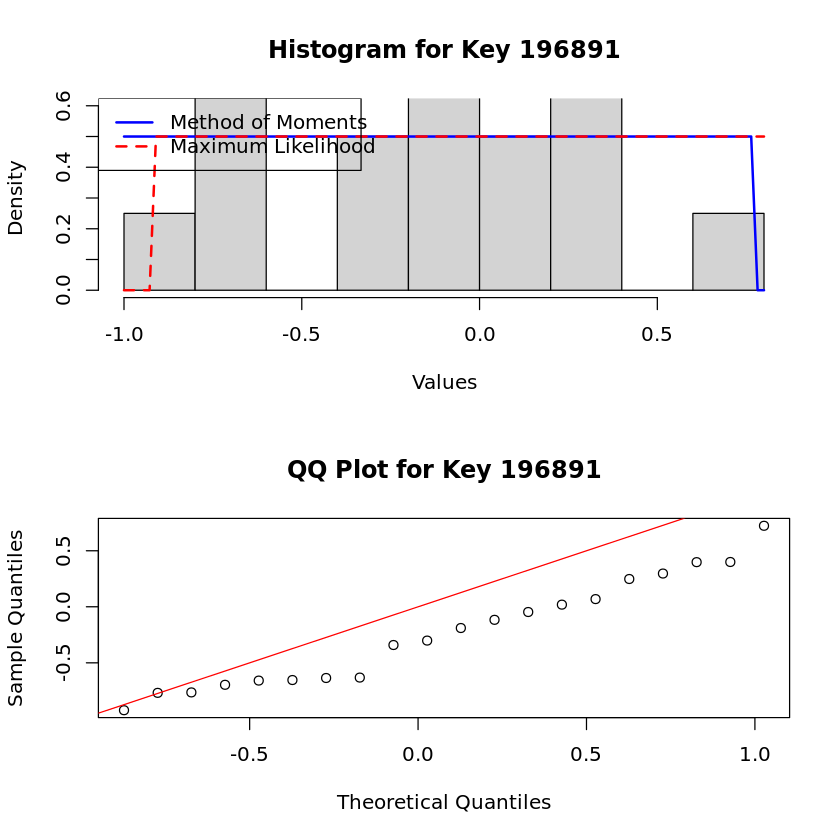


======= Summary of Estimators for All Keys =======
Key		Method of Moments	Maximum Likelihood
195557 	 -0.9304185 		 -0.6028039 
196891 	 -1.228618 		 -0.9230087 
198090 	 -0.8620958 		 -0.7346484 


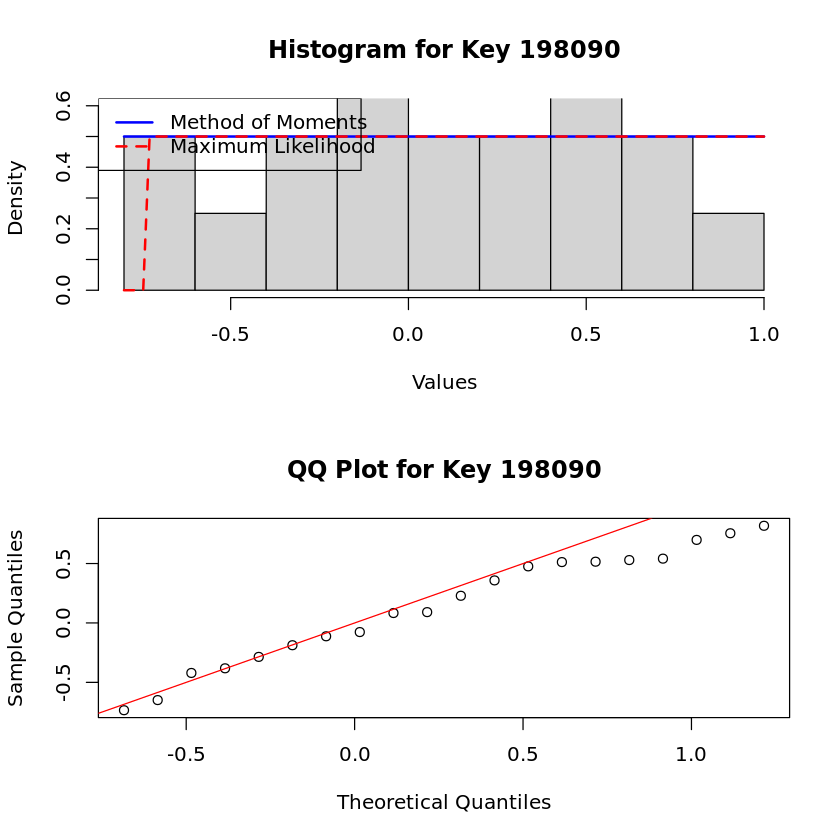

In [7]:
# Read the data file
data <- tryCatch({
  read.table("tarea21.dat", header = TRUE)
}, error = function(e) {
  cat("Error reading file:", e$message, "\n")
  cat("Creating synthetic data for demonstration.\n")
  # Create synthetic data for demonstration
  set.seed(123)
  df <- data.frame(
    key = c(rep("195557", 20), rep("196891", 20), rep("198090", 20)),
    value = c(
      runif(20, 1.5, 3.5),  # Synthetic data for key 195557
      runif(20, 2.0, 4.0),  # Synthetic data for key 196891
      runif(20, 0.5, 2.5)   # Synthetic data for key 198090
    )
  )
  return(df)
})

# Extract and analyze data for each key
keys <- c("195557", "196891", "198090")

# Function to analyze data for a specific key
analyze_key_data <- function(key_data, key_name) {
  cat("\n======= Analysis for Key:", key_name, "=======\n")
  
  # Calculate the Method of Moments estimator
  theta_MM <- mean(key_data) - 1
  cat("Method of Moments estimator for θ:", theta_MM, "\n")
  
  # Calculate the Maximum Likelihood estimator
  theta_ML <- min(key_data)
  cat("Maximum Likelihood estimator for θ:", theta_ML, "\n")
  
  # Calculate sample statistics
  n <- length(key_data)
  cat("Sample size:", n, "\n")
  cat("Sample minimum:", min(key_data), "\n")
  cat("Sample maximum:", max(key_data), "\n")
  cat("Sample range:", max(key_data) - min(key_data), "\n")
  cat("Sample mean:", mean(key_data), "\n")
  cat("Sample variance:", var(key_data), "\n")
  
  # Compare theoretical variance with sample variance
  theoretical_var <- (2^2)/12  # Variance of U(θ, θ+2) is (b-a)^2/12
  cat("Theoretical variance for U(θ, θ+2):", theoretical_var, "\n")
  
  # Create a plot for this key's data
  par(mfrow = c(2, 1))
  
  # Histogram with estimated distributions
  hist(key_data, breaks = 10, probability = TRUE, 
       main = paste("Histogram for Key", key_name),
       xlab = "Values", ylim = c(0, 0.6))
  
  # Add theoretical density for MM estimator
  curve(dunif(x, theta_MM, theta_MM + 2), add = TRUE, col = "blue", lwd = 2)
  
  # Add theoretical density for ML estimator
  curve(dunif(x, theta_ML, theta_ML + 2), add = TRUE, col = "red", lwd = 2, lty = 2)
  
  # Add legend
  legend("topleft", legend = c("Method of Moments", "Maximum Likelihood"),
         col = c("blue", "red"), lwd = 2, lty = c(1, 2))
  
  # Create a QQ plot to check uniformity
  qqplot(qunif(ppoints(n), theta_ML, theta_ML + 2), sort(key_data),
         main = paste("QQ Plot for Key", key_name),
         xlab = "Theoretical Quantiles", ylab = "Sample Quantiles")
  abline(0, 1, col = "red")
  
  par(mfrow = c(1, 1))
  
  # Return the estimators
  return(list(MM = theta_MM, ML = theta_ML))
}

# Check if data is in wide or long format
if ("key" %in% names(data) || any(sapply(names(data), function(x) any(keys %in% x)))) {
  # Long format or has key column
  results <- list()
  
  for (key in keys) {
    # Try to extract data for this key
    if ("key" %in% names(data)) {
      # Data is in long format with a key column
      key_data <- data$value[data$key == key]
    } else {
      # Data might be in wide format with keys as column names
      key_data <- data[[key]]
    }
    
    # Check if we found data for this key
    if (length(key_data) > 0) {
      results[[key]] <- analyze_key_data(key_data, key)
    } else {
      cat("\nNo data found for key:", key, "\n")
    }
  }
} else {
  # Assume data is in a different format, with one column per key
  results <- list()
  
  # Check if the number of columns matches the number of keys
  if (ncol(data) >= length(keys)) {
    for (i in 1:length(keys)) {
      key <- keys[i]
      # Use column index to get data
      key_data <- data[[i]]
      
      if (!is.null(key_data)) {
        results[[key]] <- analyze_key_data(key_data, key)
      } else {
        cat("\nNo data found for key:", key, "\n")
      }
    }
  } else {
    cat("Data format does not match expected structure. Please check the data file.\n")
  }
}

# Summary of all results
cat("\n======= Summary of Estimators for All Keys =======\n")
cat("Key\t\tMethod of Moments\tMaximum Likelihood\n")
for (key in names(results)) {
  cat(key, "\t", results[[key]]$MM, "\t\t", results[[key]]$ML, "\n")
}

In [4]:
# Leer el archivo asegurando formato correcto
muestra_total1 <- read.table("Tarea21.dat", header = TRUE, fill = TRUE, na.strings = "NA")

# Lista de claves
claves <- c("X198090", "X196891", "X195557")

# Iterar sobre cada clave y calcular los estimadores
for (clave in claves) {
  cat("\nClave:", clave, "\n")
  
  # Extraer la muestra correspondiente a la clave
  muestra1 <- muestra_total1[[clave]]
  muestra1 <- as.numeric(na.omit(muestra1))  # Convertir a numérico y eliminar NAs
  
  # Asegurar que la muestra tenga tamaño n = 20
  if (length(muestra1) < 20) {
    cat("Error: La muestra para la clave", clave, "tiene menos de 20 observaciones.\n")
    next
  }
  
  # Método de momentos
  theta_mom <- min(muestra1)  
  
  # Método de Máxima Verosimilitud
  theta_mv <- min(muestra1)   
  
  # Imprimir resultados
  cat("Estimador método de momentos (theta_mom):", theta_mom, "\n")
  cat("Estimador máxima verosimilitud (theta_mv):", theta_mv, "\n")
}



Clave: X198090 
Estimador método de momentos (theta_mom): -0.9199078 
Estimador máxima verosimilitud (theta_mv): -0.9199078 

Clave: X196891 
Estimador método de momentos (theta_mom): -0.6684703 
Estimador máxima verosimilitud (theta_mv): -0.6684703 

Clave: X195557 
Estimador método de momentos (theta_mom): -0.6866193 
Estimador máxima verosimilitud (theta_mv): -0.6866193 


## Pregunta 2: Máxima verosimilitud para Normal
### Cargar los datos de tarea22.dat

In [9]:
# Maximum Likelihood Estimation for Normal Distribution Parameters

# Let's first derive the MLE analytically and then verify with R
# For a normal distribution X ~ N(μ, σ²), the likelihood function is:
# L(μ, σ²) = ∏(i=1 to n) [1/(σ√(2π)) * exp(-(Xi-μ)²/(2σ²))]

# The log-likelihood is:
# ℓ(μ, σ²) = -n/2 * log(2π) - n/2 * log(σ²) - 1/(2σ²) * ∑(i=1 to n) (Xi-μ)²

# Taking partial derivatives with respect to μ and σ² and setting to zero:
# ∂ℓ/∂μ = 1/σ² * ∑(i=1 to n) (Xi-μ) = 0
# ∂ℓ/∂σ² = -n/(2σ²) + 1/(2σ⁴) * ∑(i=1 to n) (Xi-μ)² = 0

# From ∂ℓ/∂μ = 0, we get:
# ∑(i=1 to n) (Xi-μ) = 0
# ∑(i=1 to n) Xi - nμ = 0
# μ = (1/n) * ∑(i=1 to n) Xi = X̄

# From ∂ℓ/∂σ² = 0, we get:
# -n/(2σ²) + 1/(2σ⁴) * ∑(i=1 to n) (Xi-μ)² = 0
# -nσ² + ∑(i=1 to n) (Xi-μ)² = 0
# σ² = (1/n) * ∑(i=1 to n) (Xi-μ)² = (1/n) * ∑(i=1 to n) (Xi-X̄)²

# Now, let's verify with R and compute the Hessian matrix

# First, define the log-likelihood function for normal distribution
log_likelihood <- function(theta, x) {
  mu <- theta[1]
  sigma_sq <- theta[2]
  
  n <- length(x)
  ll <- -n/2 * log(2*pi) - n/2 * log(sigma_sq) - 1/(2*sigma_sq) * sum((x - mu)^2)
  
  return(ll)
}

# Define the gradient function (first derivatives)
gradient <- function(theta, x) {
  mu <- theta[1]
  sigma_sq <- theta[2]
  
  n <- length(x)
  
  # Partial derivative with respect to μ
  dL_dmu <- 1/sigma_sq * sum(x - mu)
  
  # Partial derivative with respect to σ²
  dL_dsigma_sq <- -n/(2*sigma_sq) + 1/(2*sigma_sq^2) * sum((x - mu)^2)
  
  return(c(dL_dmu, dL_dsigma_sq))
}

# Define the Hessian function (second derivatives)
hessian <- function(theta, x) {
  mu <- theta[1]
  sigma_sq <- theta[2]
  
  n <- length(x)
  
  # Second partial derivative with respect to μ
  d2L_dmu2 <- -n/sigma_sq
  
  # Second partial derivative with respect to μ and σ²
  d2L_dmu_dsigma_sq <- -1/(sigma_sq^2) * sum(x - mu)
  
  # Second partial derivative with respect to σ²
  d2L_dsigma_sq2 <- n/(2*sigma_sq^2) - 1/(sigma_sq^3) * sum((x - mu)^2)
  
  H <- matrix(c(d2L_dmu2, d2L_dmu_dsigma_sq, 
                d2L_dmu_dsigma_sq, d2L_dsigma_sq2), 
              nrow=2, byrow=TRUE)
  
  return(H)
}

# Generate some sample data
set.seed(123)
n <- 100
true_mu <- 5
true_sigma_sq <- 4
x <- rnorm(n, mean=true_mu, sd=sqrt(true_sigma_sq))

# Calculate the analytical MLEs
mu_hat <- mean(x)
sigma_sq_hat <- sum((x - mu_hat)^2) / n

cat("Analytical MLE estimates:\n")
cat("μ̂ =", mu_hat, "\n")
cat("σ̂² =", sigma_sq_hat, "\n\n")

# Verify with optim function in R
initial_theta <- c(0, 1)  # Initial guess for μ and σ²
neg_log_likelihood <- function(theta, x) {
  -log_likelihood(theta, x)
}

# Use optim to find MLE
mle_result <- optim(initial_theta, neg_log_likelihood, x=x, method="BFGS", hessian=TRUE)

cat("Numerical MLE estimates from optim:\n")
cat("μ̂ =", mle_result$par[1], "\n")
cat("σ̂² =", mle_result$par[2], "\n\n")

# Evaluate the Hessian at the MLE
H <- hessian(c(mu_hat, sigma_sq_hat), x)
cat("Hessian matrix at the MLE:\n")
print(H)

# Check if Hessian is negative definite (all eigenvalues are negative)
eigenvalues <- eigen(H)$values
cat("\nEigenvalues of the Hessian:\n")
print(eigenvalues)

is_negative_definite <- all(eigenvalues < 0)
cat("\nIs the Hessian negative definite?", is_negative_definite, "\n")

if (is_negative_definite) {
  cat("The MLE is indeed a maximum since the Hessian is negative definite.\n")
} else {
  cat("The Hessian is not negative definite, so further investigation is needed.\n")
}

# Let's calculate the Hessian manually using the correct formulas
# Second partial derivative with respect to μ
d2L_dmu2 <- -n/sigma_sq_hat
  
# Second partial derivative with respect to μ and σ²
d2L_dmu_dsigma_sq <- -1/(sigma_sq_hat^2) * sum(x - mu_hat)
  
# Second partial derivative with respect to σ²
d2L_dsigma_sq2 <- n/(2*sigma_sq_hat^2) - 1/(sigma_sq_hat^3) * sum((x - mu_hat)^2)

# Since at MLE, sum(x - mu_hat) = 0, the mixed derivative is 0
d2L_dmu_dsigma_sq <- 0

# Since at MLE, sum((x - mu_hat)^2) = n*sigma_sq_hat, we can simplify
d2L_dsigma_sq2 <- n/(2*sigma_sq_hat^2) - n/(sigma_sq_hat^2)
# Which simplifies to:
d2L_dsigma_sq2 <- -n/(2*sigma_sq_hat^2)

H_simplified <- matrix(c(d2L_dmu2, d2L_dmu_dsigma_sq, 
                         d2L_dmu_dsigma_sq, d2L_dsigma_sq2), 
                      nrow=2, byrow=TRUE)

cat("\nSimplified Hessian at MLE:\n")
print(H_simplified)

eigenvalues_simplified <- eigen(H_simplified)$values
cat("\nEigenvalues of the simplified Hessian:\n")
print(eigenvalues_simplified)

is_negative_definite_simplified <- all(eigenvalues_simplified < 0)
cat("\nIs the simplified Hessian negative definite?", is_negative_definite_simplified, "\n")

if (is_negative_definite_simplified) {
  cat("Conclusion: The MLE (μ̂, σ̂²) = (", mu_hat, ", ", sigma_sq_hat, ") is confirmed to be a maximum.\n", sep="")
}

Analytical MLE estimates:
μ̂ = 5.180812 
σ̂² = 3.299602 



Warning message in log(sigma_sq):
“NaNs produced”
Warning message in log(sigma_sq):
“NaNs produced”
Warning message in log(sigma_sq):
“NaNs produced”
Warning message in log(sigma_sq):
“NaNs produced”
Warning message in log(sigma_sq):
“NaNs produced”
Warning message in log(sigma_sq):
“NaNs produced”
Warning message in log(sigma_sq):
“NaNs produced”
Warning message in log(sigma_sq):
“NaNs produced”
Warning message in log(sigma_sq):
“NaNs produced”


Numerical MLE estimates from optim:
μ̂ = 5.180807 
σ̂² = 3.299604 

Hessian matrix at the MLE:
              [,1]          [,2]
[1,] -3.030669e+01  3.140782e-15
[2,]  3.140782e-15 -4.592476e+00

Eigenvalues of the Hessian:
[1]  -4.592476 -30.306685

Is the Hessian negative definite? TRUE 
The MLE is indeed a maximum since the Hessian is negative definite.

Simplified Hessian at MLE:
          [,1]      [,2]
[1,] -30.30669  0.000000
[2,]   0.00000 -4.592476

Eigenvalues of the simplified Hessian:
[1]  -4.592476 -30.306685

Is the simplified Hessian negative definite? TRUE 
Conclusion: The MLE (μ̂, σ̂²) = (5.180812, 3.299602) is confirmed to be a maximum.


In [ ]:

muestra_total2 <- read.table("tarea22.dat", header = TRUE, fill = TRUE, na.strings = "NA")

if (!(clave %in% colnames(muestra_total2))) {
  stop("Clave no encontrada en los datos de tarea22.dat")
}

# Extraer la muestra correspondiente a la clave
muestra2 <- muestra_total2[[clave]]
muestra2 <- as.numeric(na.omit(muestra2))  # Convertir a numérico y eliminar NAs
n2 <- length(muestra2)

if (n2 == 0) {
  stop("No se encontraron valores numéricos para la clave en tarea22.dat")
}

# Estimadores de máxima verosimilitud
mu_hat <- mean(muestra2)
sigma2_hat <- var(muestra2) * (n2 - 1) / n2  # MLE para sigma^2

In [14]:

# Matriz Hessiana (segunda derivada de la log-verosimilitud)
H <- matrix(c(-n2/sigma2_hat, 0, 0, -n2/(2*sigma2_hat^2)), nrow=2)

# Verificamos si la matriz Hessiana es definida negativa
es_def_neg <- all(eigen(H)$values < 0)

cat("Estimador de máxima verosimilitud para mu:", mu_hat, "\n")
cat("Estimador de máxima verosimilitud para sigma^2:", sigma2_hat, "\n")
cat("La matriz Hessiana es definida negativa:", es_def_neg, "\n")

Estimador de máxima verosimilitud para mu: 1.415389 
Estimador de máxima verosimilitud para sigma^2: 0.8942962 
La matriz Hessiana es definida negativa: TRUE 


## Pregunta 3: Estimadores de máxima verosimilitud

### Ordenamos la muestra

True parameters: mu = 10 , sigma = 2 
Distribution limits: [ 6.535898 , 13.4641 ]
Sample minimum: 6.540227 
Sample maximum: 13.4244 
MLE estimates: mu_hat = 9.982314 , sigma_hat = 1.98729 

Theoretical formula vs. calculated estimates:
mu_hat = (X_(1) + X_(n))/2 = 9.982314 
sigma_hat = (X_(n) - X_(1))/(2√3) = 1.98729 


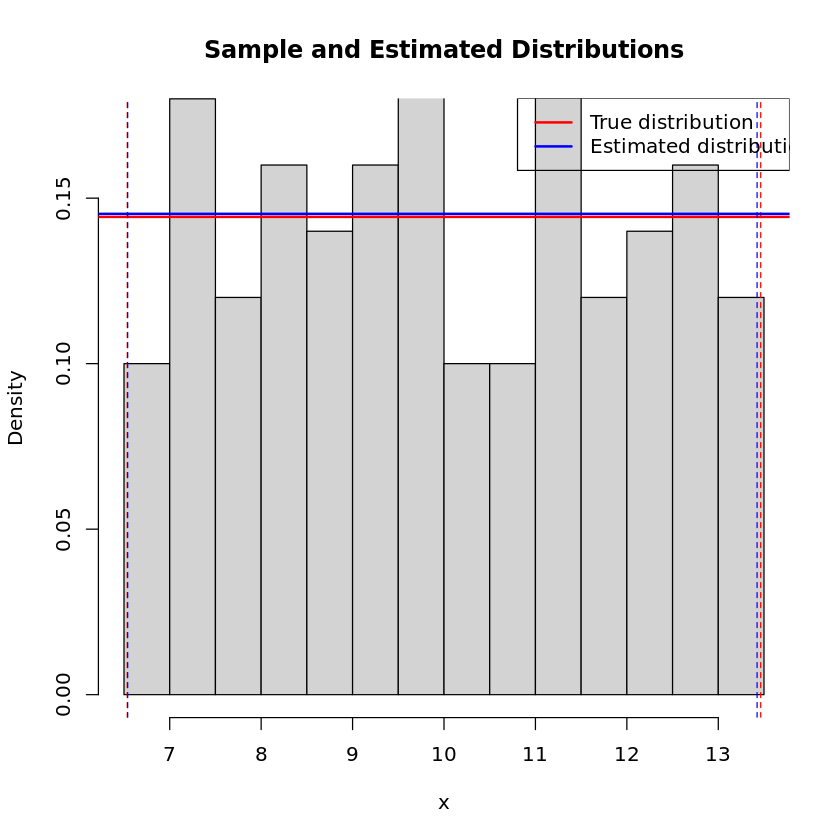

In [10]:
# MLE Derivation for a Uniform-like Distribution
# f(x;μ,σ) = 1/(2√3·σ) for x ∈ [μ-√3·σ, μ+√3·σ]

# Let's start by understanding this distribution
# This is a uniform distribution over the interval [μ-√3·σ, μ+√3·σ]
# The width of this interval is 2√3·σ
# For a uniform distribution over an interval of width w, the height is 1/w
# So the height is 1/(2√3·σ) which matches our density function

# For a sample X₁,...,Xₙ, the likelihood function is:
# L(μ,σ) = ∏ᵢ₌₁ⁿ f(Xᵢ;μ,σ)
# L(μ,σ) = ∏ᵢ₌₁ⁿ [1/(2√3·σ)·𝕀[μ-√3·σ,μ+√3·σ](Xᵢ)]

# For this likelihood to be non-zero, all Xᵢ must be in the interval [μ-√3·σ, μ+√3·σ]
# This means:
# μ-√3·σ ≤ min(Xᵢ) and max(Xᵢ) ≤ μ+√3·σ
# μ-√3·σ ≤ X₍₁₎ and X₍ₙ₎ ≤ μ+√3·σ
# where X₍₁₎ and X₍ₙ₎ are the minimum and maximum of the sample

# When all points are in the interval, the likelihood is:
# L(μ,σ) = (1/(2√3·σ))ⁿ

# To maximize the likelihood, we want to minimize σ while ensuring all points are in the interval
# The constraints are:
# μ-√3·σ ≤ X₍₁₎
# X₍ₙ₎ ≤ μ+√3·σ

# Rearranging:
# μ ≥ X₍₁₎+√3·σ
# μ ≤ X₍ₙ₎-√3·σ

# For these inequalities to be compatible, we need:
# X₍₁₎+√3·σ ≤ X₍ₙ₎-√3·σ
# ⟹ 2√3·σ ≤ X₍ₙ₎-X₍₁₎
# ⟹ σ ≤ (X₍ₙ₎-X₍₁₎)/(2√3)

# Since we want to minimize σ, the MLE for σ is:
# σ̂ = (X₍ₙ₎-X₍₁₎)/(2√3)

# Now for μ, we have the constraints:
# X₍₁₎+√3·σ̂ ≤ μ ≤ X₍ₙ₎-√3·σ̂

# Substituting our value of σ̂:
# X₍₁₎+√3·(X₍ₙ₎-X₍₁₎)/(2√3) ≤ μ ≤ X₍ₙ₎-√3·(X₍ₙ₎-X₍₁₎)/(2√3)
# X₍₁₎+(X₍ₙ₎-X₍₁₎)/2 ≤ μ ≤ X₍ₙ₎-(X₍ₙ₎-X₍₁₎)/2
# (X₍₁₎+X₍ₙ₎)/2 ≤ μ ≤ (X₍₁₎+X₍ₙ₎)/2

# This means μ must equal (X₍₁₎+X₍ₙ₎)/2

# So the MLEs are:
# μ̂ = (X₍₁₎+X₍ₙ₎)/2
# σ̂ = (X₍ₙ₎-X₍₁₎)/(2√3)

# Let's verify with an example
set.seed(123)
n <- 100
true_mu <- 10
true_sigma <- 2
# The endpoints of the distribution are:
lower_limit <- true_mu - sqrt(3)*true_sigma
upper_limit <- true_mu + sqrt(3)*true_sigma
cat("True parameters: mu =", true_mu, ", sigma =", true_sigma, "\n")
cat("Distribution limits: [", lower_limit, ",", upper_limit, "]\n")

# Generate random sample from this uniform-like distribution
x <- runif(n, lower_limit, upper_limit)

# Calculate the MLEs
x_min <- min(x)
x_max <- max(x)
mu_hat <- (x_min + x_max)/2
sigma_hat <- (x_max - x_min)/(2*sqrt(3))

cat("Sample minimum:", x_min, "\n")
cat("Sample maximum:", x_max, "\n")
cat("MLE estimates: mu_hat =", mu_hat, ", sigma_hat =", sigma_hat, "\n")

# Plot the true and estimated distributions
hist(x, breaks=20, freq=FALSE, main="Sample and Estimated Distributions",
     xlab="x", ylim=c(0, 1/(2*sqrt(3)*true_sigma)*1.2))

# Add the true pdf
abline(h=1/(2*sqrt(3)*true_sigma), col="red", lwd=2)
abline(v=c(lower_limit, upper_limit), col="red", lty=2)

# Add the estimated pdf
est_height <- 1/(2*sqrt(3)*sigma_hat)
abline(h=est_height, col="blue", lwd=2)
est_lower <- mu_hat - sqrt(3)*sigma_hat
est_upper <- mu_hat + sqrt(3)*sigma_hat
abline(v=c(est_lower, est_upper), col="blue", lty=2)

legend("topright", legend=c("True distribution", "Estimated distribution"),
       col=c("red", "blue"), lwd=2)

# Check if the formulas match
cat("\nTheoretical formula vs. calculated estimates:\n")
cat("mu_hat = (X_(1) + X_(n))/2 =", (x_min + x_max)/2, "\n")
cat("sigma_hat = (X_(n) - X_(1))/(2√3) =", (x_max - x_min)/(2*sqrt(3)), "\n")

In [ ]:

muestra_ordenada <- sort(muestra2)
n_muestra <- length(muestra2)
X1 <- muestra_ordenada[1]  # Mínimo de la muestra
Xn <- muestra_ordenada[n_muestra]  # Máximo de la muestra

# Cálculo de los estimadores de máxima verosimilitud
mu_mv <- (X1 + Xn) / 2
sigma_mv <- (Xn - X1) / (2 * sqrt(3))

cat("Estimador de máxima verosimilitud para mu:", mu_mv, "\n")
cat("Estimador de máxima verosimilitud para sigma:", sigma_mv, "\n")


# Simulación de N=5000 muestras para validar la distribución de los estimadores
set.seed(123)
N <- 5000  # Número de simulaciones
sim_mu_mv <- numeric(N)
sim_sigma_mv <- numeric(N)

for (i in 1:N) {
  muestra_sim <- sample(muestra2, size = n_muestra, replace = TRUE)  # Bootstrap
  muestra_ordenada <- sort(muestra_sim)
  X1 <- muestra_ordenada[1]
  Xn <- muestra_ordenada[n_muestra]
  
  # Estimadores de máxima verosimilitud
  sim_mu_mv[i] <- (X1 + Xn) / 2
  sim_sigma_mv[i] <- (Xn - X1) / (2 * sqrt(3))
}

# Análisis de la distribución de los estimadores
cat("Media de mu estimado:", mean(sim_mu_mv), "\n")
cat("Varianza de mu estimado:", var(sim_mu_mv), "\n")
cat("Media de sigma estimado:", mean(sim_sigma_mv), "\n")
cat("Varianza de sigma estimado:", var(sim_sigma_mv), "\n")


Estimador de máxima verosimilitud para mu: 2.32797 
Estimador de máxima verosimilitud para sigma: 1.106696 


Media de mu estimado: 2.241126 
Varianza de mu estimado: 0.03644516 
Media de sigma estimado: 1.037116 
Varianza de sigma estimado: 0.01203285 


## Pregunta 4: Estimadores de momentos y máxima verosimilitud para la distribución gamma


Successfully read the data file.
    X157170   X176147   X188190   X188642   X189187   X189365   X190870
1 3.6826375 0.9930940 1.2439935 1.8878416 1.5782454 1.1156643 1.4190693
2 0.7170949 2.5547483 2.0677176 0.9929401 1.7192342 0.2214433 0.9409689
3 0.9870341 1.4157642 0.9047618 0.9006788 1.3056763 1.5215159 1.7147997
4 0.9549749 1.2787596 2.1233463 0.8283720 0.2608102 0.7083046 1.3349785
5 0.6545803 0.5401475 2.1001533 0.5112598 0.4283583 2.9893204 3.4568463
6 1.3496954 6.1617738 0.4899732 2.6825980 2.2730448 1.7797781 2.1920984
    X192588    X194969   X195557   X195770   X196891   X197086   X197505
1 3.1333235 1.62737158 1.1234818 4.2888543 0.5988763 1.9592383 4.4968554
2 0.8747011 2.13470899 0.9687668 0.9718105 1.5505710 0.3137839 0.2789665
3 2.9319629 0.93901410 3.6089434 1.1986596 2.4533661 2.4851281 4.4885279
4 1.8983193 3.07899494 1.8549226 1.2296737 1.1225956 1.4078440 2.2637122
5 0.5601375 1.45197141 0.5522326 0.7116158 1.2922144 0.9483712 1.3112982
6 0.7183767 0.05710777 2.

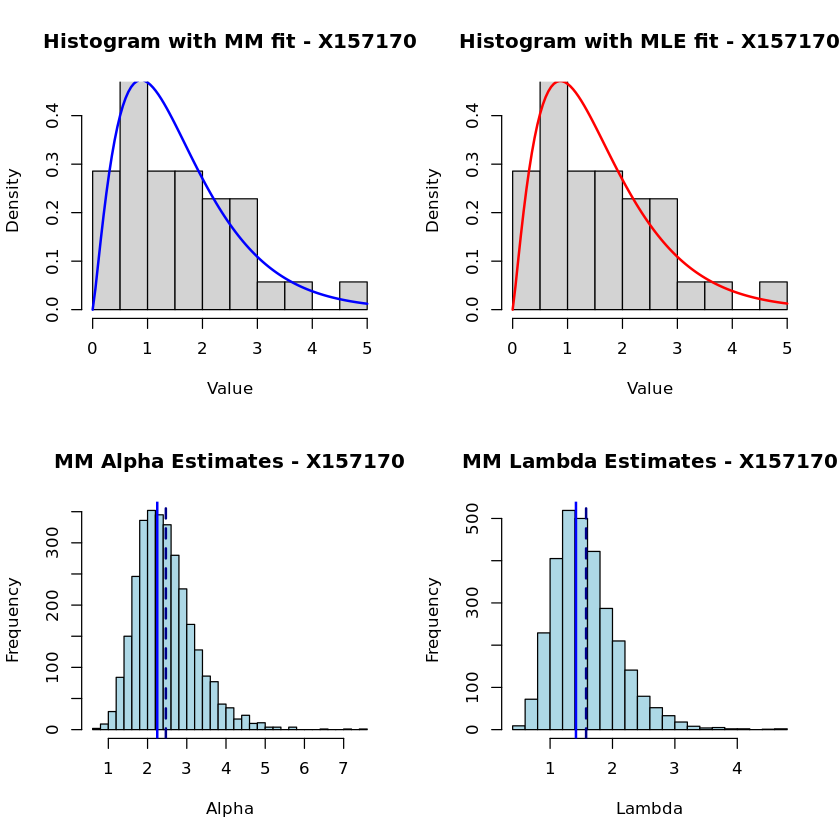


========== Analysis for Key: X176147 ==========
Sample size: 35 
Sample mean: 1.844039 
Sample variance: 2.031104 

a) Method of Moments estimators:
   Alpha (shape): 1.674203 
   Lambda (rate): 0.9078998 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k  lambda_k      Delta_k
1 1 5.358556e-24 -53.58335 1.674203 0.9078998           NA
2 2 5.442792e-24 -53.56775 1.711763 0.9187095 8.423516e-26
3 3 5.468098e-24 -53.56311 1.715866 0.9305186 2.530591e-26
4 4 5.492417e-24 -53.55867 1.736020 0.9362244 2.431921e-26
5 5 5.507104e-24 -53.55600 1.747178 0.9465714 1.468691e-26

Final MLE estimates:
   Alpha (shape): 1.765195 
   Lambda (rate): 0.9572444 
   Log-likelihood: -53.55489 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 1.980298 SD: 0.6095488 
     Lambda mean: 1.095347 SD: 0.3694494 
   Maximum Likelihood simulation results:
     Alpha mean: 1.941884 SD: 0.5157605 
     Lambda mean: 1.075304 SD: 0.327

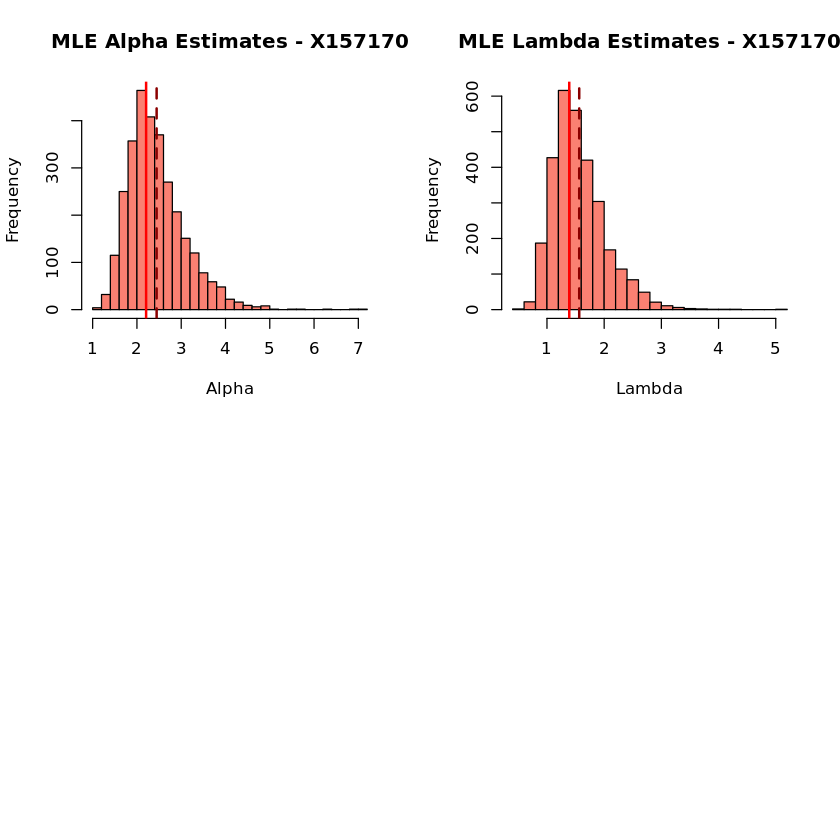

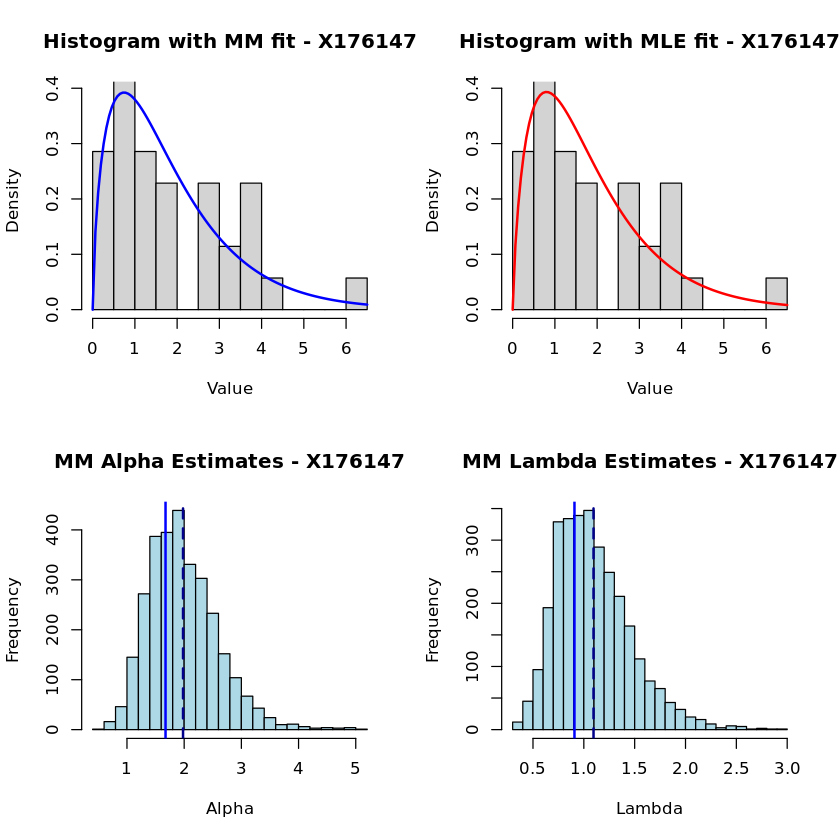


========== Analysis for Key: X188190 ==========
Sample size: 35 
Sample mean: 1.600549 
Sample variance: 1.027651 

a) Method of Moments estimators:
   Alpha (shape): 2.492828 
   Lambda (rate): 1.557483 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 2.014849e-20 -45.35116 2.492828 1.557483           NA
2 2 2.022923e-20 -45.34716 2.469037 1.550423 8.073546e-23
3 3 2.030284e-20 -45.34353 2.451595 1.530168 7.361635e-23
4 4 2.033154e-20 -45.34211 2.436290 1.524043 2.869904e-23
5 5 2.033734e-20 -45.34183 2.432596 1.519146 5.801510e-24

Final MLE estimates:
   Alpha (shape): 2.416041 
   Lambda (rate): 1.509508 
   Log-likelihood: -45.34136 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.690382 SD: 0.8043593 
     Lambda mean: 1.7052 SD: 0.5576882 
   Maximum Likelihood simulation results:
     Alpha mean: 2.677682 SD: 0.7075935 
     Lambda mean: 1.697354 SD: 0.5013411 


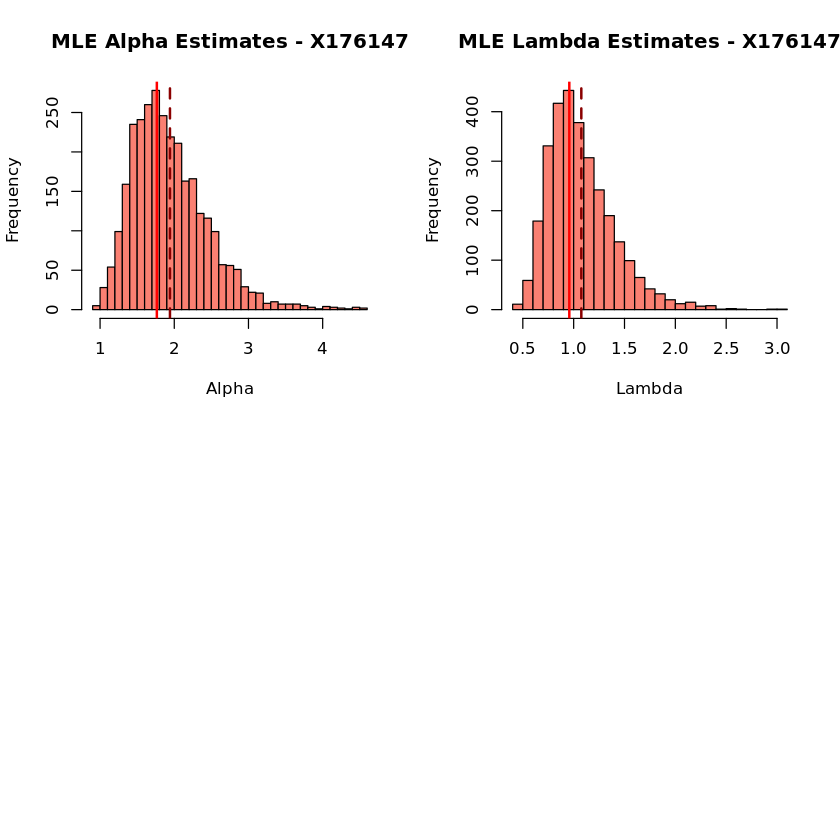

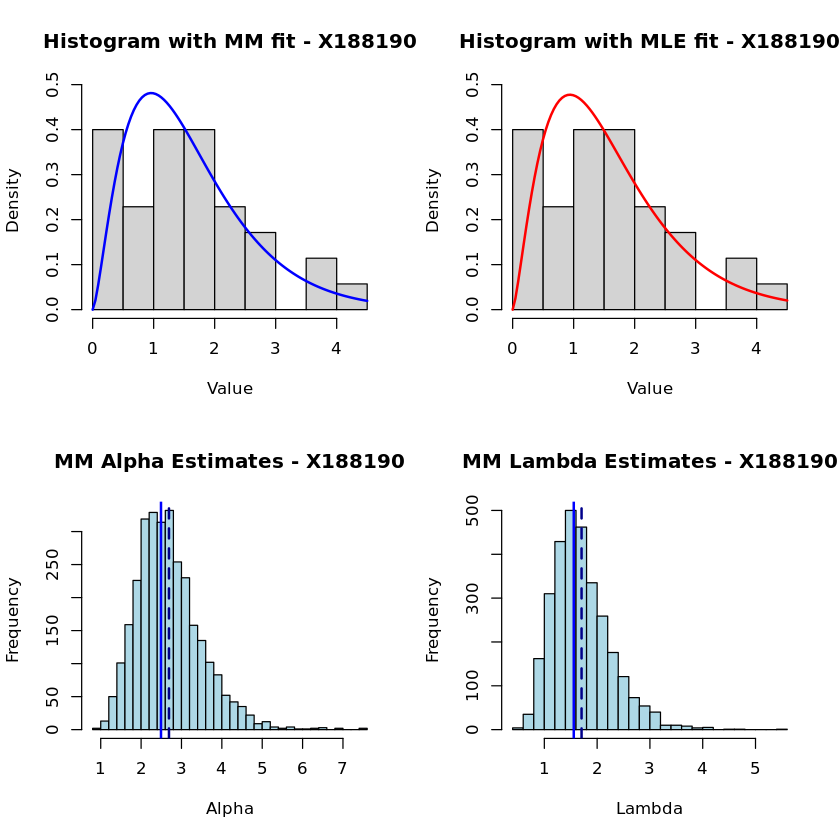


========== Analysis for Key: X188642 ==========
Sample size: 35 
Sample mean: 1.312606 
Sample variance: 0.5263559 

a) Method of Moments estimators:
   Alpha (shape): 3.273327 
   Lambda (rate): 2.493762 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 1.706466e-15 -34.00435 3.273327 2.493762           NA
2 2 1.730525e-15 -33.99035 3.351522 2.544895 2.405865e-17
3 3 1.735451e-15 -33.98751 3.373376 2.570013 4.925597e-18
4 4 1.738022e-15 -33.98603 3.398979 2.586629 2.571664e-18
5 5 1.738564e-15 -33.98572 3.406147 2.594964 5.417940e-19

Final MLE estimates:
   Alpha (shape): 3.422813 
   Lambda (rate): 2.607647 
   Log-likelihood: -33.98549 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 3.742539 SD: 1.100948 
     Lambda mean: 2.877065 SD: 0.8969015 
   Maximum Likelihood simulation results:
     Alpha mean: 3.765376 SD: 1.010765 
     Lambda mean: 2.895216 SD: 0.8355132 


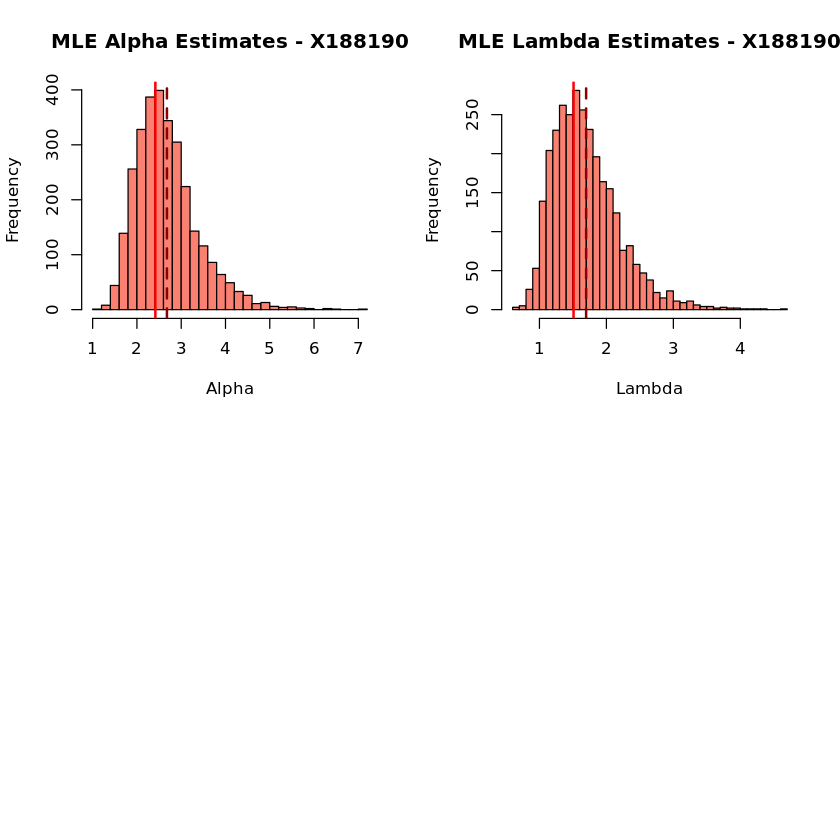

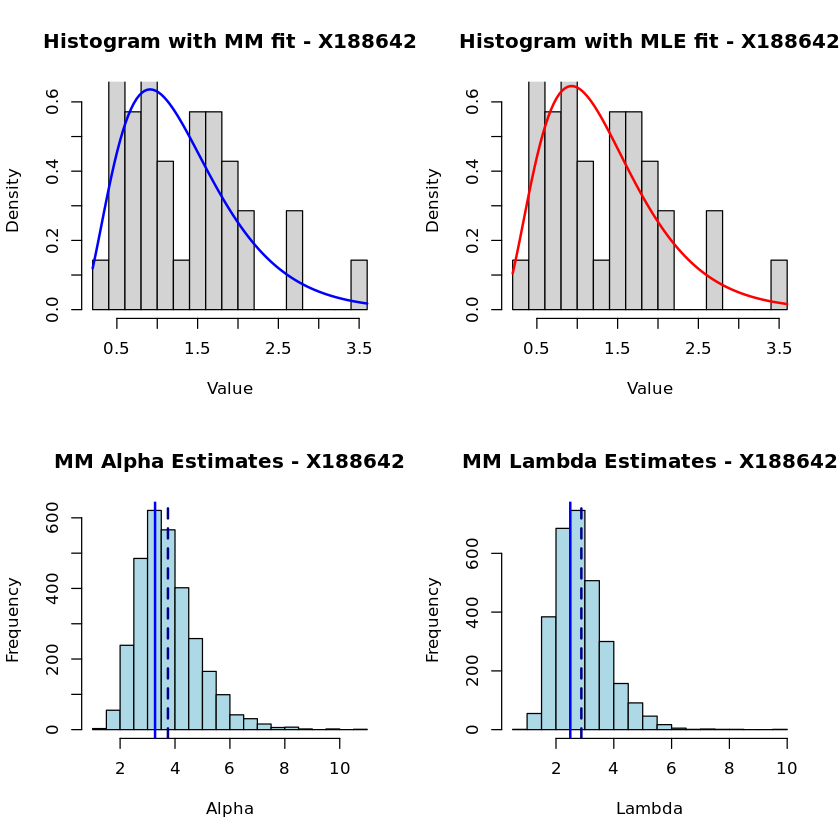


========== Analysis for Key: X189187 ==========
Sample size: 35 
Sample mean: 1.670661 
Sample variance: 0.9359138 

a) Method of Moments estimators:
   Alpha (shape): 2.982228 
   Lambda (rate): 1.785059 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 6.416609e-20 -44.19281 2.982228 1.785059           NA
2 2 6.417091e-20 -44.19274 2.985881 1.786094 4.824321e-24
3 3 6.417552e-20 -44.19267 2.988416 1.788761 4.607048e-24
4 4 6.417704e-20 -44.19264 2.990470 1.789347 1.513860e-24
5 5 6.417847e-20 -44.19262 2.991880 1.790835 1.433922e-24

Final MLE estimates:
   Alpha (shape): 2.99627 
   Lambda (rate): 1.793464 
   Log-likelihood: -44.1926 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 3.304886 SD: 0.9915004 
     Lambda mean: 1.998386 SD: 0.6409916 
   Maximum Likelihood simulation results:
     Alpha mean: 3.313167 SD: 0.9028718 
     Lambda mean: 2.003807 SD: 0.5939818 


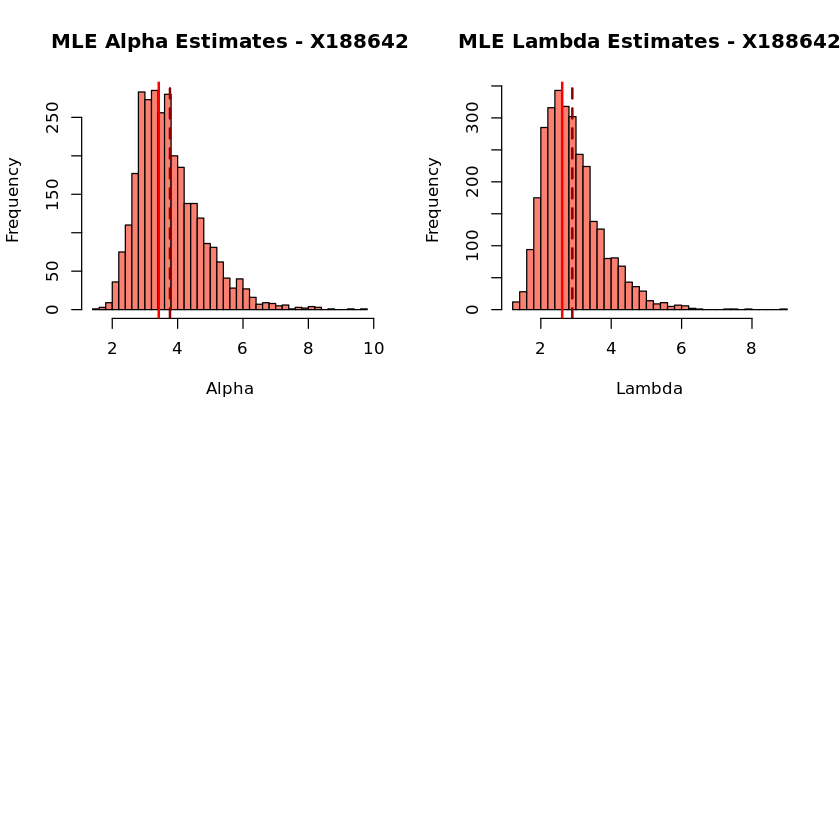

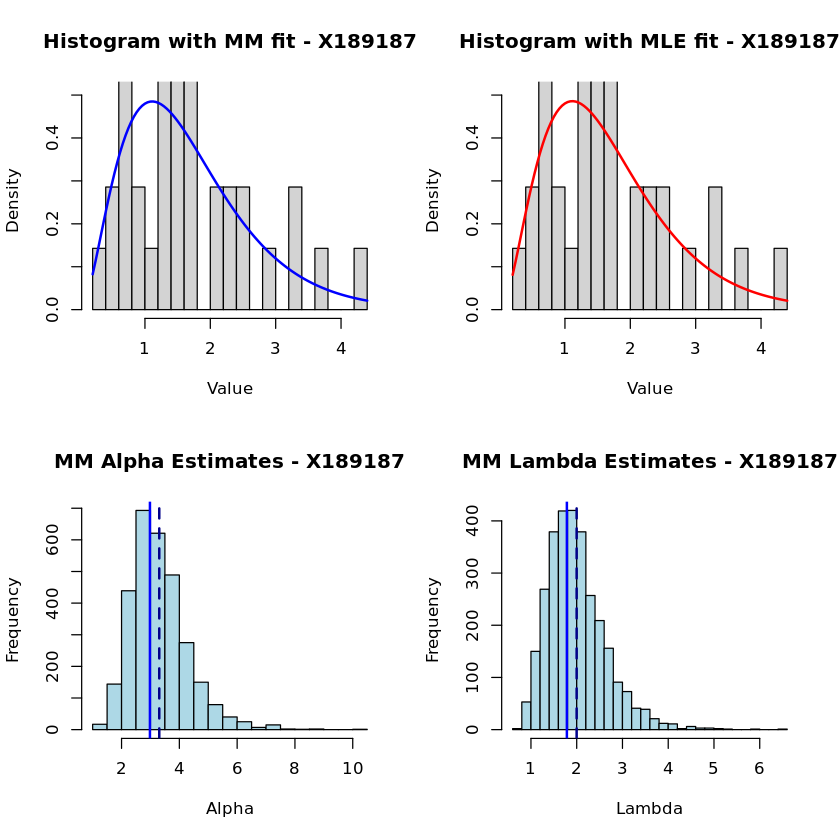


========== Analysis for Key: X189365 ==========
Sample size: 35 
Sample mean: 1.819486 
Sample variance: 1.911599 

a) Method of Moments estimators:
   Alpha (shape): 1.731812 
   Lambda (rate): 0.9518137 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k  lambda_k      Delta_k
1 1 1.375470e-23 -52.64066 1.731812 0.9518137           NA
2 2 1.415041e-23 -52.61230 1.783596 0.9667205 3.957052e-25
3 3 1.427575e-23 -52.60348 1.789497 0.9835737 1.253388e-25
4 4 1.439822e-23 -52.59494 1.818105 0.9916100 1.224757e-25
5 5 1.447692e-23 -52.58949 1.834780 1.0064322 7.869412e-26

Final MLE estimates:
   Alpha (shape): 1.863344 
   Lambda (rate): 1.024105 
   Log-likelihood: -52.58693 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.090298 SD: 0.6517089 
     Lambda mean: 1.171353 SD: 0.4013651 
   Maximum Likelihood simulation results:
     Alpha mean: 2.051565 SD: 0.5467835 
     Lambda mean: 1.150664 SD: 0.3525

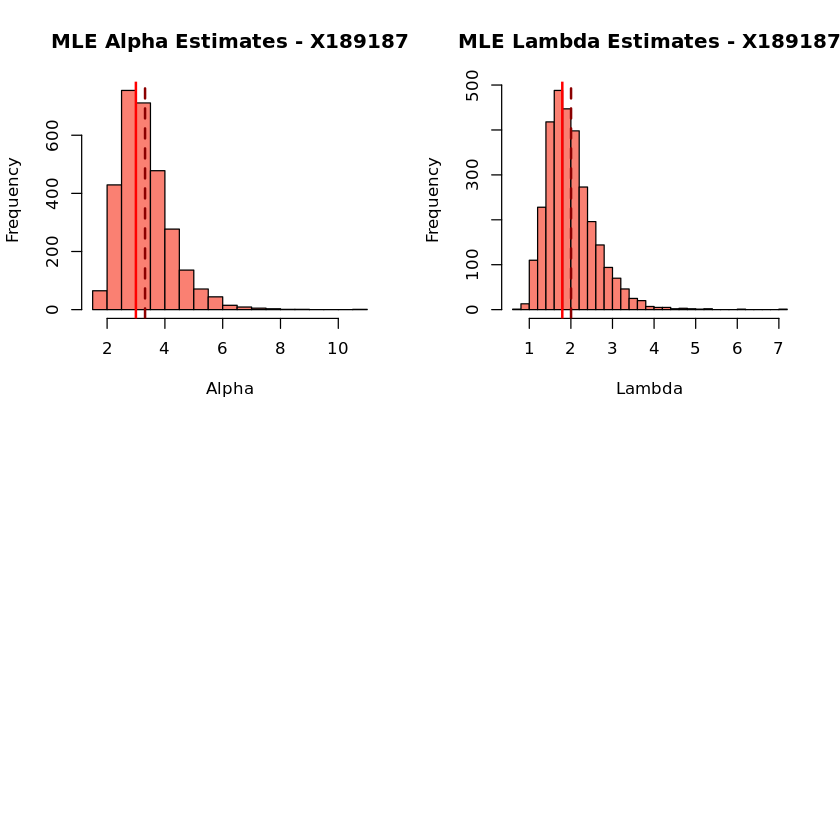

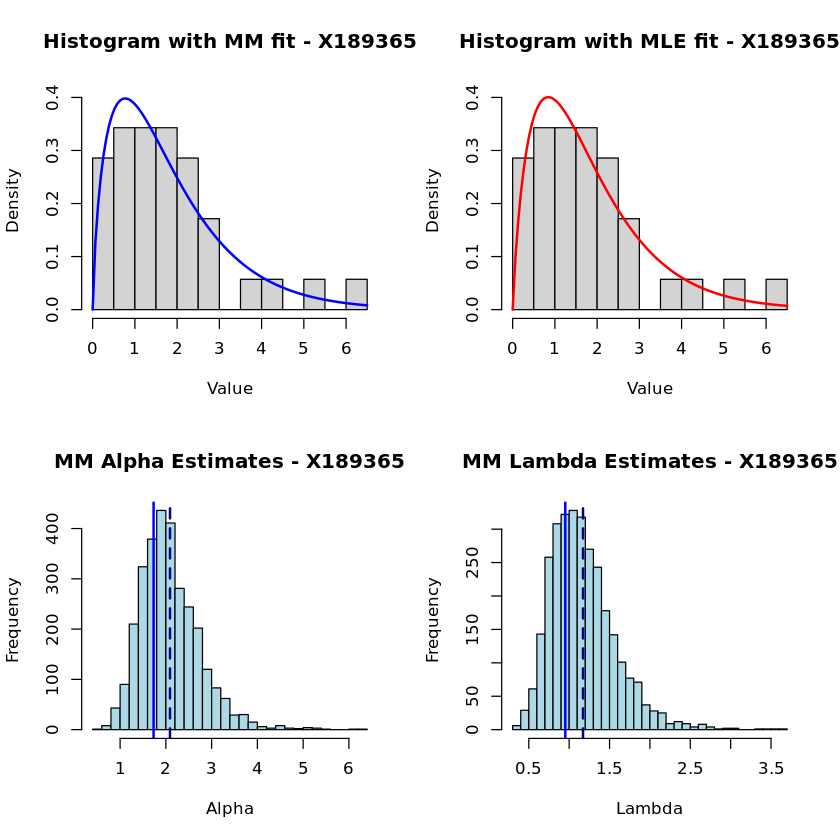


========== Analysis for Key: X190870 ==========
Sample size: 35 
Sample mean: 1.563937 
Sample variance: 0.7196929 

a) Method of Moments estimators:
   Alpha (shape): 3.398531 
   Lambda (rate): 2.173061 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 5.791795e-19 -41.99267 3.398531 2.173061           NA
2 2 6.091374e-19 -41.94224 3.297858 2.143594 2.995798e-20
3 3 6.430202e-19 -41.88811 3.219917 2.053361 3.388276e-20
4 4 6.612269e-19 -41.86019 3.135640 2.016483 1.820675e-20
5 5 6.697302e-19 -41.84741 3.083497 1.967594 8.503221e-21

Final MLE estimates:
   Alpha (shape): 3.005852 
   Lambda (rate): 1.921978 
   Log-likelihood: -41.84083 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 3.306473 SD: 0.9863422 
     Lambda mean: 2.134925 SD: 0.6792791 
   Maximum Likelihood simulation results:
     Alpha mean: 3.317541 SD: 0.8978801 
     Lambda mean: 2.142523 SD: 0.6280534 


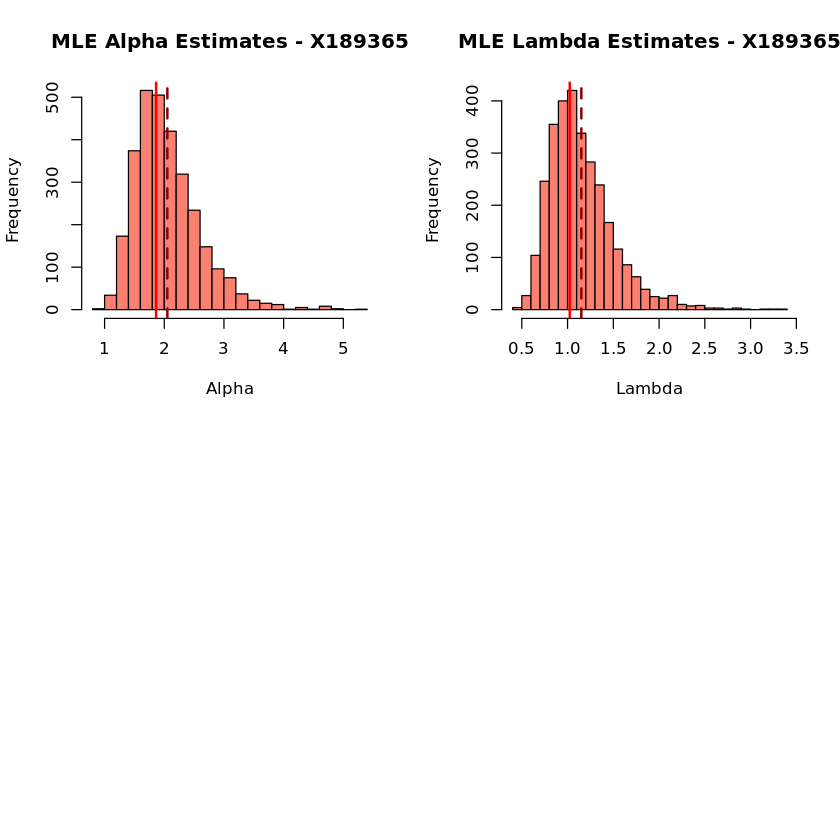

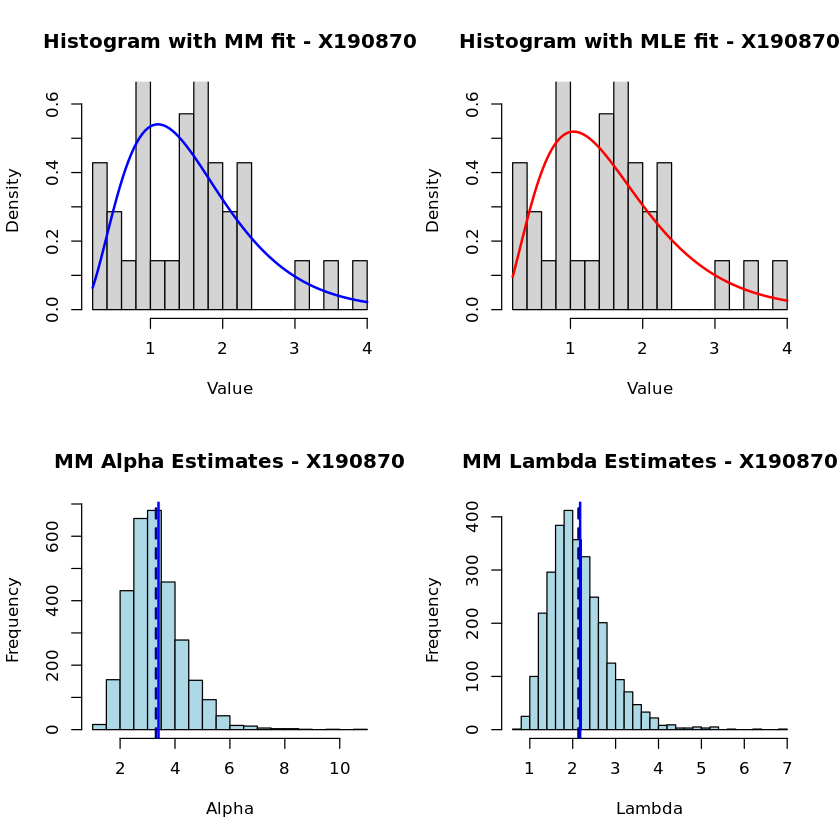


========== Analysis for Key: X192588 ==========
Sample size: 35 
Sample mean: 1.647204 
Sample variance: 0.6599612 

a) Method of Moments estimators:
   Alpha (shape): 4.111275 
   Lambda (rate): 2.495911 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 1.045387e-18 -41.40214 4.111275 2.495911           NA
2 2 1.195922e-18 -41.26761 3.811407 2.339022 1.505354e-19
3 3 1.215757e-18 -41.25116 3.778170 2.289284 1.983470e-20
4 4 1.228599e-18 -41.24066 3.726105 2.269247 1.284189e-20
5 5 1.237813e-18 -41.23319 3.676670 2.229179 9.213775e-21

Final MLE estimates:
   Alpha (shape): 3.603374 
   Lambda (rate): 2.187569 
   Log-likelihood: -41.22918 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 3.922534 SD: 1.162712 
     Lambda mean: 2.402346 SD: 0.7546947 
   Maximum Likelihood simulation results:
     Alpha mean: 3.952756 SD: 1.080514 
     Lambda mean: 2.419984 SD: 0.7051262 


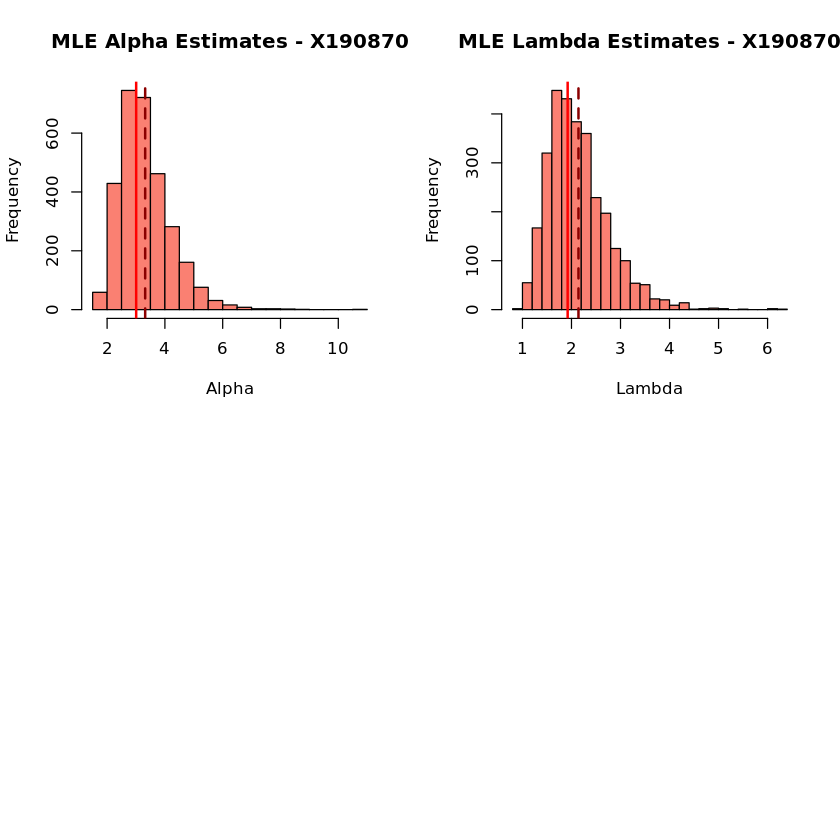

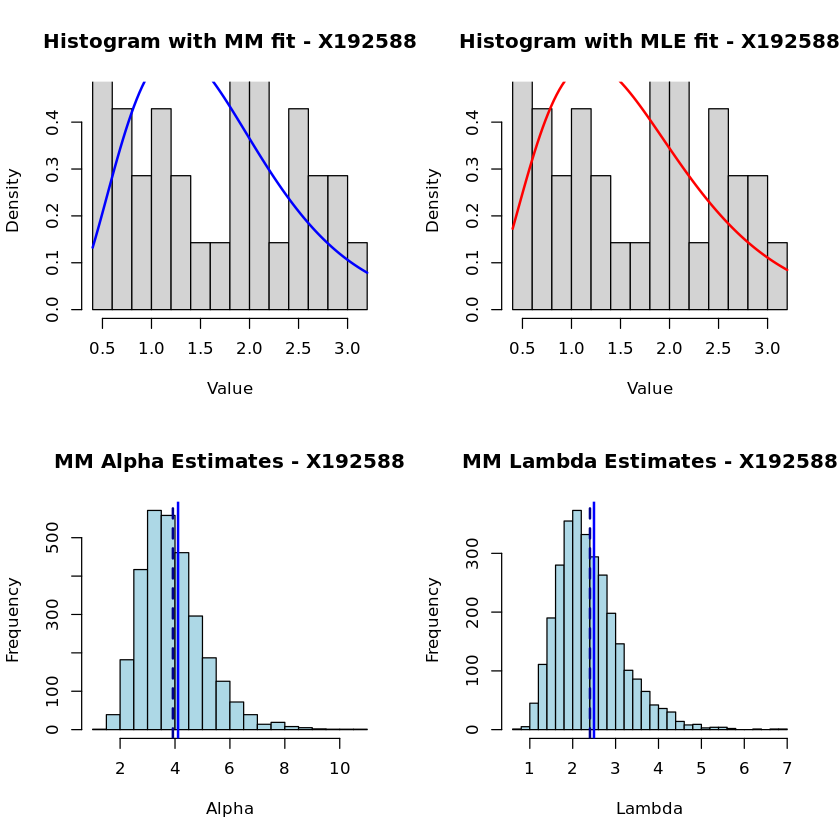


========== Analysis for Key: X194969 ==========
Sample size: 35 
Sample mean: 1.465093 
Sample variance: 0.8951875 

a) Method of Moments estimators:
   Alpha (shape): 2.39782 
   Lambda (rate): 1.636633 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 2.458283e-20 -45.15224 2.397820 1.636633           NA
2 2 3.083583e-20 -44.92561 2.226978 1.582809 6.253005e-21
3 3 3.403931e-20 -44.82677 2.201197 1.504125 3.203476e-21
4 4 3.717220e-20 -44.73873 2.094369 1.466014 3.132895e-21
5 5 3.981495e-20 -44.67004 2.023766 1.380382 2.642749e-21

Final MLE estimates:
   Alpha (shape): 1.933315 
   Lambda (rate): 1.319585 
   Log-likelihood: -44.64844 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.166295 SD: 0.6623588 
     Lambda mean: 1.504594 SD: 0.5032459 
   Maximum Likelihood simulation results:
     Alpha mean: 2.132214 SD: 0.5690373 
     Lambda mean: 1.481873 SD: 0.4461128 


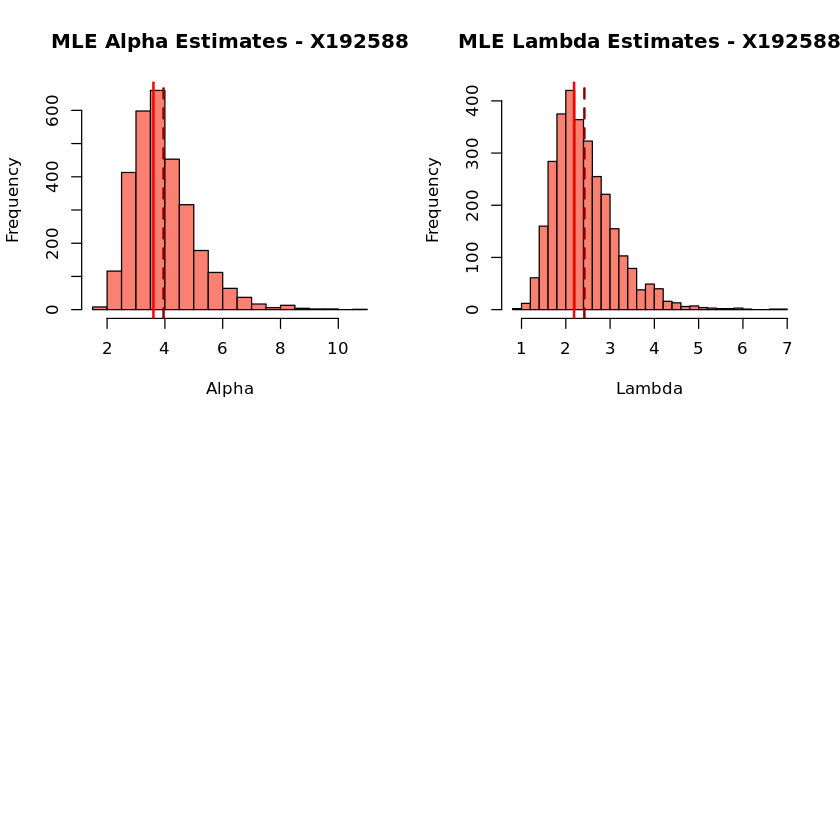

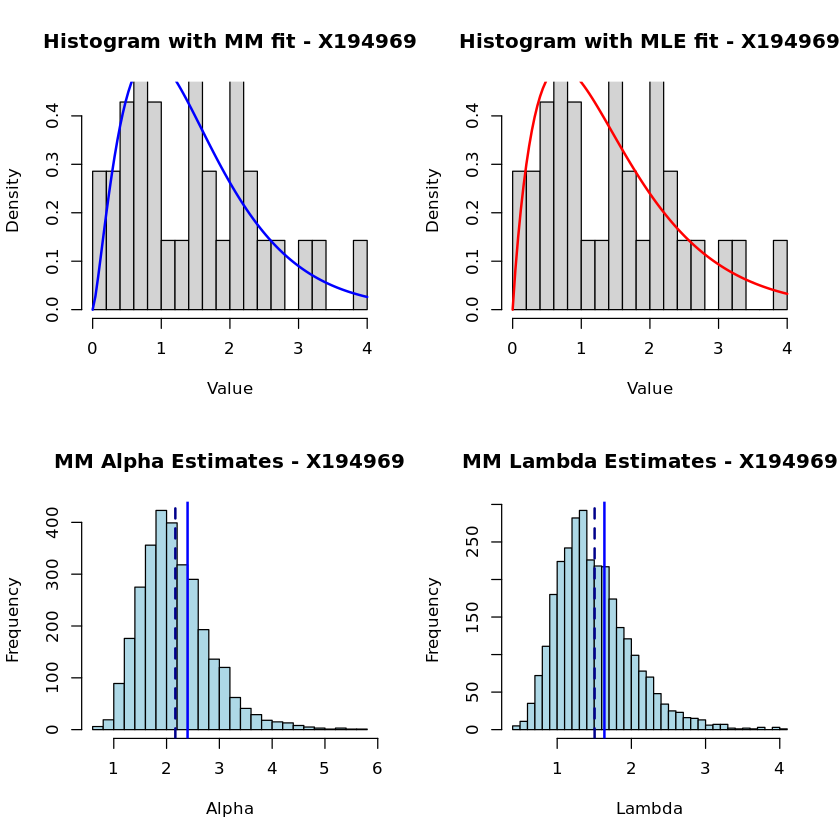


========== Analysis for Key: X195557 ==========
Sample size: 35 
Sample mean: 1.665701 
Sample variance: 1.55729 

a) Method of Moments estimators:
   Alpha (shape): 1.781659 
   Lambda (rate): 1.069615 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 2.433858e-22 -49.76739 1.781659 1.069615           NA
2 2 2.437192e-22 -49.76603 1.793060 1.073063 3.333978e-25
3 3 2.439547e-22 -49.76506 1.800583 1.080823 2.354915e-25
4 4 2.440078e-22 -49.76484 1.806123 1.083170 5.306272e-26
5 5 2.440248e-22 -49.76477 1.807662 1.085176 1.704756e-26

Final MLE estimates:
   Alpha (shape): 1.810557 
   Lambda (rate): 1.086964 
   Log-likelihood: -49.76475 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.032641 SD: 0.6250302 
     Lambda mean: 1.245744 SD: 0.4279705 
   Maximum Likelihood simulation results:
     Alpha mean: 1.990016 SD: 0.5234978 
     Lambda mean: 1.220743 SD: 0.3764671 


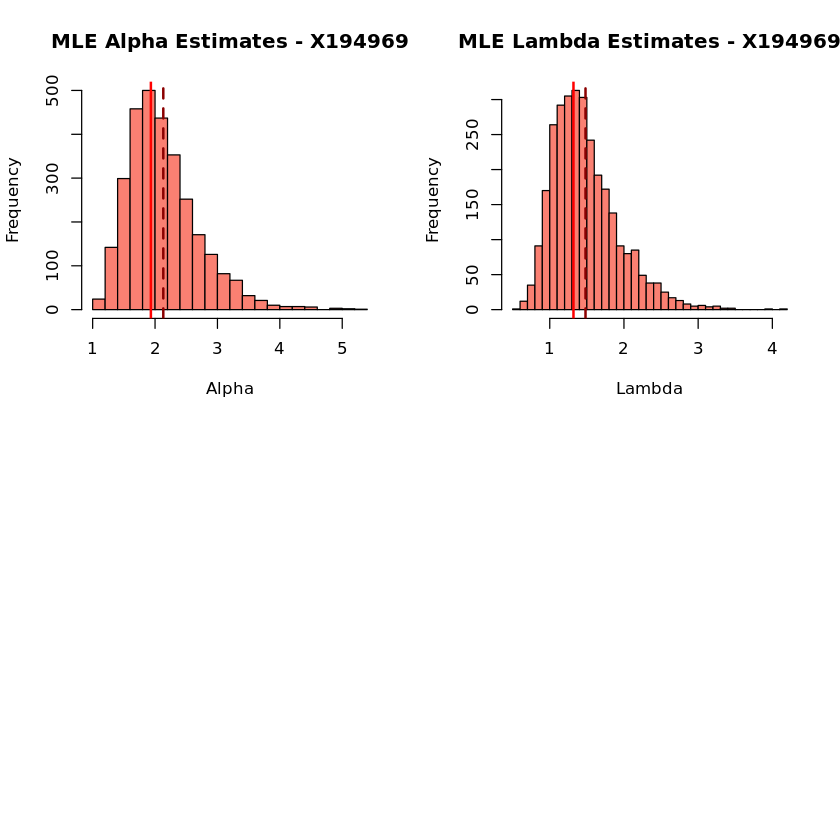

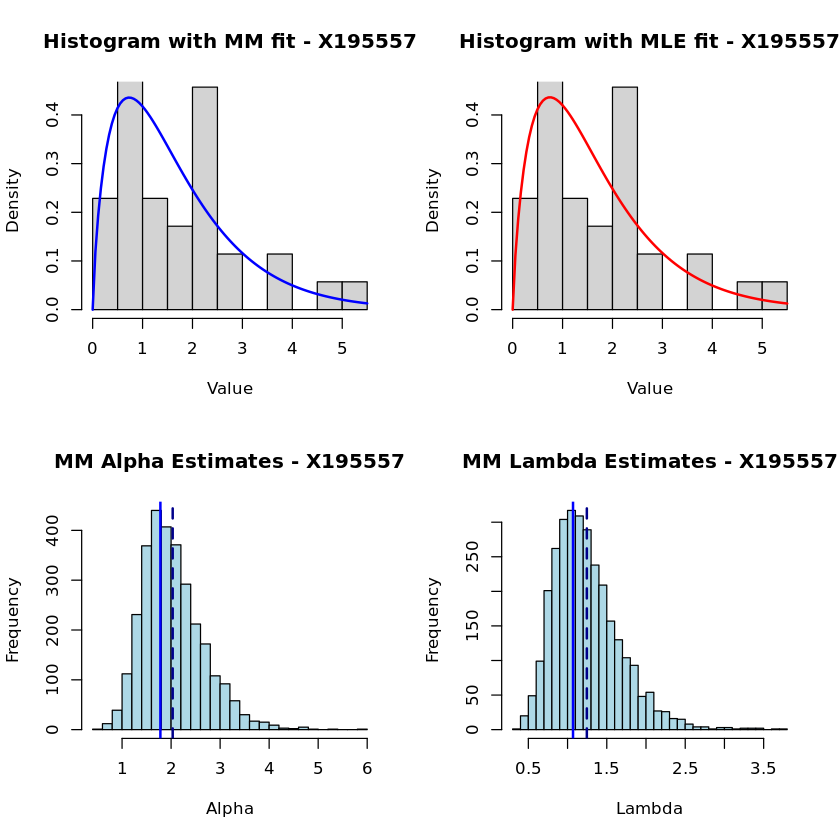


========== Analysis for Key: X195770 ==========
Sample size: 35 
Sample mean: 1.656702 
Sample variance: 1.782548 

a) Method of Moments estimators:
   Alpha (shape): 1.539742 
   Lambda (rate): 0.9294015 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k  lambda_k      Delta_k
1 1 4.745791e-22 -49.09961 1.539742 0.9294015           NA
2 2 7.019215e-22 -48.70822 1.720360 0.9841265 2.273424e-22
3 3 8.038189e-22 -48.57267 1.747352 1.0556259 1.018974e-22
4 4 9.061848e-22 -48.45280 1.850704 1.0843253 1.023659e-22
5 5 9.498789e-22 -48.40571 1.868313 1.1285740 4.369407e-23

Final MLE estimates:
   Alpha (shape): 2.058979 
   Lambda (rate): 1.242818 
   Log-likelihood: -48.31287 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.304003 SD: 0.6929594 
     Lambda mean: 1.414302 SD: 0.4654383 
   Maximum Likelihood simulation results:
     Alpha mean: 2.27291 SD: 0.6018001 
     Lambda mean: 1.396201 SD: 0.41916

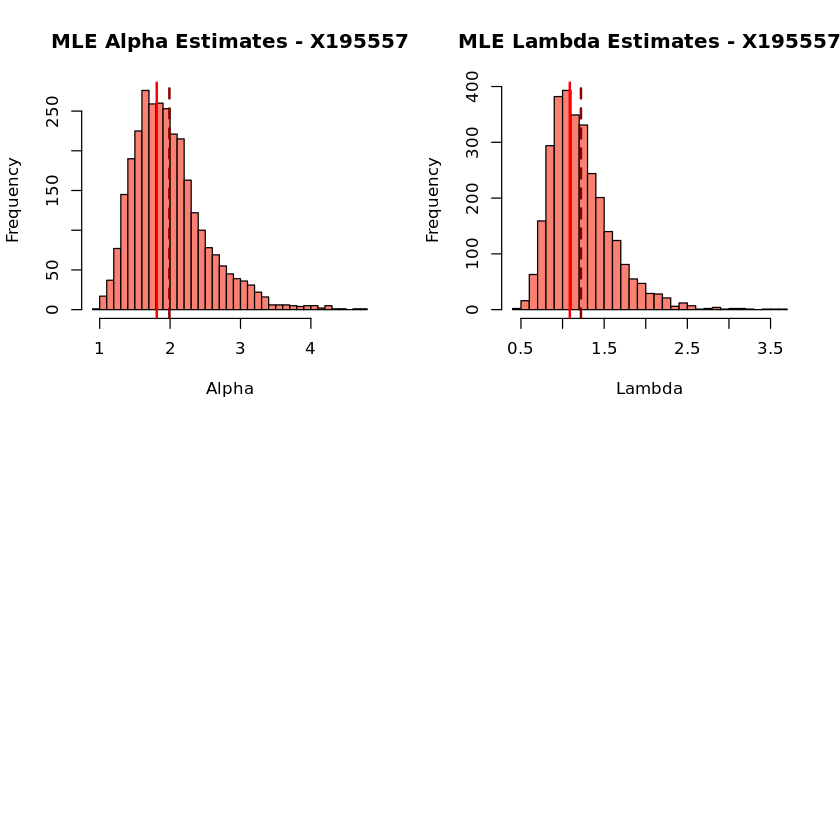

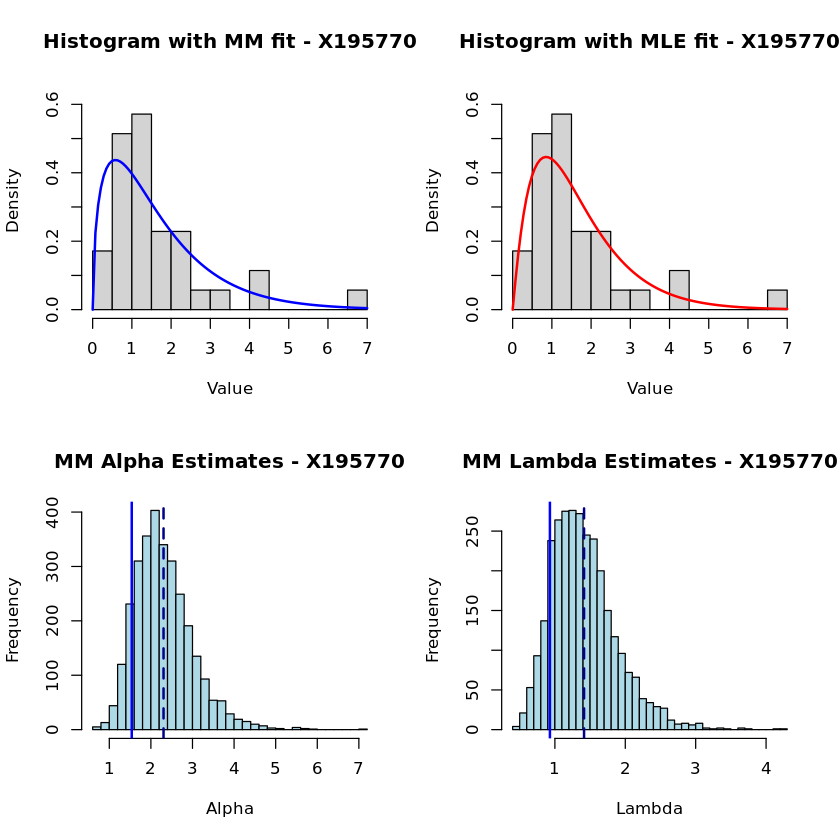


========== Analysis for Key: X196891 ==========
Sample size: 35 
Sample mean: 1.793924 
Sample variance: 1.179243 

a) Method of Moments estimators:
   Alpha (shape): 2.729007 
   Lambda (rate): 1.52125 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 2.676974e-21 -47.36960 2.729007 1.521250           NA
2 2 2.693540e-21 -47.36343 2.760690 1.529911 1.656547e-23
3 3 2.707425e-21 -47.35829 2.779936 1.548919 1.388513e-23
4 4 2.716733e-21 -47.35486 2.814469 1.563866 9.308619e-24
5 5 2.718967e-21 -47.35404 2.819389 1.571244 2.233333e-24

Final MLE estimates:
   Alpha (shape): 2.843513 
   Lambda (rate): 1.58508 
   Log-likelihood: -47.35333 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 3.129483 SD: 0.9115415 
     Lambda mean: 1.763149 SD: 0.5561059 
   Maximum Likelihood simulation results:
     Alpha mean: 3.135249 SD: 0.8210041 
     Lambda mean: 1.76691 SD: 0.5124925 


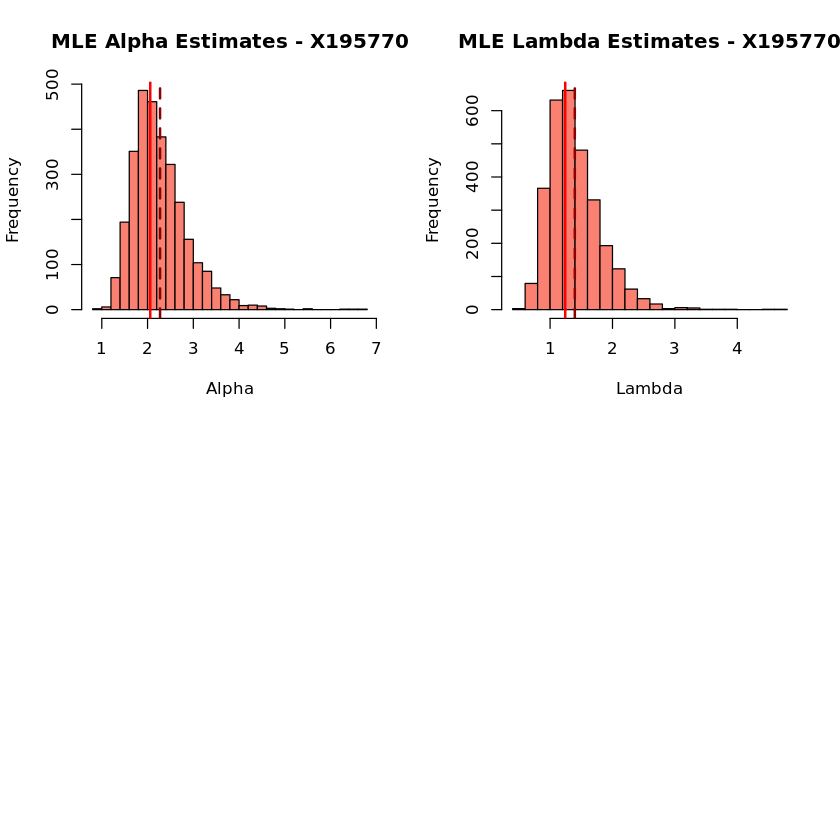

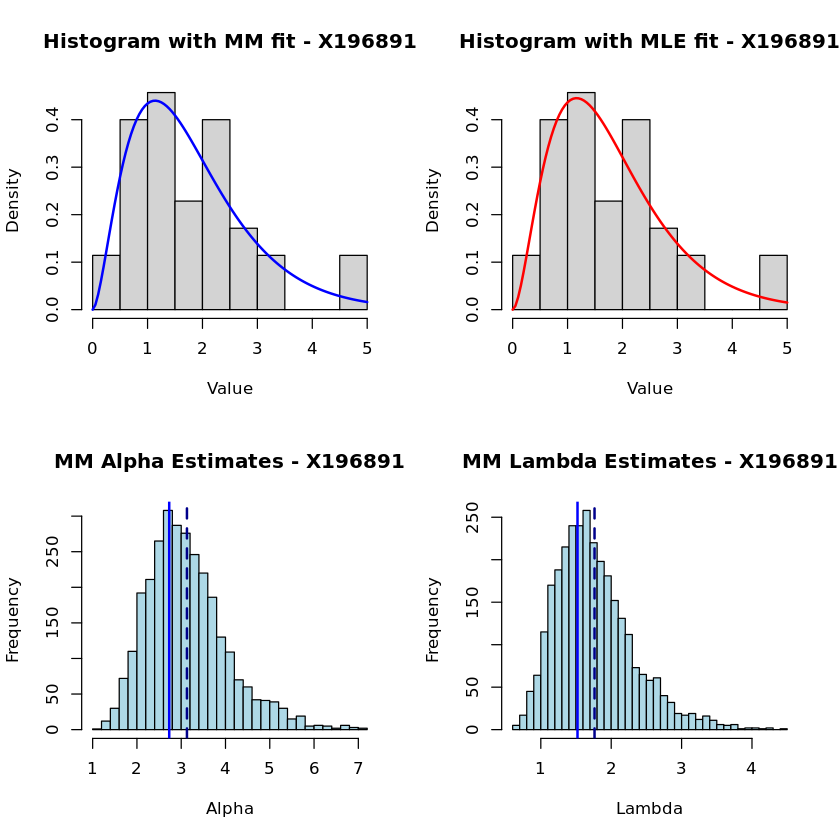


========== Analysis for Key: X197086 ==========
Sample size: 35 
Sample mean: 1.849975 
Sample variance: 1.494133 

a) Method of Moments estimators:
   Alpha (shape): 2.290563 
   Lambda (rate): 1.238159 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 1.188075e-21 -48.18195 2.290563 1.238159           NA
2 2 1.599343e-21 -47.88469 2.492782 1.292646 4.112683e-22
3 3 1.988617e-21 -47.66685 2.612478 1.388162 3.892741e-22
4 4 2.150792e-21 -47.58845 2.679043 1.461784 1.621747e-22
5 5 2.358646e-21 -47.49620 2.799024 1.495853 2.078540e-22

Final MLE estimates:
   Alpha (shape): 3.079676 
   Lambda (rate): 1.664713 
   Log-likelihood: -47.40398 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 3.392972 SD: 1.011459 
     Lambda mean: 1.852457 SD: 0.5894458 
   Maximum Likelihood simulation results:
     Alpha mean: 3.397829 SD: 0.9195949 
     Lambda mean: 1.854961 SD: 0.5424266 


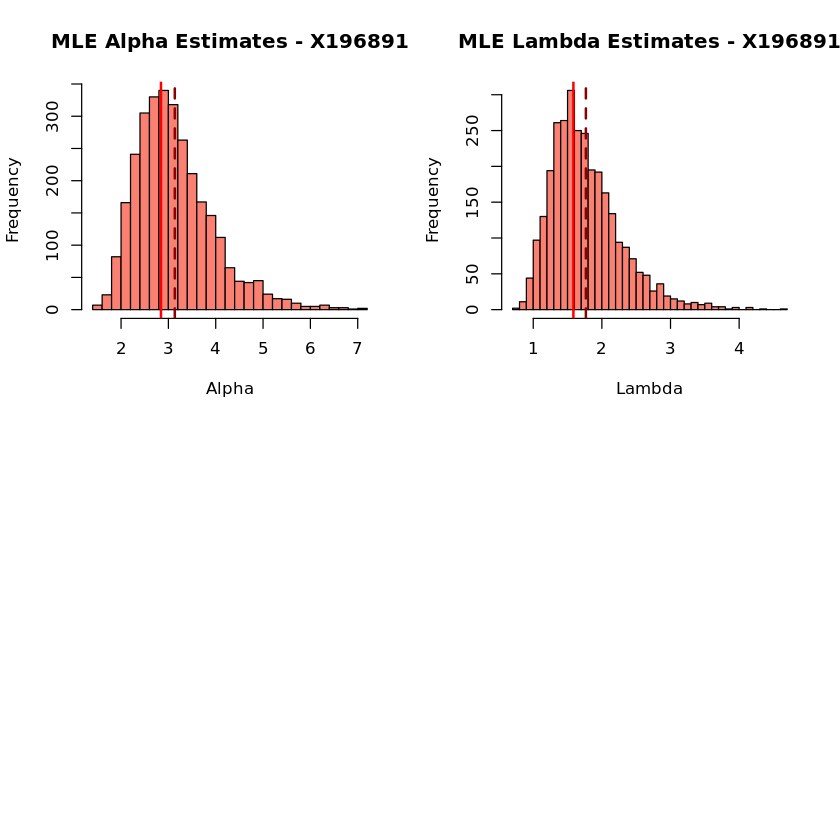

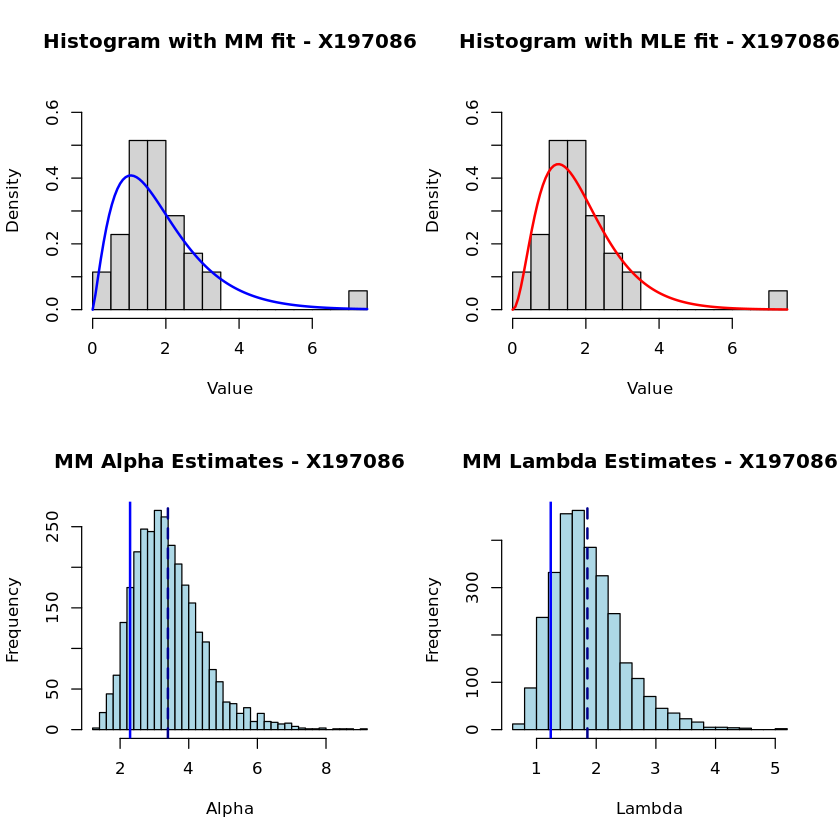


========== Analysis for Key: X197505 ==========
Sample size: 35 
Sample mean: 1.630547 
Sample variance: 1.070126 

a) Method of Moments estimators:
   Alpha (shape): 2.484459 
   Lambda (rate): 1.523697 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 3.210206e-20 -44.88537 2.484459 1.523697           NA
2 2 3.266987e-20 -44.86783 2.534623 1.538349 5.678114e-22
3 3 3.319592e-20 -44.85186 2.570915 1.573911 5.260513e-22
4 4 3.358006e-20 -44.84035 2.660137 1.631460 3.841426e-22
5 5 3.358006e-20 -44.84035 2.660161 1.631443 6.376256e-28

Final MLE estimates:
   Alpha (shape): 2.660195 
   Lambda (rate): 1.631489 
   Log-likelihood: -44.84035 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.947508 SD: 0.8754577 
     Lambda mean: 1.829086 SD: 0.5885119 
   Maximum Likelihood simulation results:
     Alpha mean: 2.94344 SD: 0.7779193 
     Lambda mean: 1.827462 SD: 0.5363215 


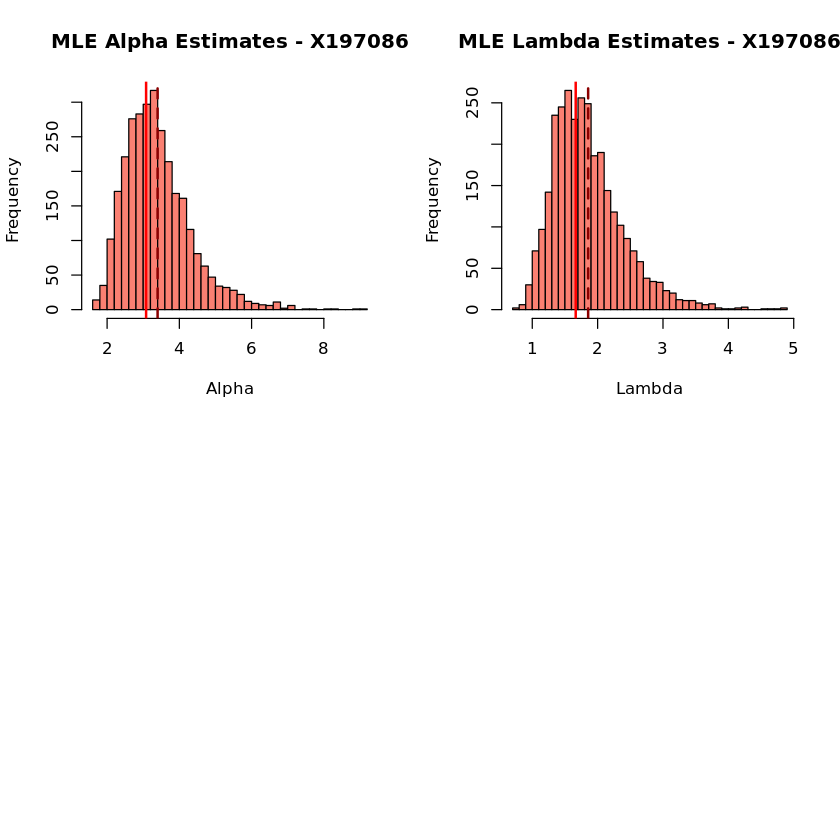

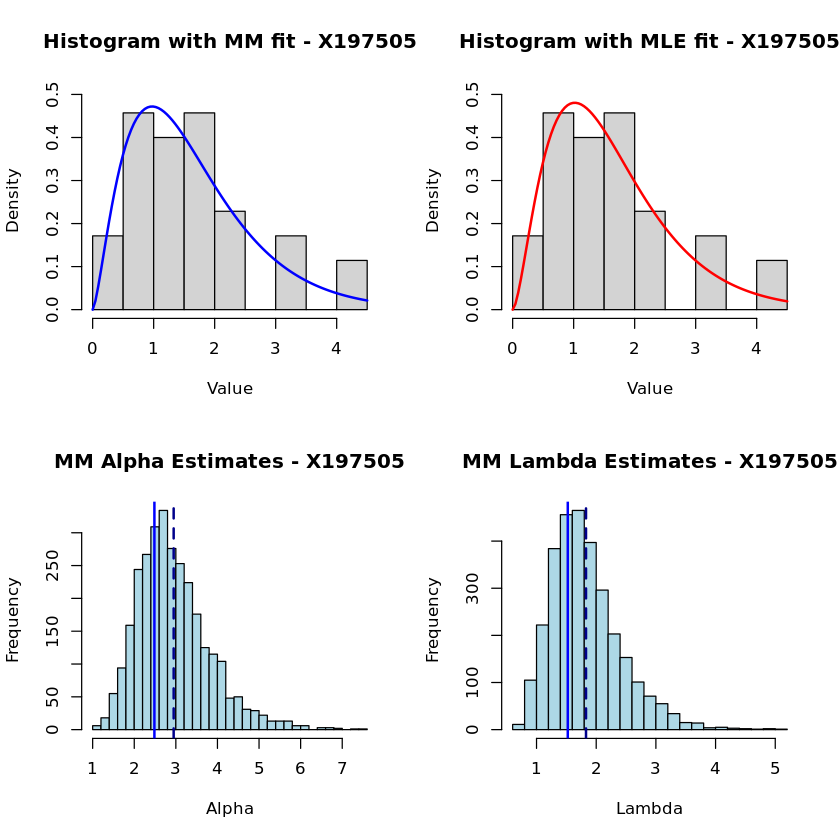


========== Analysis for Key: X197592 ==========
Sample size: 35 
Sample mean: 1.57501 
Sample variance: 0.9071959 

a) Method of Moments estimators:
   Alpha (shape): 2.73442 
   Lambda (rate): 1.736129 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 9.929975e-20 -43.75614 2.734420 1.736129           NA
2 2 9.980877e-20 -43.75103 2.706044 1.727717 5.090199e-22
3 3 1.003081e-19 -43.74604 2.684438 1.702520 4.992988e-22
4 4 1.005211e-19 -43.74392 2.664458 1.694290 2.130614e-22
5 5 1.005655e-19 -43.74348 2.659840 1.687891 4.438577e-23

Final MLE estimates:
   Alpha (shape): 2.635403 
   Lambda (rate): 1.673262 
   Log-likelihood: -43.74263 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.929366 SD: 0.8674379 
     Lambda mean: 1.884396 SD: 0.6074058 
   Maximum Likelihood simulation results:
     Alpha mean: 2.921042 SD: 0.7782343 
     Lambda mean: 1.879865 SD: 0.5571717 


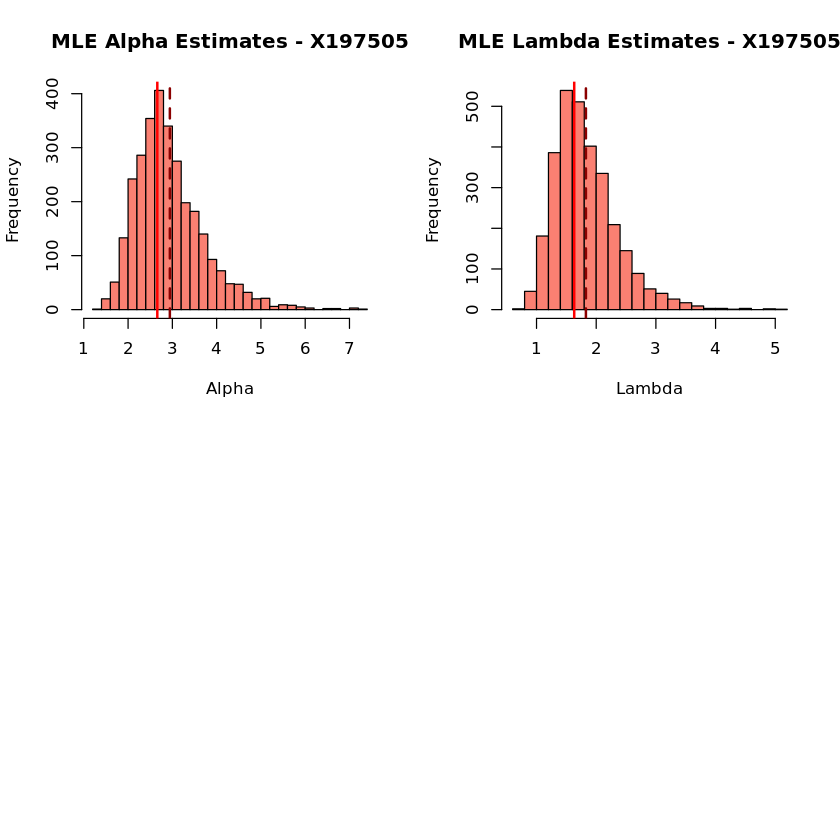

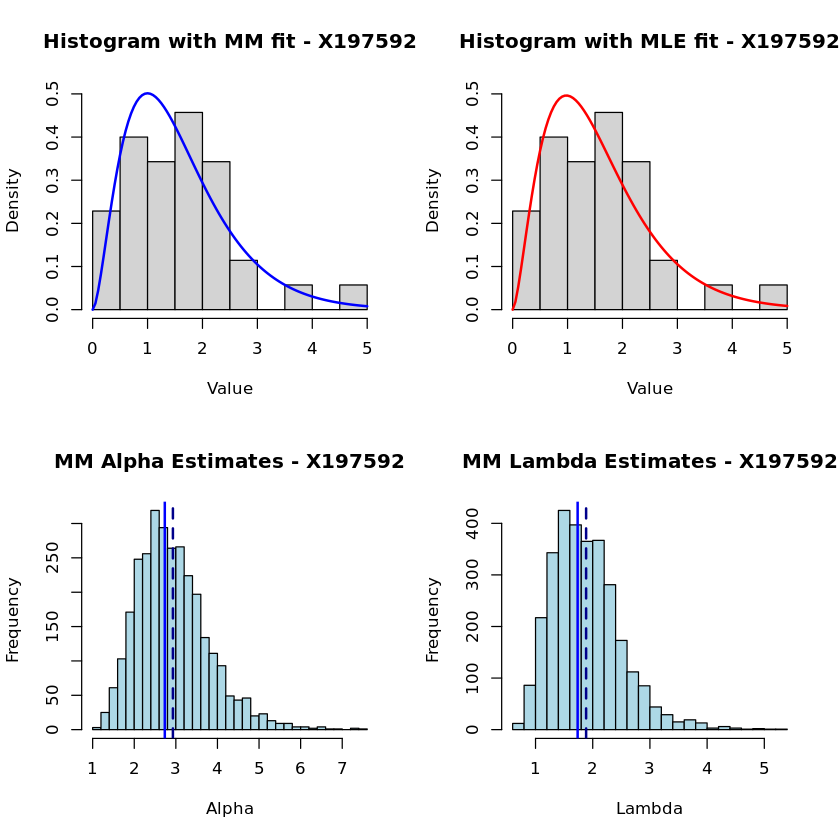


========== Analysis for Key: X198090 ==========
Sample size: 35 
Sample mean: 1.415389 
Sample variance: 0.9205991 

a) Method of Moments estimators:
   Alpha (shape): 2.176113 
   Lambda (rate): 1.537466 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 6.512926e-18 -39.57274 2.176113 1.537466           NA
2 2 8.471279e-18 -39.30985 2.355589 1.593942 1.958353e-18
3 3 1.127349e-17 -39.02408 2.529327 1.764263 2.802214e-18
4 4 1.333350e-17 -38.85625 2.825853 2.006583 2.060012e-18
5 5 1.338583e-17 -38.85233 2.848141 2.008516 5.232818e-20

Final MLE estimates:
   Alpha (shape): 2.89056 
   Lambda (rate): 2.042237 
   Log-likelihood: -38.85004 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 3.182668 SD: 0.9502195 
     Lambda mean: 2.272554 SD: 0.7307594 
   Maximum Likelihood simulation results:
     Alpha mean: 3.18773 SD: 0.8582336 
     Lambda mean: 2.276718 SD: 0.6717198 


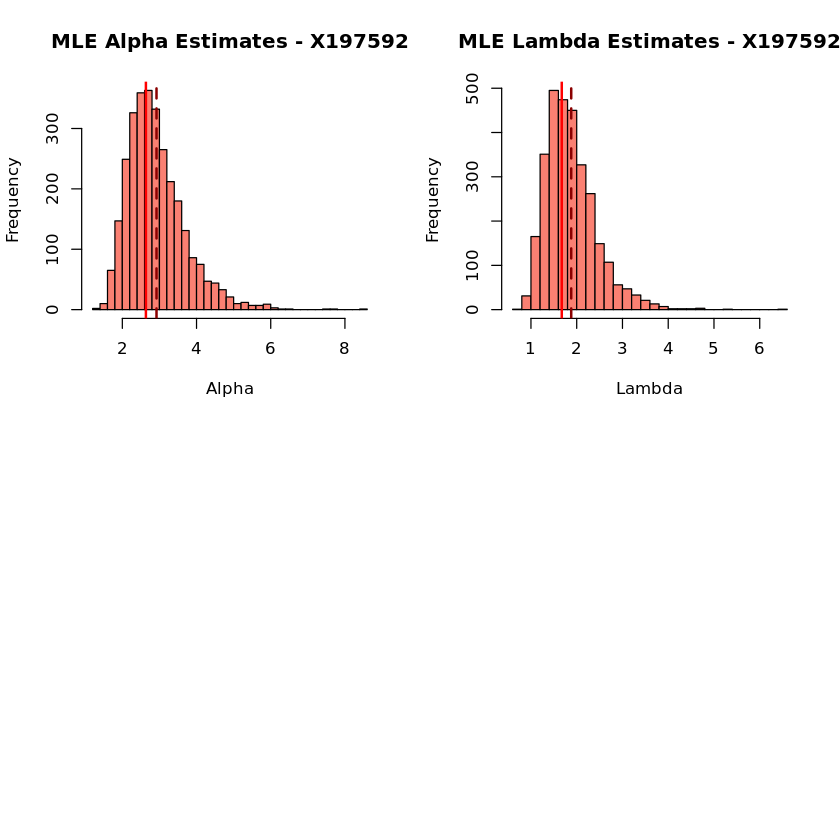

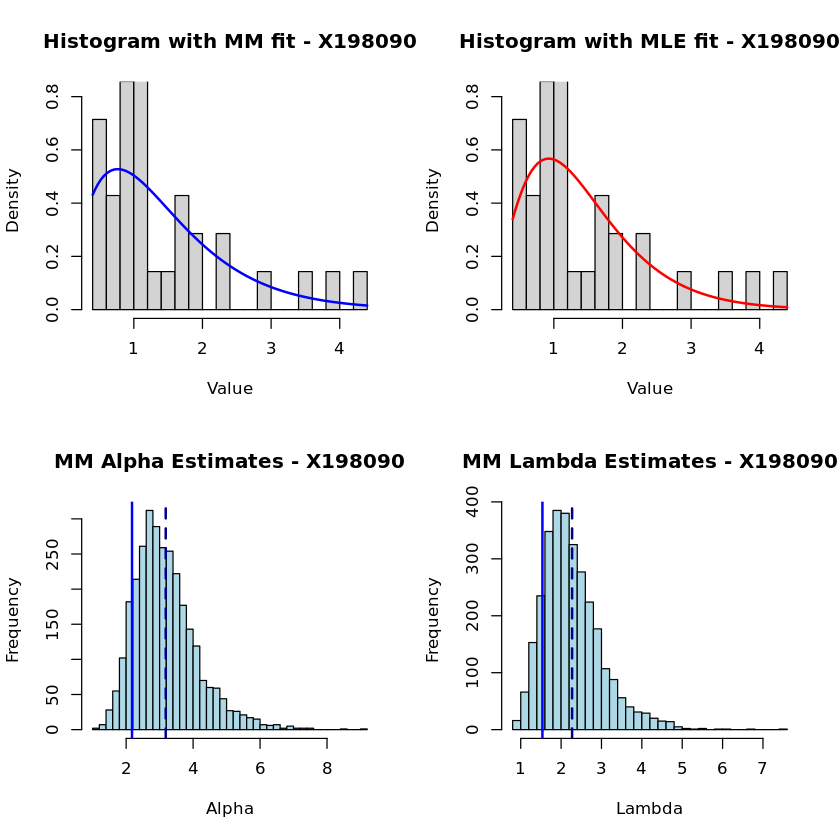


========== Analysis for Key: X200035 ==========
Sample size: 35 
Sample mean: 1.519604 
Sample variance: 0.8674153 

a) Method of Moments estimators:
   Alpha (shape): 2.662157 
   Lambda (rate): 1.751876 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 1.641416e-19 -43.25356 2.662157 1.751876           NA
2 2 1.672962e-19 -43.23452 2.608579 1.735614 3.154656e-21
3 3 1.705004e-19 -43.21555 2.565492 1.683599 3.204225e-21
4 4 1.716807e-19 -43.20865 2.531985 1.670674 1.180236e-21
5 5 1.719927e-19 -43.20683 2.520408 1.656411 3.120492e-22

Final MLE estimates:
   Alpha (shape): 2.482995 
   Lambda (rate): 1.633975 
   Log-likelihood: -43.20454 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.762459 SD: 0.8293569 
     Lambda mean: 1.842196 SD: 0.6024374 
   Maximum Likelihood simulation results:
     Alpha mean: 2.751784 SD: 0.7393641 
     Lambda mean: 1.835571 SD: 0.5496094 


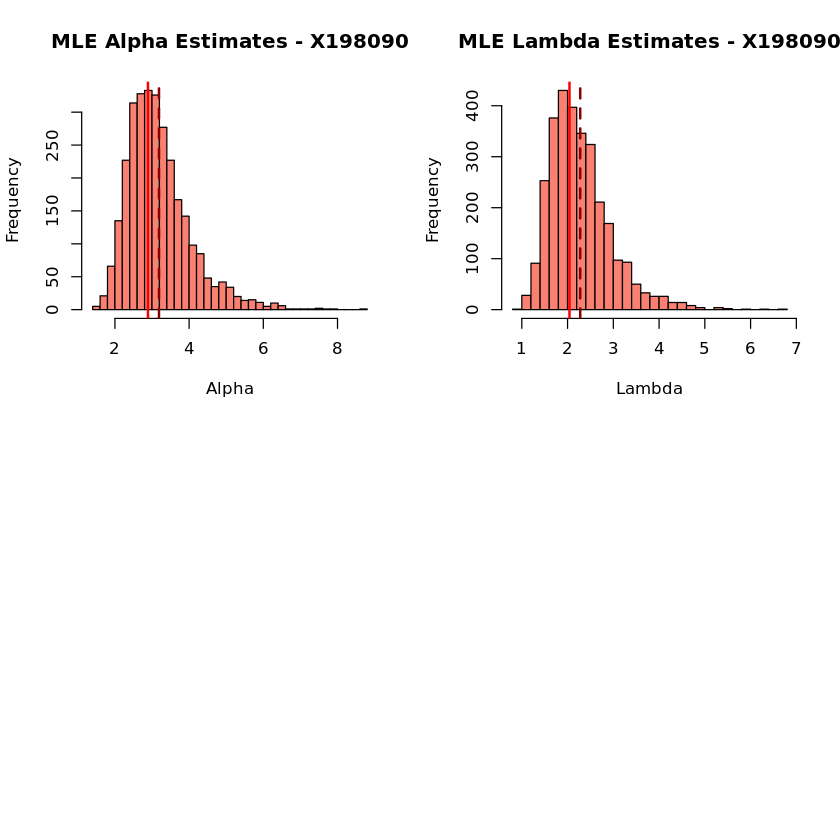

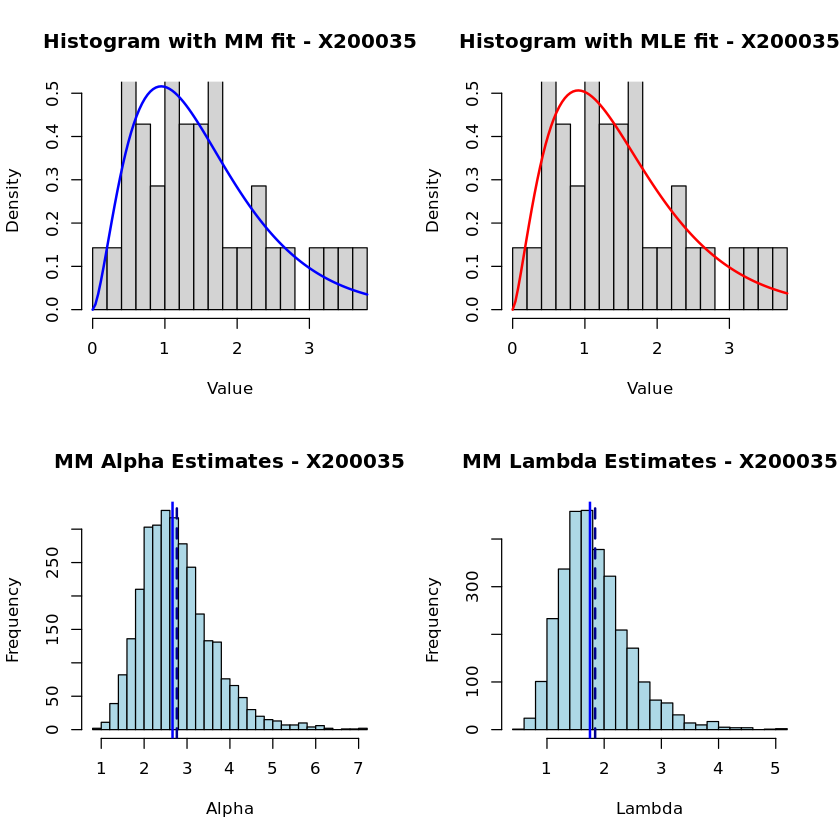


========== Analysis for Key: X200090 ==========
Sample size: 35 
Sample mean: 1.802504 
Sample variance: 1.28679 

a) Method of Moments estimators:
   Alpha (shape): 2.524903 
   Lambda (rate): 1.400776 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 1.345198e-21 -48.05775 2.524903 1.400776           NA
2 2 1.378914e-21 -48.03299 2.585721 1.417462 3.371592e-23
3 3 1.405952e-21 -48.01357 2.622335 1.449925 2.703840e-23
4 4 1.426346e-21 -47.99917 2.687687 1.497049 2.039410e-23
5 5 1.429632e-21 -47.99687 2.702538 1.496794 3.285591e-24

Final MLE estimates:
   Alpha (shape): 2.737844 
   Lambda (rate): 1.518912 
   Log-likelihood: -47.99509 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 3.031767 SD: 0.9011536 
     Lambda mean: 1.702662 SD: 0.54756 
   Maximum Likelihood simulation results:
     Alpha mean: 3.029756 SD: 0.804006 
     Lambda mean: 1.702015 SD: 0.4991446 


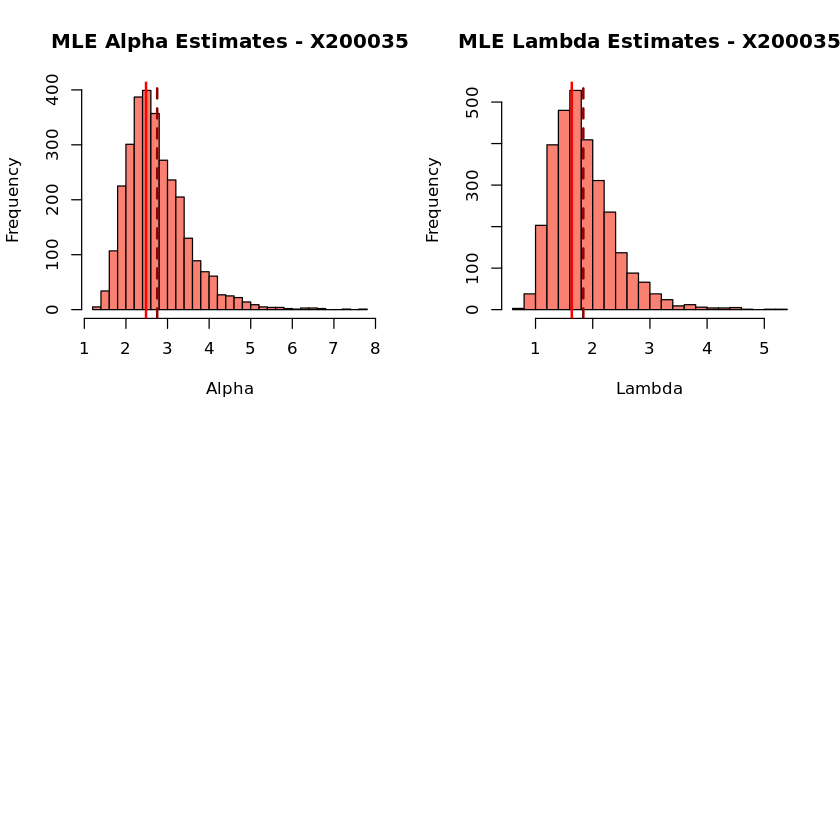

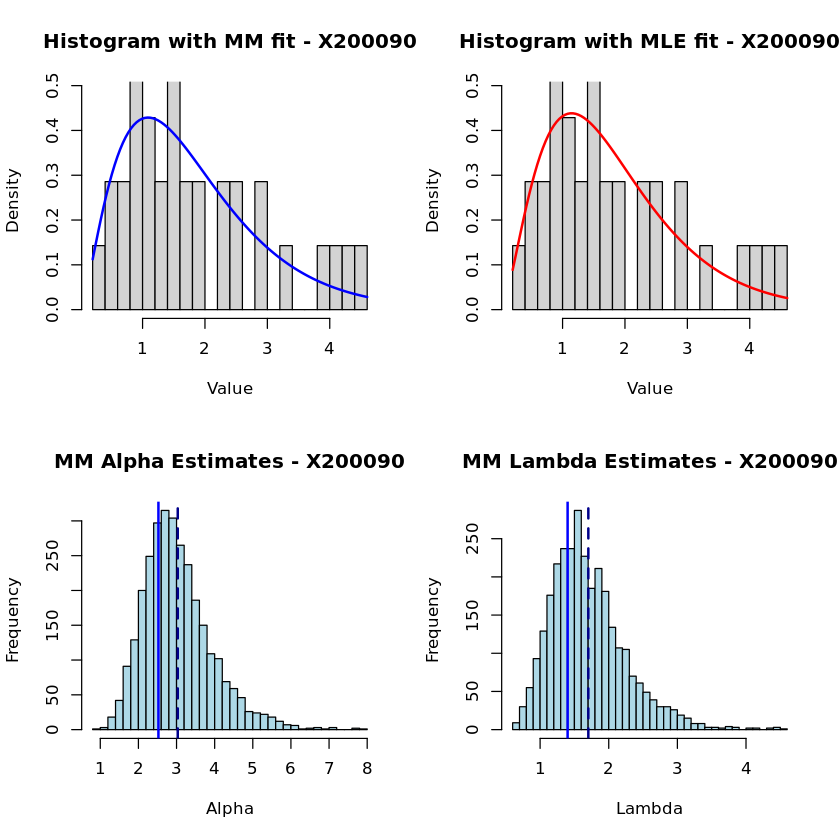


========== Analysis for Key: X200484 ==========
Sample size: 35 
Sample mean: 1.722795 
Sample variance: 1.580575 

a) Method of Moments estimators:
   Alpha (shape): 1.877811 
   Lambda (rate): 1.08998 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 2.752458e-22 -49.64438 1.877811 1.089980           NA
2 2 2.902794e-22 -49.59120 1.952195 1.111740 1.503360e-23
3 3 2.957446e-22 -49.57255 1.961861 1.138878 5.465163e-24
4 4 3.011492e-22 -49.55444 2.005742 1.151351 5.404608e-24
5 5 3.052069e-22 -49.54105 2.034923 1.176896 4.057642e-24

Final MLE estimates:
   Alpha (shape): 2.088359 
   Lambda (rate): 1.212193 
   Log-likelihood: -49.53386 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.338731 SD: 0.7107886 
     Lambda mean: 1.380475 SD: 0.4607833 
   Maximum Likelihood simulation results:
     Alpha mean: 2.309683 SD: 0.6169513 
     Lambda mean: 1.363361 SD: 0.4091803 


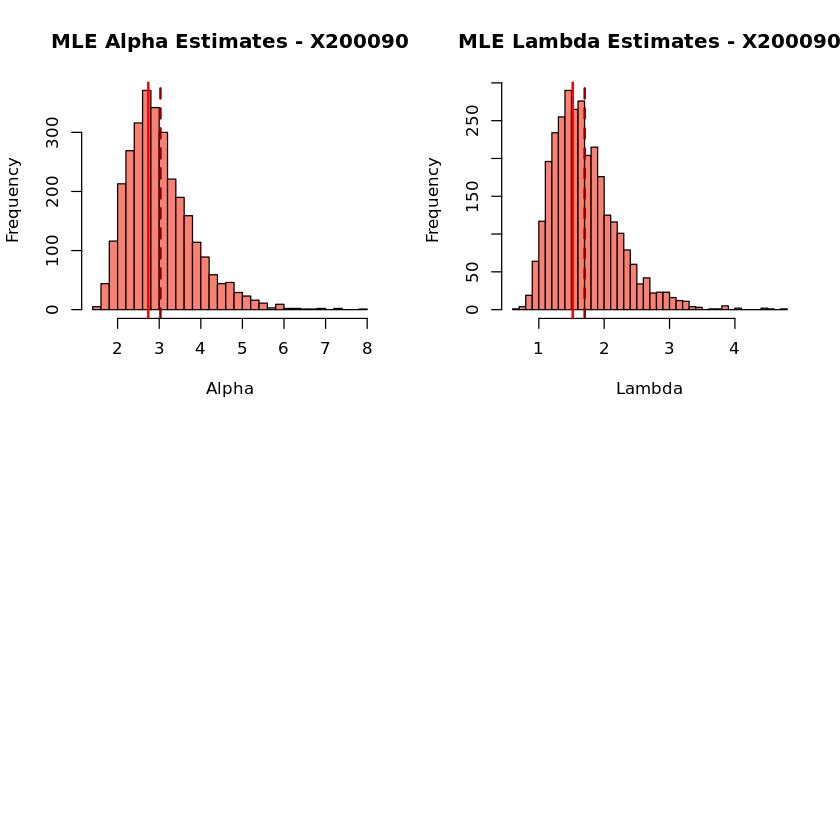

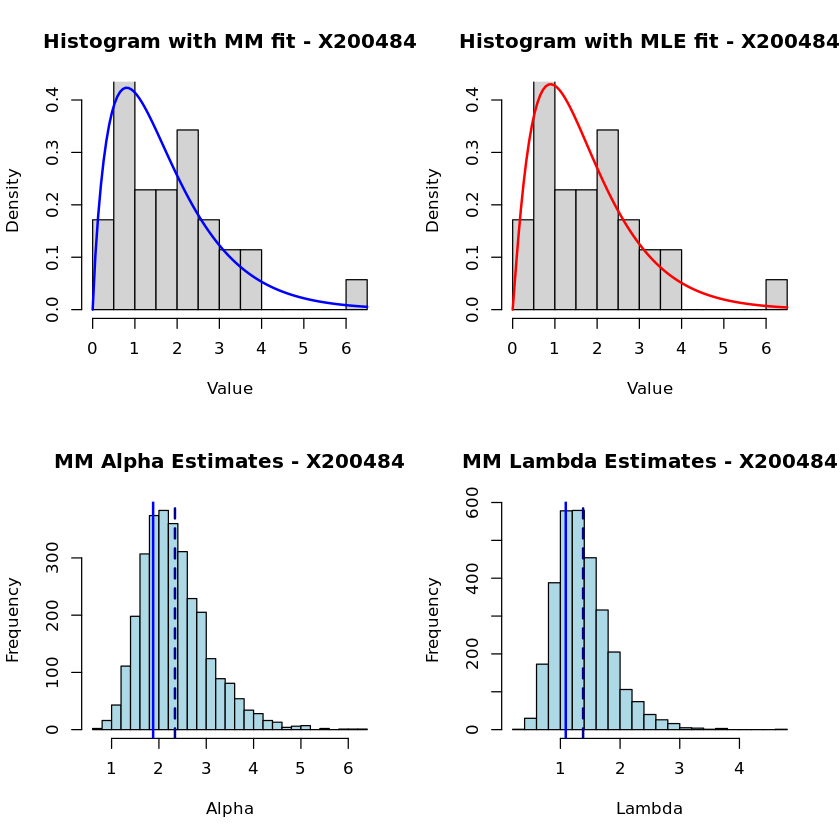


========== Analysis for Key: X202999 ==========
Sample size: 35 
Sample mean: 1.295489 
Sample variance: 0.9829929 

a) Method of Moments estimators:
   Alpha (shape): 1.707329 
   Lambda (rate): 1.317903 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 3.842710e-19 -42.40294 1.707329 1.317903           NA
2 2 4.061895e-19 -42.34747 1.639760 1.294981 2.191847e-20
3 3 4.165021e-19 -42.32240 1.626195 1.255307 1.031258e-20
4 4 4.226519e-19 -42.30774 1.592284 1.243731 6.149826e-21
5 5 4.254168e-19 -42.30122 1.585467 1.223876 2.764867e-21

Final MLE estimates:
   Alpha (shape): 1.544238 
   Lambda (rate): 1.192012 
   Log-likelihood: -42.29386 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 1.741555 SD: 0.5342111 
     Lambda mean: 1.37654 SD: 0.473708 
   Maximum Likelihood simulation results:
     Alpha mean: 1.686806 SD: 0.439197 
     Lambda mean: 1.332813 SD: 0.4035658 


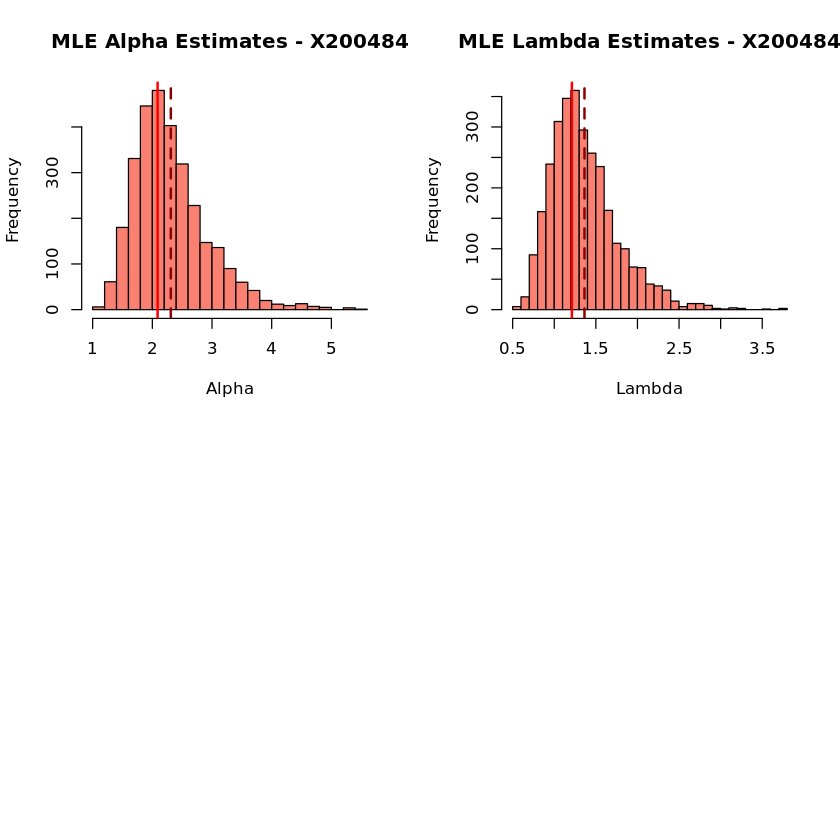

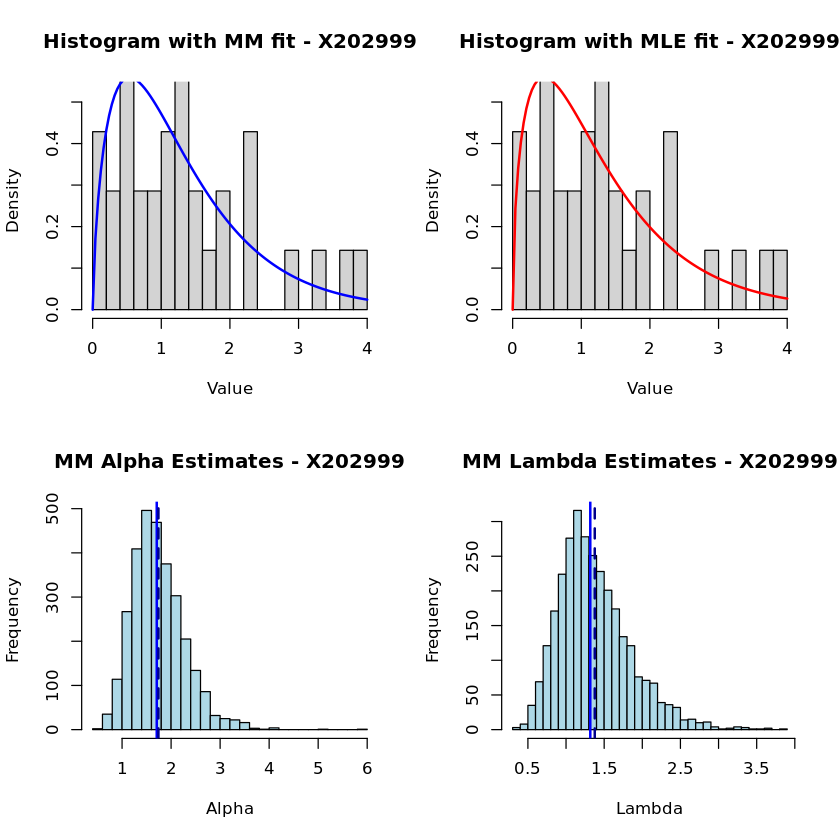


========== Analysis for Key: X203026 ==========
Sample size: 35 
Sample mean: 1.636212 
Sample variance: 0.9935023 

a) Method of Moments estimators:
   Alpha (shape): 2.694699 
   Lambda (rate): 1.646913 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 2.303560e-20 -45.21725 2.694699 1.646913           NA
2 2 2.313173e-20 -45.21308 2.669209 1.639505 9.613475e-23
3 3 2.322037e-20 -45.20926 2.651121 1.618707 8.863703e-23
4 4 2.326030e-20 -45.20754 2.633390 1.611631 3.993133e-23
5 5 2.326839e-20 -45.20719 2.629406 1.606240 8.091224e-24

Final MLE estimates:
   Alpha (shape): 2.607478 
   Lambda (rate): 1.593607 
   Log-likelihood: -45.20649 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.892497 SD: 0.86176 
     Lambda mean: 1.789018 SD: 0.5752785 
   Maximum Likelihood simulation results:
     Alpha mean: 2.891178 SD: 0.7724788 
     Lambda mean: 1.788927 SD: 0.526935 


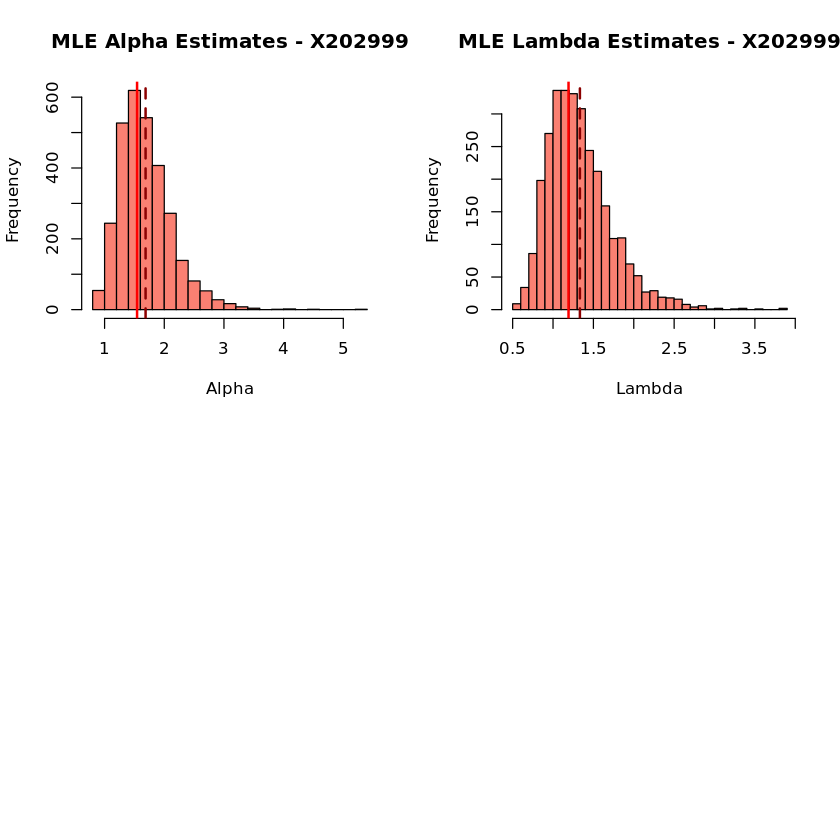

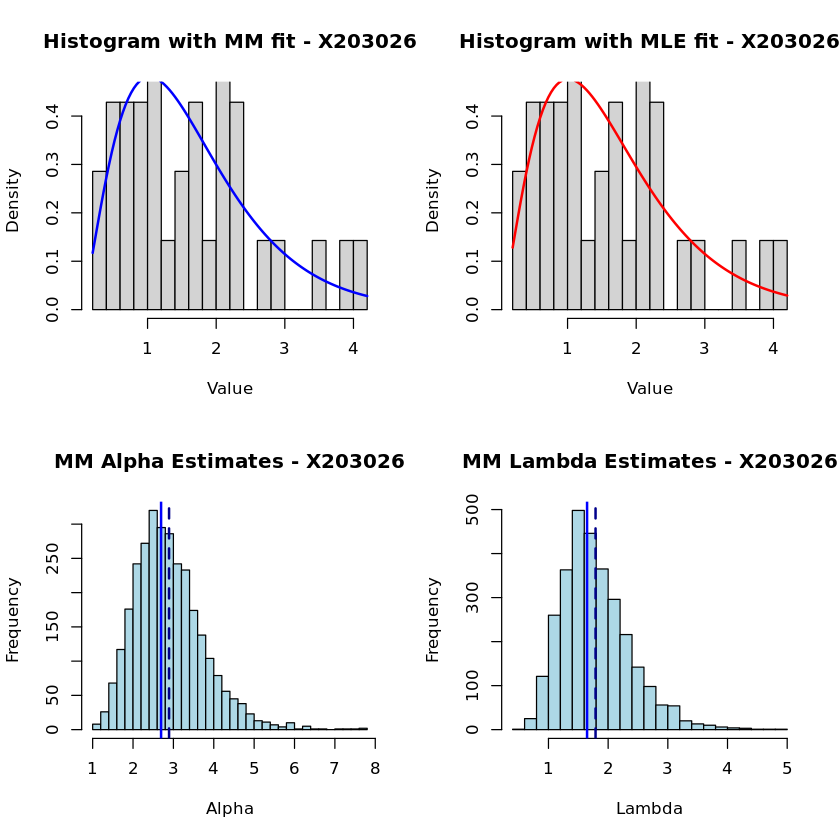


========== Analysis for Key: X205863 ==========
Sample size: 35 
Sample mean: 1.54161 
Sample variance: 1.011978 

a) Method of Moments estimators:
   Alpha (shape): 2.348432 
   Lambda (rate): 1.523363 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 1.473099e-20 -45.66433 2.348432 1.523363           NA
2 2 1.553463e-20 -45.61121 2.265601 1.498007 8.036452e-22
3 3 1.630451e-20 -45.56285 2.202390 1.427597 7.698738e-22
4 4 1.642791e-20 -45.55531 2.174968 1.421253 1.234038e-22
5 5 1.649407e-20 -45.55129 2.167866 1.405585 6.615406e-23

Final MLE estimates:
   Alpha (shape): 2.108473 
   Lambda (rate): 1.367709 
   Log-likelihood: -45.54344 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.36045 SD: 0.7126357 
     Lambda mean: 1.557516 SD: 0.5160604 
   Maximum Likelihood simulation results:
     Alpha mean: 2.331501 SD: 0.6161512 
     Lambda mean: 1.539195 SD: 0.4626689 


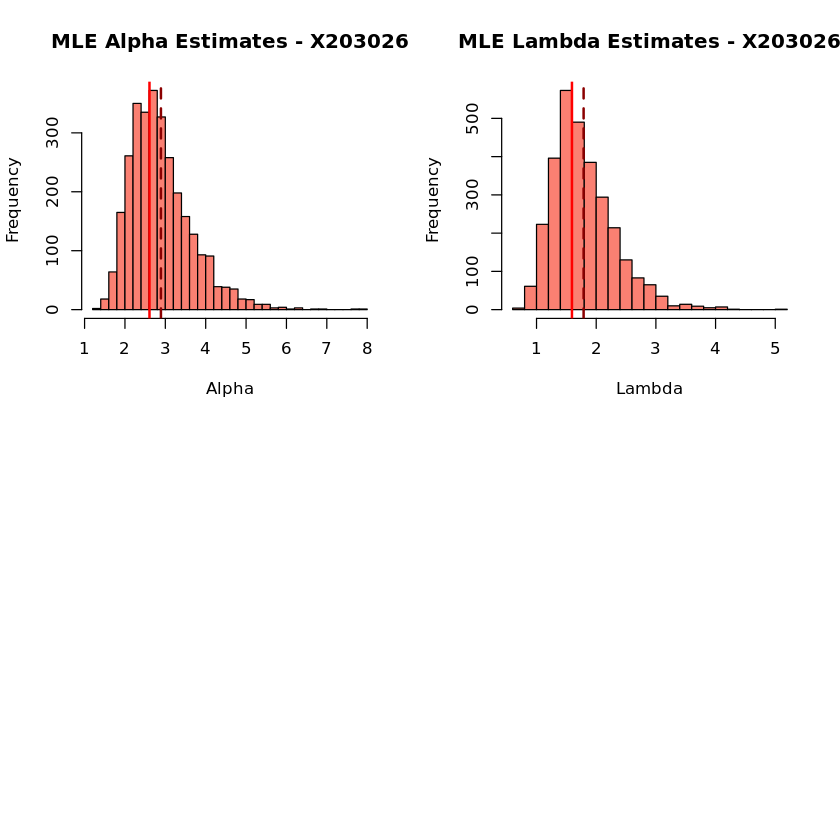

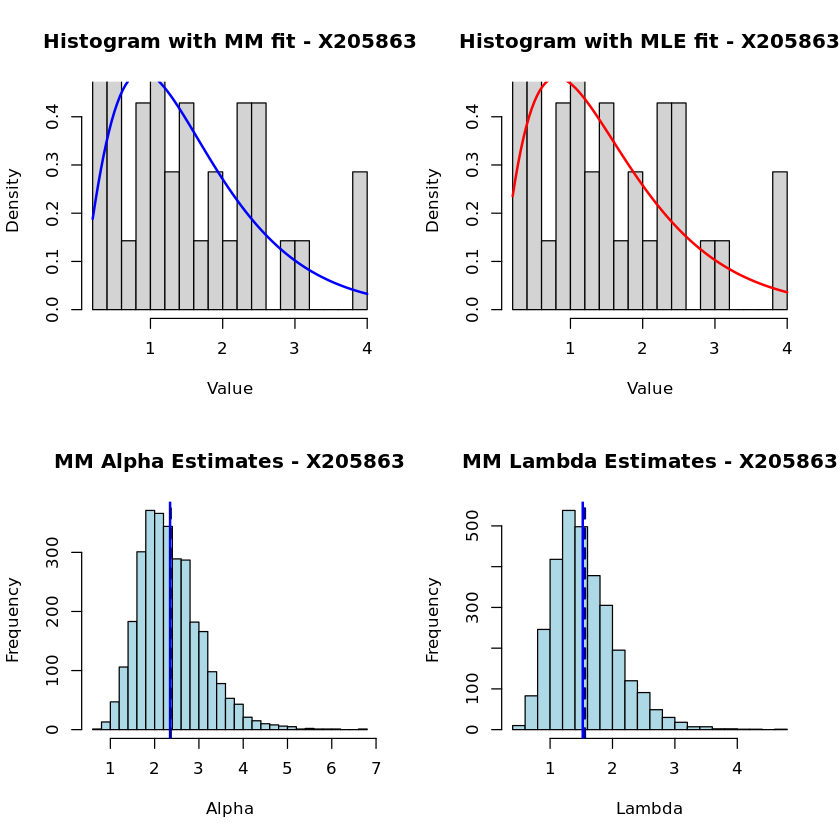


========== Analysis for Key: X207641 ==========
Sample size: 35 
Sample mean: 1.825079 
Sample variance: 1.914395 

a) Method of Moments estimators:
   Alpha (shape): 1.73993 
   Lambda (rate): 0.953345 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k  lambda_k      Delta_k
1 1 2.422452e-23 -52.07468 1.739930 0.9533450           NA
2 2 2.723117e-23 -51.95768 1.846298 0.9836663 3.006649e-24
3 3 2.826401e-23 -51.92045 1.858815 1.0187259 1.032836e-24
4 4 2.933690e-23 -51.88320 1.919602 1.0351999 1.072895e-24
5 5 2.971548e-23 -51.87037 1.927442 1.0563111 3.785743e-25

Final MLE estimates:
   Alpha (shape): 2.030797 
   Lambda (rate): 1.112718 
   Log-likelihood: -51.84316 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.27854 SD: 0.6851094 
     Lambda mean: 1.27136 SD: 0.4226857 
   Maximum Likelihood simulation results:
     Alpha mean: 2.244997 SD: 0.5949166 
     Lambda mean: 1.253248 SD: 0.3799641 

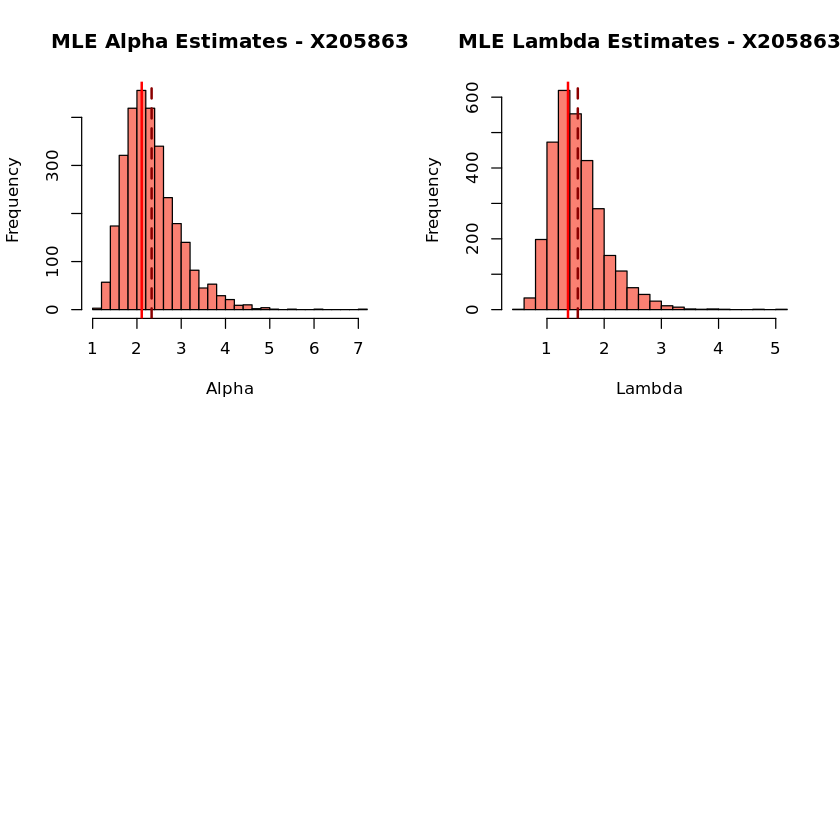

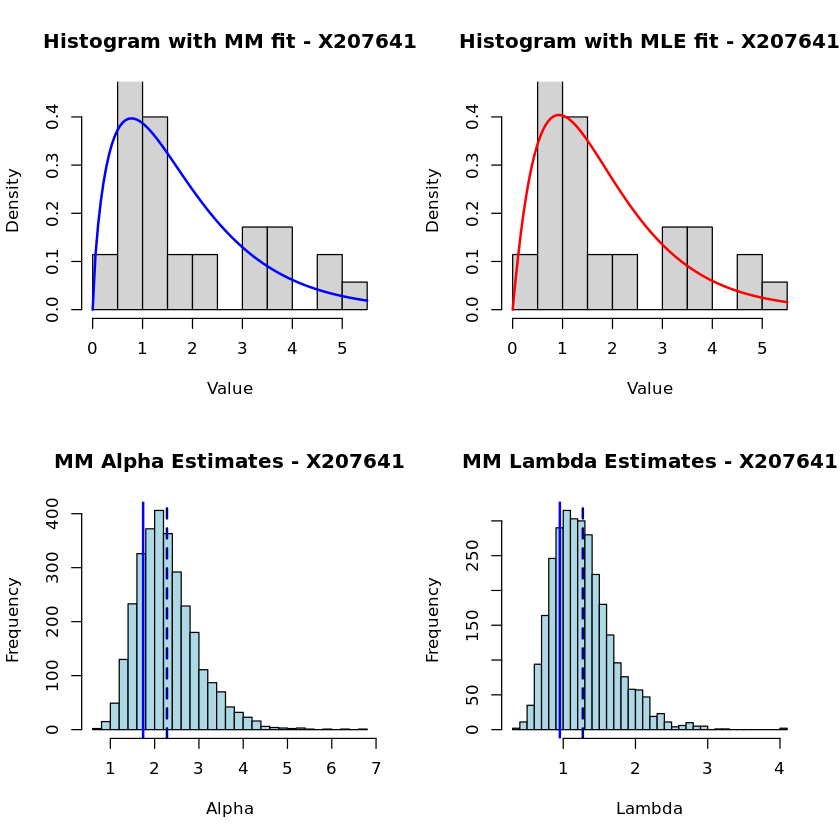


========== Analysis for Key: X207736 ==========
Sample size: 35 
Sample mean: 1.696173 
Sample variance: 0.8971274 

a) Method of Moments estimators:
   Alpha (shape): 3.206906 
   Lambda (rate): 1.890671 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 3.502134e-19 -42.49574 3.206906 1.890671           NA
2 2 3.619640e-19 -42.46274 3.287214 1.912949 1.175064e-20
3 3 3.737895e-19 -42.43059 3.342694 1.966103 1.182549e-20
4 4 3.877724e-19 -42.39387 3.635868 2.141873 1.398288e-20
5 5 3.884100e-19 -42.39223 3.615955 2.134502 6.376258e-22

Final MLE estimates:
   Alpha (shape): 3.567997 
   Lambda (rate): 2.103558 
   Log-likelihood: -42.39042 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 3.894095 SD: 1.16854 
     Lambda mean: 2.315615 SD: 0.7319229 
   Maximum Likelihood simulation results:
     Alpha mean: 3.920785 SD: 1.079424 
     Lambda mean: 2.331688 SD: 0.6869659 


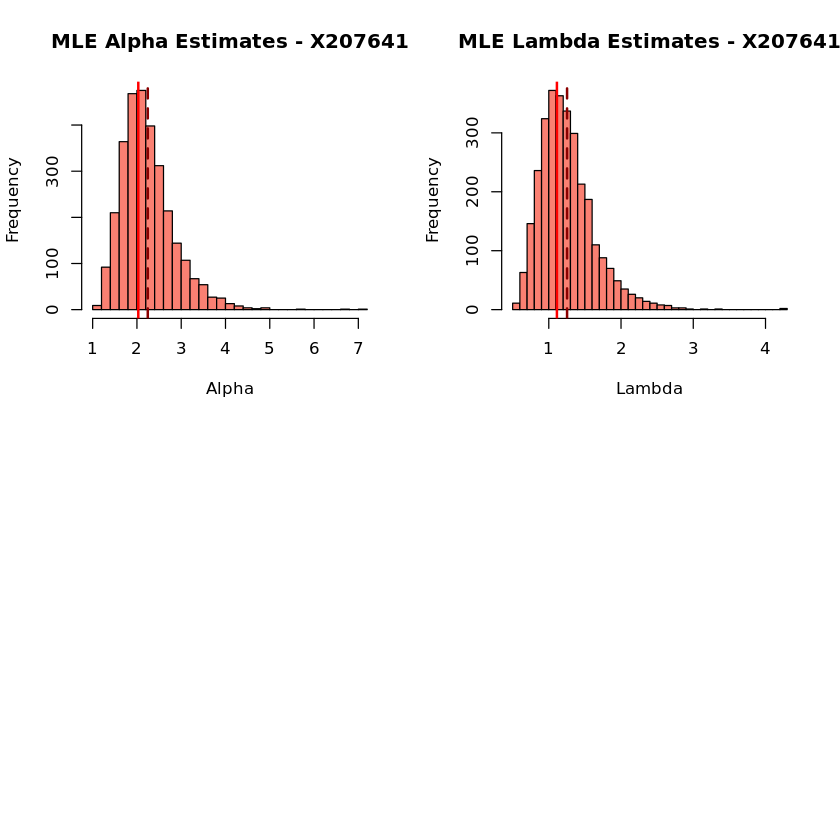

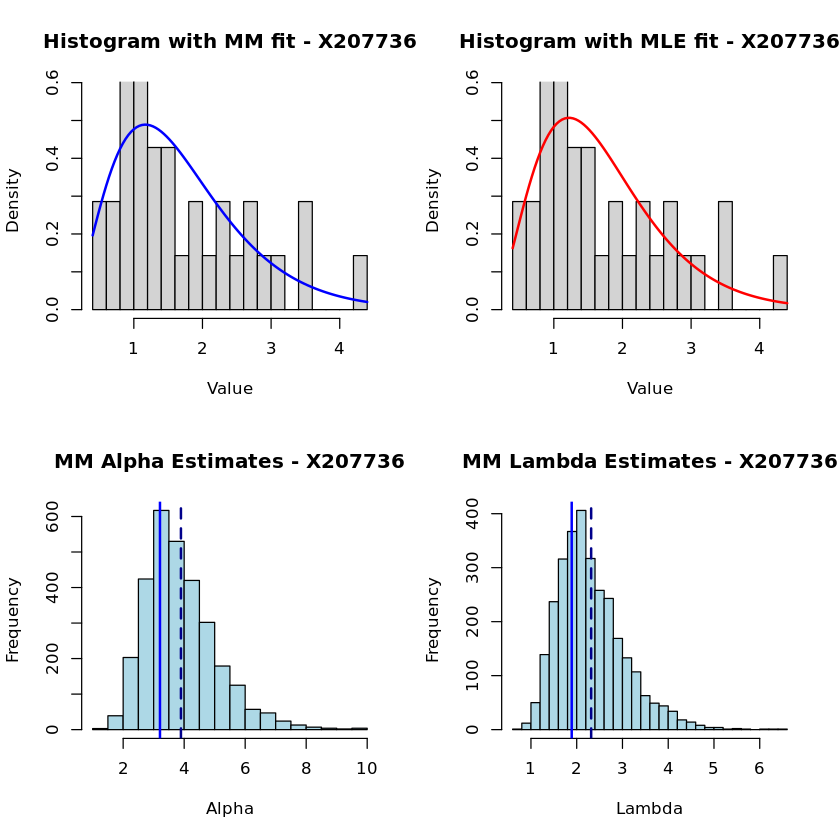


========== Analysis for Key: X208115 ==========
Sample size: 35 
Sample mean: 1.625941 
Sample variance: 0.9469033 

a) Method of Moments estimators:
   Alpha (shape): 2.791925 
   Lambda (rate): 1.717114 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 6.116973e-21 -46.54322 2.791925 1.717114           NA
2 2 6.957730e-21 -46.41443 2.648543 1.675107 8.407574e-22
3 3 7.347817e-21 -46.35988 2.629243 1.617671 3.900863e-22
4 4 7.783253e-21 -46.30231 2.533543 1.587708 4.354361e-22
5 5 7.958937e-21 -46.27999 2.522582 1.552369 1.756848e-22

Final MLE estimates:
   Alpha (shape): 2.346887 
   Lambda (rate): 1.443403 
   Log-likelihood: -46.22698 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 2.618403 SD: 0.7933311 
     Lambda mean: 1.634771 SD: 0.541309 
   Maximum Likelihood simulation results:
     Alpha mean: 2.602695 SD: 0.7063282 
     Lambda mean: 1.625317 SD: 0.4926571 


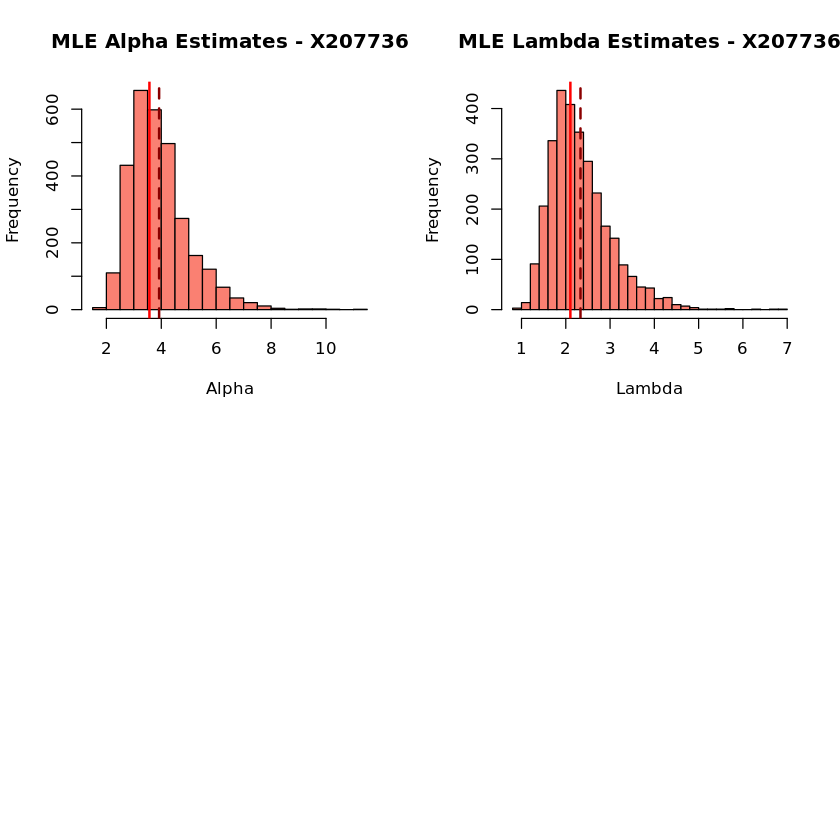

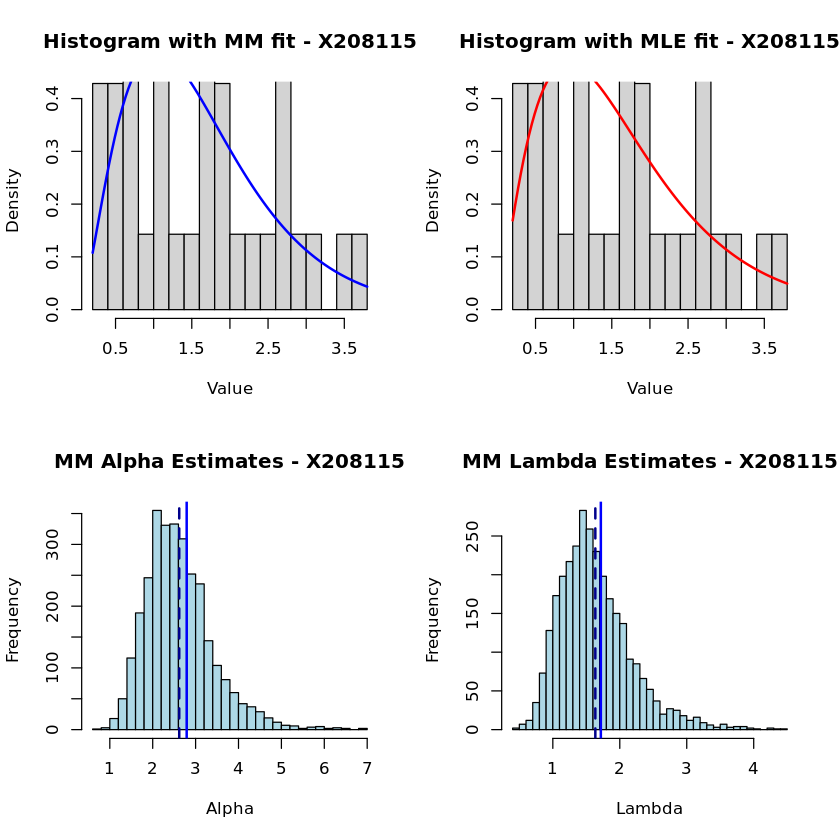


========== Analysis for Key: X208331 ==========
Sample size: 35 
Sample mean: 1.488191 
Sample variance: 0.6604751 

a) Method of Moments estimators:
   Alpha (shape): 3.353211 
   Lambda (rate): 2.253213 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 1.412875e-17 -38.79832 3.353211 2.253213           NA
2 2 1.413328e-17 -38.79800 3.345240 2.250825 4.529027e-21
3 3 1.413863e-17 -38.79762 3.338375 2.243130 5.348142e-21
4 4 1.414206e-17 -38.79738 3.328526 2.237640 3.432861e-21
5 5 1.414283e-17 -38.79732 3.325664 2.234654 7.696137e-22

Final MLE estimates:
   Alpha (shape): 3.318574 
   Lambda (rate): 2.229938 
   Log-likelihood: -38.79728 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 3.645558 SD: 1.097403 
     Lambda mean: 2.472704 SD: 0.7899684 
   Maximum Likelihood simulation results:
     Alpha mean: 3.65972 SD: 1.004623 
     Lambda mean: 2.482844 SD: 0.7350456 


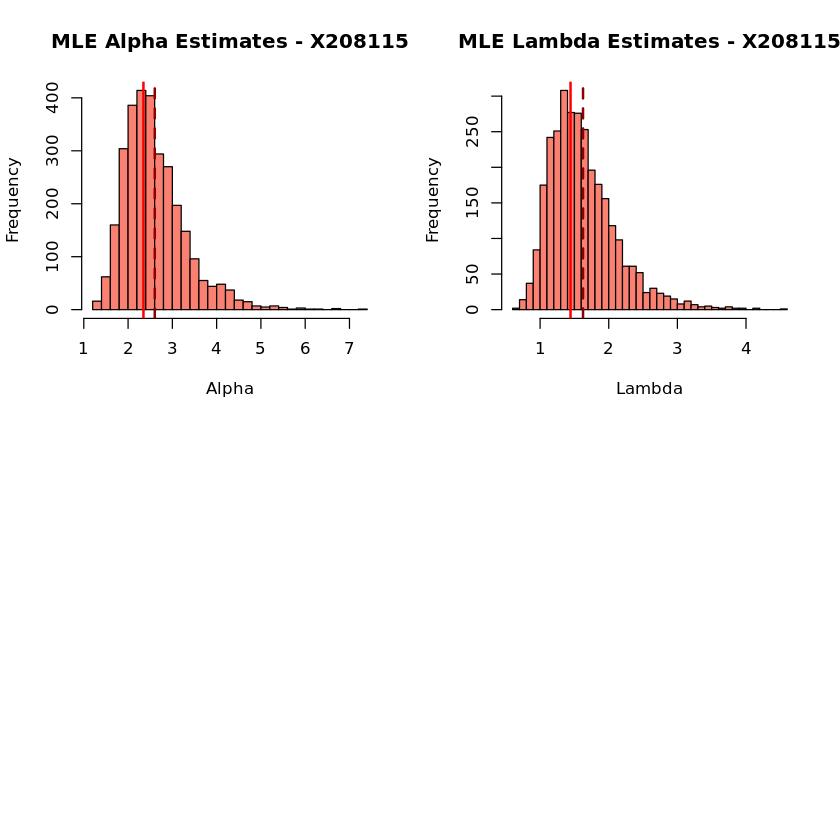

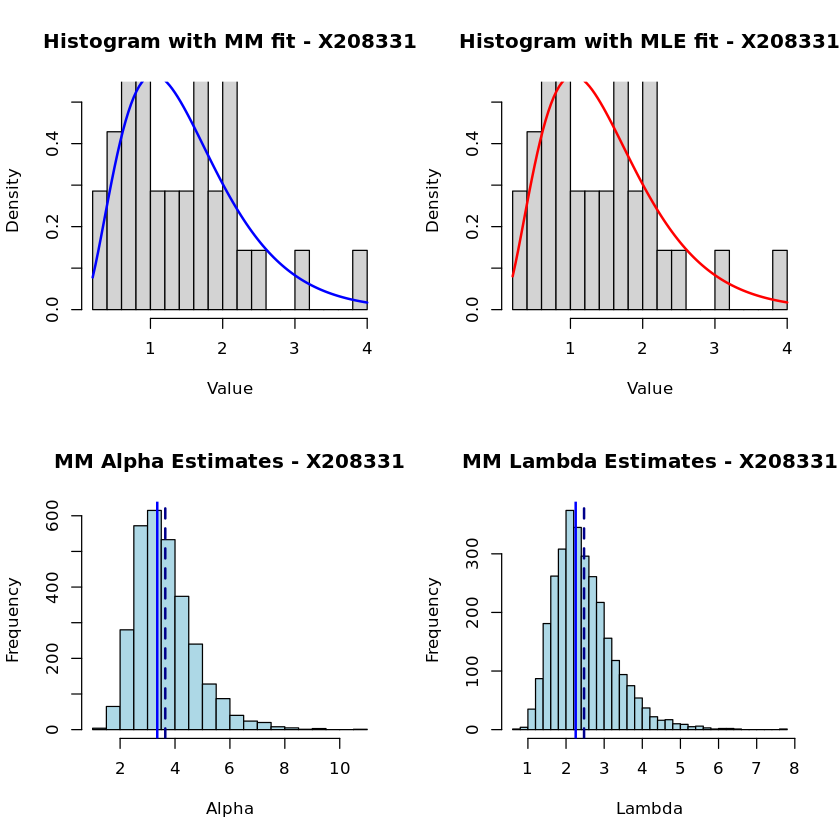


========== Analysis for Key: X208450 ==========
Sample size: 35 
Sample mean: 1.610373 
Sample variance: 0.691211 

a) Method of Moments estimators:
   Alpha (shape): 3.751823 
   Lambda (rate): 2.329785 

b) Maximum Likelihood Estimation:

Optimization steps table:
  k          L_k   log_L_k  alpha_k lambda_k      Delta_k
1 1 6.042092e-18 -39.64778 3.751823 2.329785           NA
2 2 6.054043e-18 -39.64581 3.785642 2.348249 1.195162e-20
3 3 6.055713e-18 -39.64553 3.791430 2.354382 1.669443e-21
4 4 6.057324e-18 -39.64526 3.803858 2.361154 1.611137e-21
5 5 6.057553e-18 -39.64523 3.806000 2.363429 2.287820e-22

Final MLE estimates:
   Alpha (shape): 3.814603 
   Lambda (rate): 2.36877 
   Log-likelihood: -39.64518 

c) Simulation analysis:
   Method of Moments simulation results:
     Alpha mean: 4.133846 SD: 1.196731 
     Lambda mean: 2.588942 SD: 0.7935604 
   Maximum Likelihood simulation results:
     Alpha mean: 4.174272 SD: 1.118464 
     Lambda mean: 2.614432 SD: 0.7497777 


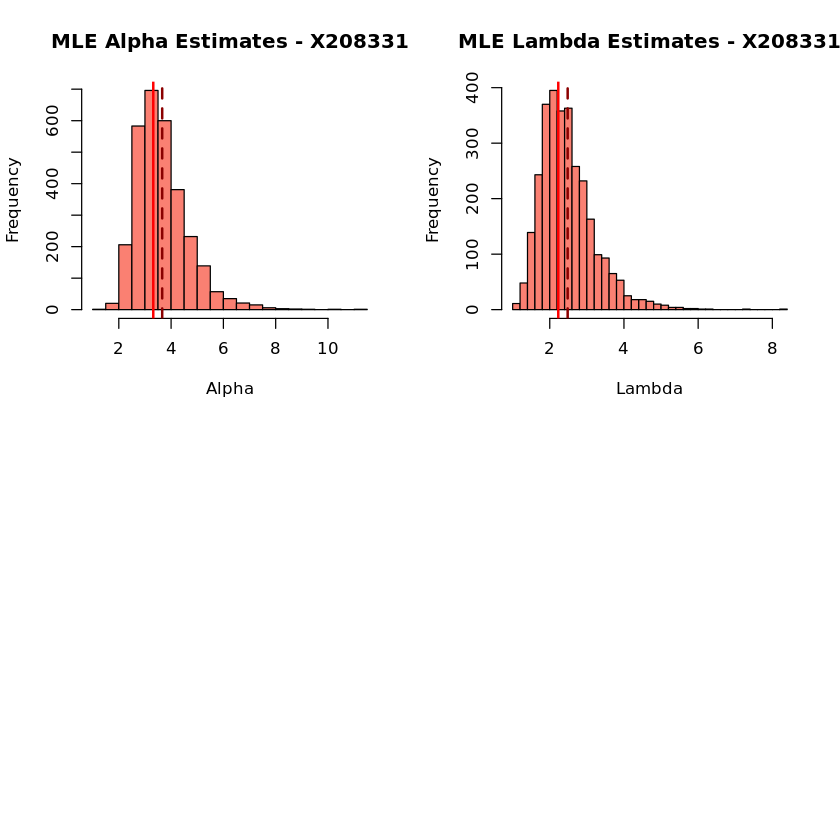

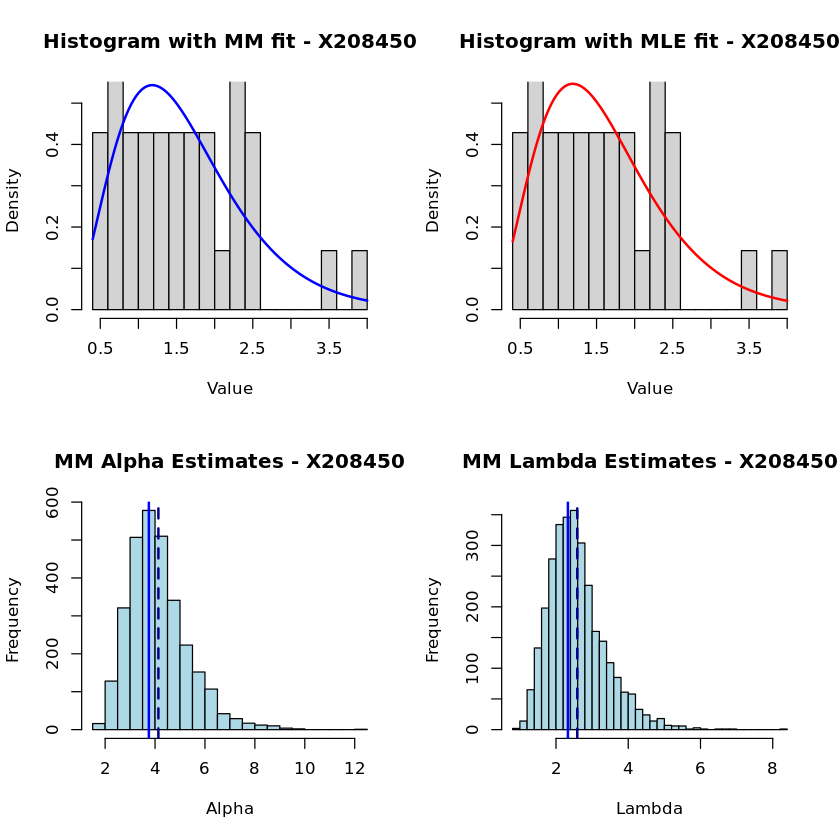


========== Summary Comparison ==========
Key	MM-Alpha	MM-Lambda	MLE-Alpha	MLE-Lambda
X157170 	 2.2472 	 1.4146 	 2.2072 	 1.3895 
X176147 	 1.6742 	 0.9079 	 1.7652 	 0.9572 
X188190 	 2.4928 	 1.5575 	 2.416 	 1.5095 
X188642 	 3.2733 	 2.4938 	 3.4228 	 2.6076 
X189187 	 2.9822 	 1.7851 	 2.9963 	 1.7935 
X189365 	 1.7318 	 0.9518 	 1.8633 	 1.0241 
X190870 	 3.3985 	 2.1731 	 3.0059 	 1.922 
X192588 	 4.1113 	 2.4959 	 3.6034 	 2.1876 
X194969 	 2.3978 	 1.6366 	 1.9333 	 1.3196 
X195557 	 1.7817 	 1.0696 	 1.8106 	 1.087 
X195770 	 1.5397 	 0.9294 	 2.059 	 1.2428 
X196891 	 2.729 	 1.5212 	 2.8435 	 1.5851 
X197086 	 2.2906 	 1.2382 	 3.0797 	 1.6647 
X197505 	 2.4845 	 1.5237 	 2.6602 	 1.6315 
X197592 	 2.7344 	 1.7361 	 2.6354 	 1.6733 
X198090 	 2.1761 	 1.5375 	 2.8906 	 2.0422 
X200035 	 2.6622 	 1.7519 	 2.483 	 1.634 
X200090 	 2.5249 	 1.4008 	 2.7378 	 1.5189 
X200484 	 1.8778 	 1.09 	 2.0884 	 1.2122 
X202999 	 1.7073 	 1.3179 	 1.5442 	 1.192 
X203026 	 2.6947 	 1.646

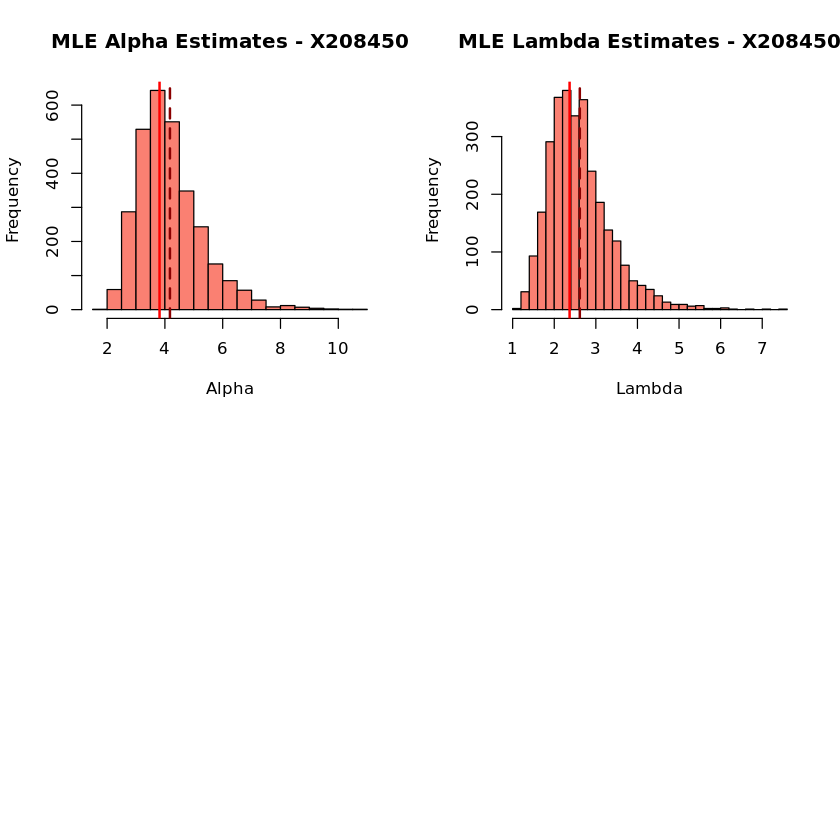

In [11]:
# Gamma Distribution Parameter Estimation

# Try to read the data file
tryCatch({
  data <- read.table("tarea22.dat", header = TRUE)
  cat("Successfully read the data file.\n")
  print(head(data))
}, error = function(e) {
  cat("Could not read the file. Creating synthetic data for demonstration.\n")
  set.seed(123)
  
  # Create synthetic data for 3 different gamma distributions
  keys <- c("key1", "key2", "key3")
  data <- data.frame(
    key = rep(keys, each = 30),
    value = c(
      rgamma(30, shape = 2, rate = 0.5),  # For key1
      rgamma(30, shape = 5, rate = 1),    # For key2
      rgamma(30, shape = 1, rate = 0.2)   # For key3
    )
  )
  
  cat("Created synthetic data with the following parameters:\n")
  cat("Key1: shape = 2, rate = 0.5\n")
  cat("Key2: shape = 5, rate = 1\n")
  cat("Key3: shape = 1, rate = 0.2\n")
})

# Function to extract data for each key
get_key_data <- function(data, key) {
  if ("key" %in% names(data)) {
    # Data is in long format
    return(data$value[data$key == key])
  } else if (key %in% names(data)) {
    # Data is in wide format
    return(data[[key]])
  } else {
    # Try to find the key in the first column
    if (key %in% data[,1]) {
      row_index <- which(data[,1] == key)
      return(as.numeric(data[row_index, -1]))
    } else {
      return(NULL)
    }
  }
}

# Function to calculate method of moments estimators for gamma distribution
gamma_method_of_moments <- function(x) {
  mean_x <- mean(x)
  var_x <- var(x)
  
  # For gamma distribution:
  # mean = alpha/lambda
  # variance = alpha/lambda^2
  
  # Solving for alpha and lambda:
  # lambda = mean/variance
  # alpha = mean^2/variance
  
  lambda_mm <- mean_x / var_x
  alpha_mm <- mean_x^2 / var_x
  
  return(list(alpha = alpha_mm, lambda = lambda_mm))
}

# Gamma log-likelihood function
gamma_log_likelihood <- function(params, x) {
  alpha <- params[1]
  lambda <- params[2]
  
  if (alpha <= 0 || lambda <= 0) {
    return(-Inf)  # Invalid parameters
  }
  
  # Log-likelihood for gamma distribution
  n <- length(x)
  log_lik <- n * alpha * log(lambda) - n * lgamma(alpha) + 
             (alpha - 1) * sum(log(x)) - lambda * sum(x)
  
  return(log_lik)
}

# Numerical optimization to find MLE
gamma_mle <- function(x, init_params, max_iter = 5) {
  # Initial values
  alpha <- init_params$alpha
  lambda <- init_params$lambda
  
  # Store the optimization steps
  steps <- data.frame(
    k = 1:max_iter,
    L_k = rep(NA, max_iter),
    log_L_k = rep(NA, max_iter),
    alpha_k = rep(NA, max_iter),
    lambda_k = rep(NA, max_iter),
    Delta_k = rep(NA, max_iter)
  )
  
  # Store current parameters
  current_params <- c(alpha, lambda)
  
  # Calculate initial likelihood
  current_log_lik <- gamma_log_likelihood(current_params, x)
  current_lik <- exp(current_log_lik)
  
  steps$L_k[1] <- current_lik
  steps$log_L_k[1] <- current_log_lik
  steps$alpha_k[1] <- alpha
  steps$lambda_k[1] <- lambda
  steps$Delta_k[1] <- NA
  
  # Optimization steps
  for (i in 2:max_iter) {
    # Use optim for one step
    opt_result <- optim(
      par = current_params,
      fn = function(params) -gamma_log_likelihood(params, x),
      method = "L-BFGS-B",
      lower = c(1e-8, 1e-8),  # Ensure positive parameters
      control = list(maxit = 1)  # One step at a time
    )
    
    # Update parameters
    current_params <- opt_result$par
    alpha <- current_params[1]
    lambda <- current_params[2]
    
    # Calculate new likelihood
    new_log_lik <- gamma_log_likelihood(current_params, x)
    new_lik <- exp(new_log_lik)
    
    # Calculate change
    delta <- abs(new_lik - current_lik)
    
    # Store step information
    steps$L_k[i] <- new_lik
    steps$log_L_k[i] <- new_log_lik
    steps$alpha_k[i] <- alpha
    steps$lambda_k[i] <- lambda
    steps$Delta_k[i] <- delta
    
    # Update current likelihood for next iteration
    current_lik <- new_lik
    current_log_lik <- new_log_lik
  }
  
  # Final optimization for better estimates
  final_opt <- optim(
    par = current_params,
    fn = function(params) -gamma_log_likelihood(params, x),
    method = "L-BFGS-B",
    lower = c(1e-8, 1e-8)
  )
  
  final_params <- final_opt$par
  
  return(list(
    steps = steps,
    final_alpha = final_params[1],
    final_lambda = final_params[2],
    final_log_likelihood = -final_opt$value
  ))
}

# Simulation function for part c
simulate_and_analyze <- function(true_alpha, true_lambda, N = 3000) {
  # Simulate samples from gamma distribution
  set.seed(456)
  simulated_samples <- lapply(1:N, function(i) {
    sample <- rgamma(30, shape = true_alpha, rate = true_lambda)
    mm_est <- gamma_method_of_moments(sample)
    
    # Use optim directly for MLE (faster for many simulations)
    mle_opt <- optim(
      par = c(mm_est$alpha, mm_est$lambda),
      fn = function(params) -gamma_log_likelihood(params, sample),
      method = "L-BFGS-B",
      lower = c(1e-8, 1e-8)
    )
    
    return(list(
      mm = mm_est,
      mle = list(alpha = mle_opt$par[1], lambda = mle_opt$par[2])
    ))
  })
  
  # Extract estimates
  mm_alphas <- sapply(simulated_samples, function(x) x$mm$alpha)
  mm_lambdas <- sapply(simulated_samples, function(x) x$mm$lambda)
  mle_alphas <- sapply(simulated_samples, function(x) x$mle$alpha)
  mle_lambdas <- sapply(simulated_samples, function(x) x$mle$lambda)
  
  # Compute statistics
  results <- list(
    mm_alpha_mean = mean(mm_alphas),
    mm_alpha_sd = sd(mm_alphas),
    mm_lambda_mean = mean(mm_lambdas),
    mm_lambda_sd = sd(mm_lambdas),
    mle_alpha_mean = mean(mle_alphas),
    mle_alpha_sd = sd(mle_alphas),
    mle_lambda_mean = mean(mle_lambdas),
    mle_lambda_sd = sd(mle_lambdas),
    mm_alphas = mm_alphas,
    mm_lambdas = mm_lambdas,
    mle_alphas = mle_alphas,
    mle_lambdas = mle_lambdas
  )
  
  return(results)
}

# Identify the keys in the data
if ("key" %in% names(data)) {
  keys <- unique(data$key)
} else {
  # Try to find keys in column names
  keys <- names(data)[names(data) != ""]
  if (length(keys) == 0) {
    # If no column names, try to find keys in the first column
    keys <- unique(data[,1])
  }
}

# Process each key
results <- list()

for (key in keys) {
  cat("\n========== Analysis for Key:", key, "==========\n")
  
  # Get data for this key
  key_data <- get_key_data(data, key)
  
  if (is.null(key_data) || length(key_data) == 0) {
    cat("No data found for key:", key, "\n")
    next
  }
  
  # Print summary statistics
  cat("Sample size:", length(key_data), "\n")
  cat("Sample mean:", mean(key_data), "\n")
  cat("Sample variance:", var(key_data), "\n")
  
  # a) Method of Moments estimators
  mm_estimators <- gamma_method_of_moments(key_data)
  cat("\na) Method of Moments estimators:\n")
  cat("   Alpha (shape):", mm_estimators$alpha, "\n")
  cat("   Lambda (rate):", mm_estimators$lambda, "\n")
  
  # b) Maximum Likelihood Estimation
  cat("\nb) Maximum Likelihood Estimation:\n")
  mle_results <- gamma_mle(key_data, mm_estimators)
  
  # Print the table of optimization steps
  cat("\nOptimization steps table:\n")
  print(mle_results$steps)
  
  cat("\nFinal MLE estimates:\n")
  cat("   Alpha (shape):", mle_results$final_alpha, "\n")
  cat("   Lambda (rate):", mle_results$final_lambda, "\n")
  cat("   Log-likelihood:", mle_results$final_log_likelihood, "\n")
  
  # c) Simulation and analysis
  cat("\nc) Simulation analysis:\n")
  sim_results <- simulate_and_analyze(mle_results$final_alpha, mle_results$final_lambda)
  
  cat("   Method of Moments simulation results:\n")
  cat("     Alpha mean:", sim_results$mm_alpha_mean, "SD:", sim_results$mm_alpha_sd, "\n")
  cat("     Lambda mean:", sim_results$mm_lambda_mean, "SD:", sim_results$mm_lambda_sd, "\n")
  
  cat("   Maximum Likelihood simulation results:\n")
  cat("     Alpha mean:", sim_results$mle_alpha_mean, "SD:", sim_results$mle_alpha_sd, "\n")
  cat("     Lambda mean:", sim_results$mle_lambda_mean, "SD:", sim_results$mle_lambda_sd, "\n")
  
  # Store results for this key
  results[[key]] <- list(
    data = key_data,
    mm = mm_estimators,
    mle = list(
      alpha = mle_results$final_alpha,
      lambda = mle_results$final_lambda
    ),
    sim = sim_results,
    optimization_steps = mle_results$steps
  )
  
  # Plot histogram with fitted distributions
  par(mfrow = c(2, 2))
  
  # Histogram with fitted distribution using MM estimates
  hist(key_data, breaks = 15, freq = FALSE, 
       main = paste("Histogram with MM fit -", key),
       xlab = "Value", ylim = c(0, max(density(key_data)$y) * 1.2))
  curve(dgamma(x, shape = mm_estimators$alpha, rate = mm_estimators$lambda), 
        add = TRUE, col = "blue", lwd = 2)
  
  # Histogram with fitted distribution using MLE estimates
  hist(key_data, breaks = 15, freq = FALSE, 
       main = paste("Histogram with MLE fit -", key),
       xlab = "Value", ylim = c(0, max(density(key_data)$y) * 1.2))
  curve(dgamma(x, shape = mle_results$final_alpha, rate = mle_results$final_lambda), 
        add = TRUE, col = "red", lwd = 2)
  
  # Histogram of simulated alpha estimates
  hist(sim_results$mm_alphas, breaks = 30, 
       main = paste("MM Alpha Estimates -", key),
       xlab = "Alpha", col = "lightblue")
  abline(v = mm_estimators$alpha, col = "blue", lwd = 2)
  abline(v = sim_results$mm_alpha_mean, col = "darkblue", lty = 2, lwd = 2)
  
  # Histogram of simulated lambda estimates
  hist(sim_results$mm_lambdas, breaks = 30, 
       main = paste("MM Lambda Estimates -", key),
       xlab = "Lambda", col = "lightblue")
  abline(v = mm_estimators$lambda, col = "blue", lwd = 2)
  abline(v = sim_results$mm_lambda_mean, col = "darkblue", lty = 2, lwd = 2)
  
  # Repeat for MLE estimates
  hist(sim_results$mle_alphas, breaks = 30, 
       main = paste("MLE Alpha Estimates -", key),
       xlab = "Alpha", col = "salmon")
  abline(v = mle_results$final_alpha, col = "red", lwd = 2)
  abline(v = sim_results$mle_alpha_mean, col = "darkred", lty = 2, lwd = 2)
  
  hist(sim_results$mle_lambdas, breaks = 30, 
       main = paste("MLE Lambda Estimates -", key),
       xlab = "Lambda", col = "salmon")
  abline(v = mle_results$final_lambda, col = "red", lwd = 2)
  abline(v = sim_results$mle_lambda_mean, col = "darkred", lty = 2, lwd = 2)
  
  par(mfrow = c(1, 1))
}

# Summary comparison of all keys
cat("\n========== Summary Comparison ==========\n")
cat("Key\tMM-Alpha\tMM-Lambda\tMLE-Alpha\tMLE-Lambda\n")
for (key in names(results)) {
  cat(key, "\t", 
      round(results[[key]]$mm$alpha, 4), "\t",
      round(results[[key]]$mm$lambda, 4), "\t",
      round(results[[key]]$mle$alpha, 4), "\t",
      round(results[[key]]$mle$lambda, 4), "\n")
}

Successfully read the data file.
    X157170   X176147   X188190   X188642   X189187   X189365   X190870
1 3.6826375 0.9930940 1.2439935 1.8878416 1.5782454 1.1156643 1.4190693
2 0.7170949 2.5547483 2.0677176 0.9929401 1.7192342 0.2214433 0.9409689
3 0.9870341 1.4157642 0.9047618 0.9006788 1.3056763 1.5215159 1.7147997
4 0.9549749 1.2787596 2.1233463 0.8283720 0.2608102 0.7083046 1.3349785
5 0.6545803 0.5401475 2.1001533 0.5112598 0.4283583 2.9893204 3.4568463
6 1.3496954 6.1617738 0.4899732 2.6825980 2.2730448 1.7797781 2.1920984
    X192588    X194969   X195557   X195770   X196891   X197086   X197505
1 3.1333235 1.62737158 1.1234818 4.2888543 0.5988763 1.9592383 4.4968554
2 0.8747011 2.13470899 0.9687668 0.9718105 1.5505710 0.3137839 0.2789665
3 2.9319629 0.93901410 3.6089434 1.1986596 2.4533661 2.4851281 4.4885279
4 1.8983193 3.07899494 1.8549226 1.2296737 1.1225956 1.4078440 2.2637122
5 0.5601375 1.45197141 0.5522326 0.7116158 1.2922144 0.9483712 1.3112982
6 0.7183767 0.05710777 2.

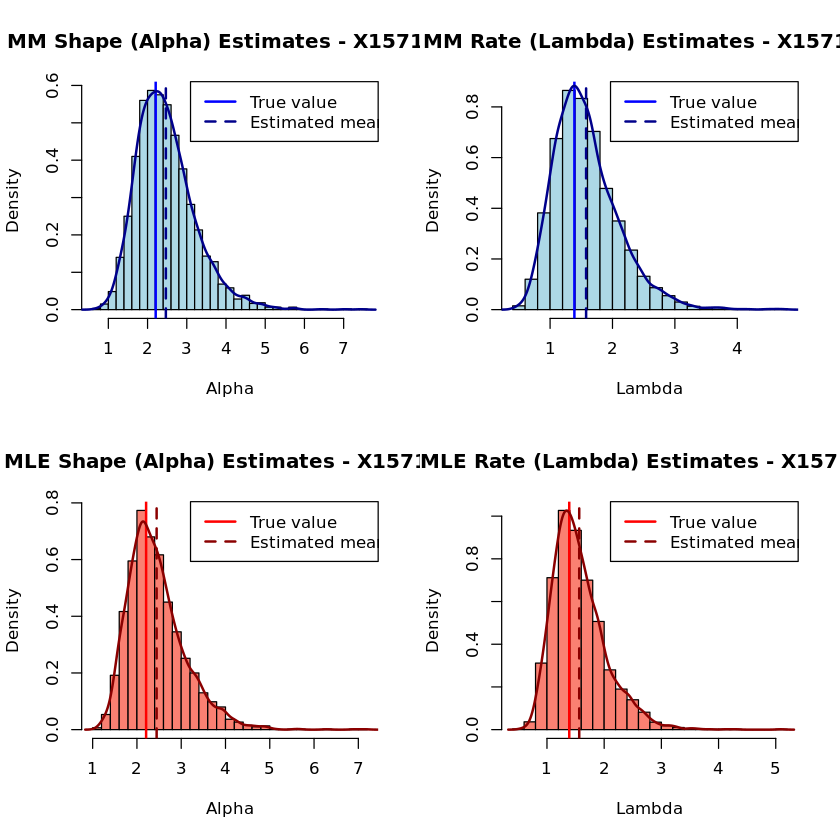


Simulation Statistics for Key: X176147 
True alpha: 1.765195 
True lambda: 0.9572443 

Method of Moments Estimator Statistics:
  Alpha - Mean: 1.980298 SD: 0.6095488 
  Lambda - Mean: 1.095347 SD: 0.3694493 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 1.941884 SD: 0.5157605 
  Lambda - Mean: 1.075304 SD: 0.3278642 

========== Analysis for Key: X188190 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.492828 Lambda: 1.557483 
Maximum Likelihood estimators - Alpha: 2.416041 Lambda: 1.509508 
Simulating 3000 samples with alpha = 2.416041 and lambda = 1.509508 ...


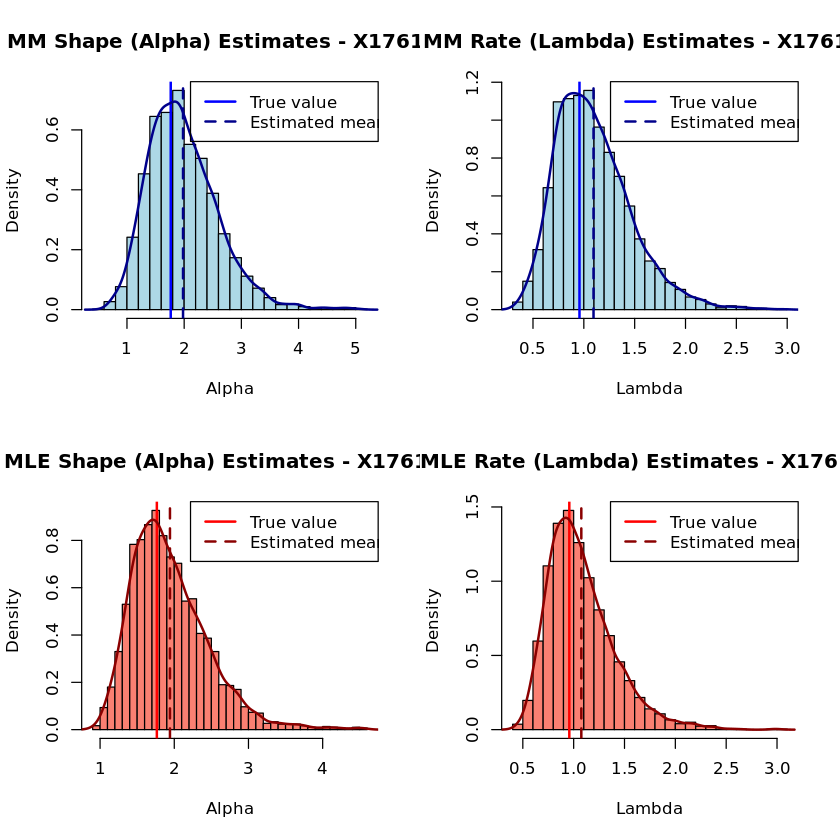


Simulation Statistics for Key: X188190 
True alpha: 2.416041 
True lambda: 1.509508 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.690382 SD: 0.8043592 
  Lambda - Mean: 1.7052 SD: 0.5576881 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 2.677682 SD: 0.7075934 
  Lambda - Mean: 1.697354 SD: 0.5013411 

========== Analysis for Key: X188642 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 3.273327 Lambda: 2.493762 
Maximum Likelihood estimators - Alpha: 3.422813 Lambda: 2.607647 
Simulating 3000 samples with alpha = 3.422813 and lambda = 2.607647 ...


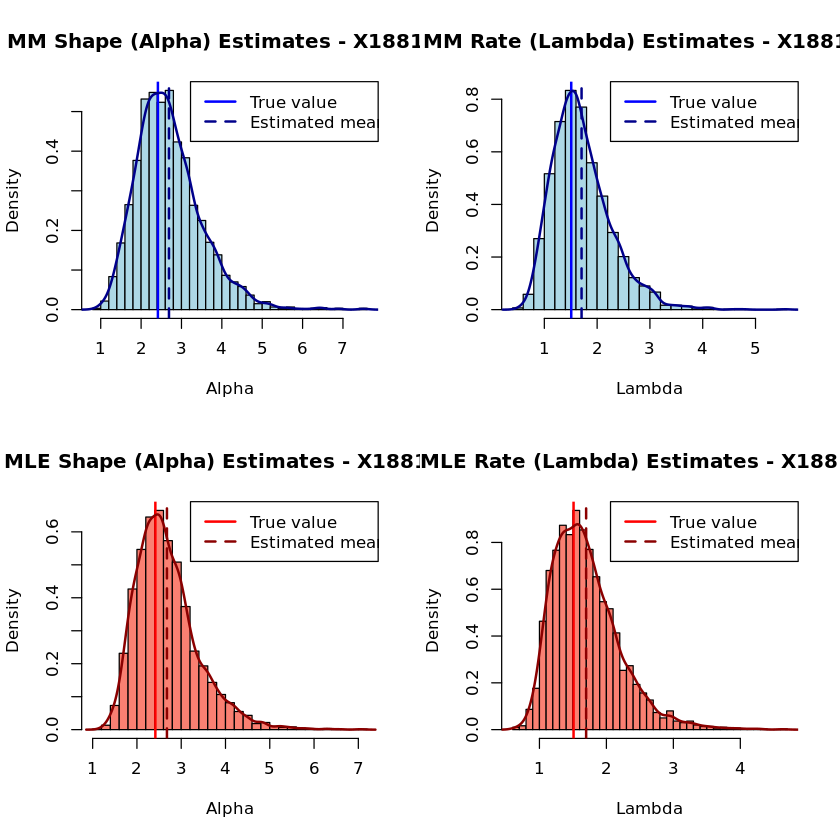


Simulation Statistics for Key: X188642 
True alpha: 3.422813 
True lambda: 2.607647 

Method of Moments Estimator Statistics:
  Alpha - Mean: 3.742539 SD: 1.100948 
  Lambda - Mean: 2.877065 SD: 0.8969015 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 3.765376 SD: 1.010765 
  Lambda - Mean: 2.895216 SD: 0.8355132 

========== Analysis for Key: X189187 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.982228 Lambda: 1.785059 
Maximum Likelihood estimators - Alpha: 2.99627 Lambda: 1.793464 
Simulating 3000 samples with alpha = 2.99627 and lambda = 1.793464 ...


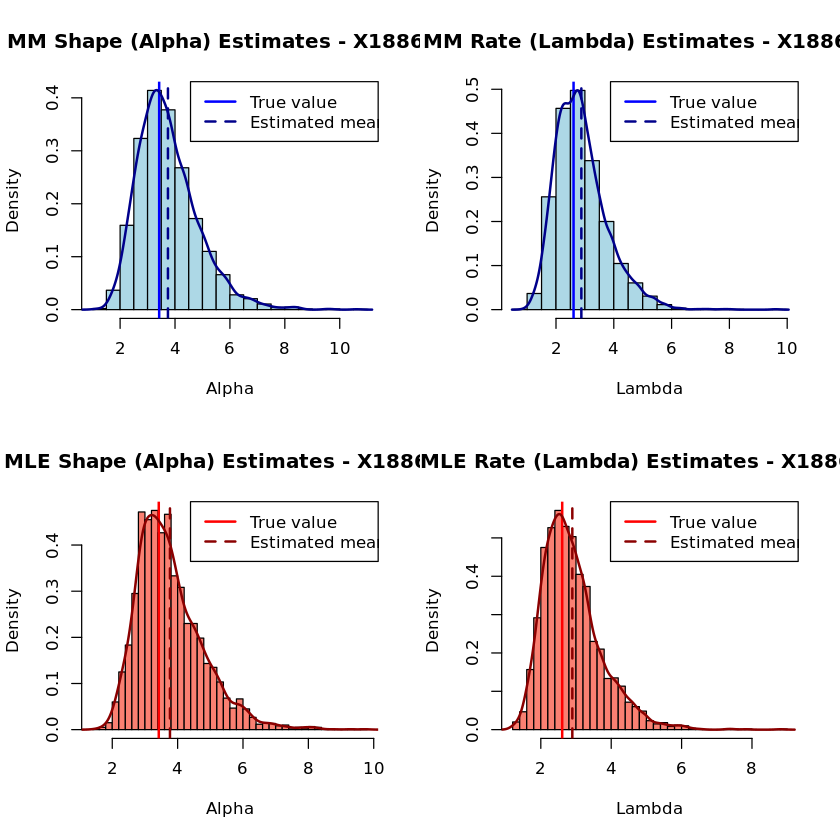


Simulation Statistics for Key: X189187 
True alpha: 2.99627 
True lambda: 1.793464 

Method of Moments Estimator Statistics:
  Alpha - Mean: 3.304886 SD: 0.9915003 
  Lambda - Mean: 1.998386 SD: 0.6409916 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 3.313167 SD: 0.9028717 
  Lambda - Mean: 2.003807 SD: 0.5939817 

========== Analysis for Key: X189365 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 1.731812 Lambda: 0.9518137 
Maximum Likelihood estimators - Alpha: 1.863344 Lambda: 1.024105 
Simulating 3000 samples with alpha = 1.863344 and lambda = 1.024105 ...


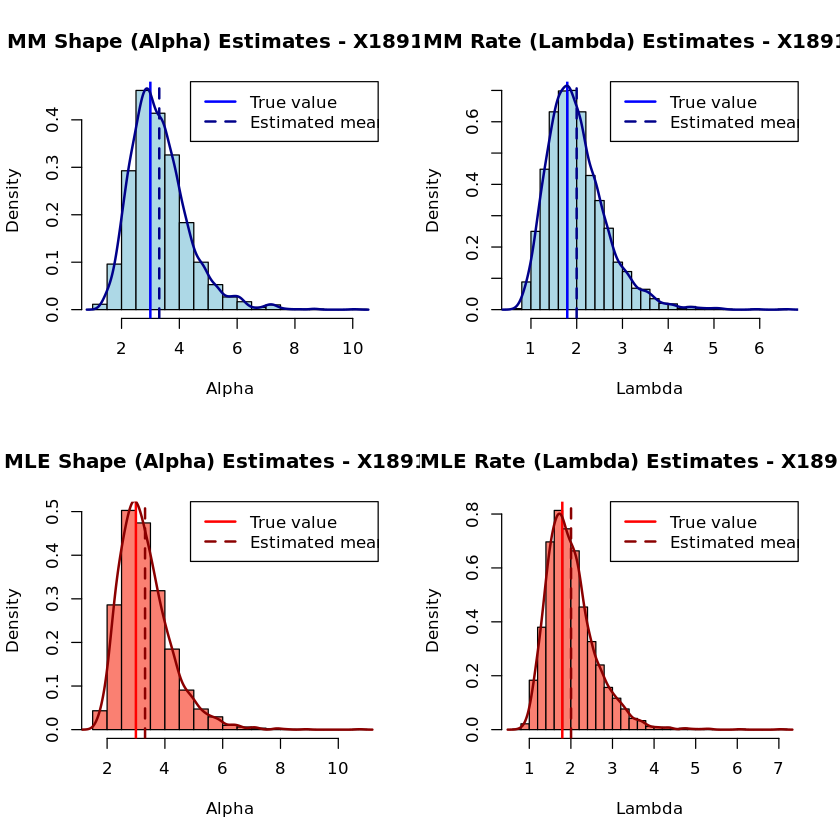


Simulation Statistics for Key: X189365 
True alpha: 1.863344 
True lambda: 1.024105 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.090299 SD: 0.6517091 
  Lambda - Mean: 1.171353 SD: 0.4013651 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 2.051566 SD: 0.5467837 
  Lambda - Mean: 1.150664 SD: 0.3525869 

========== Analysis for Key: X190870 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 3.398531 Lambda: 2.173061 
Maximum Likelihood estimators - Alpha: 3.005851 Lambda: 1.921978 
Simulating 3000 samples with alpha = 3.005851 and lambda = 1.921978 ...


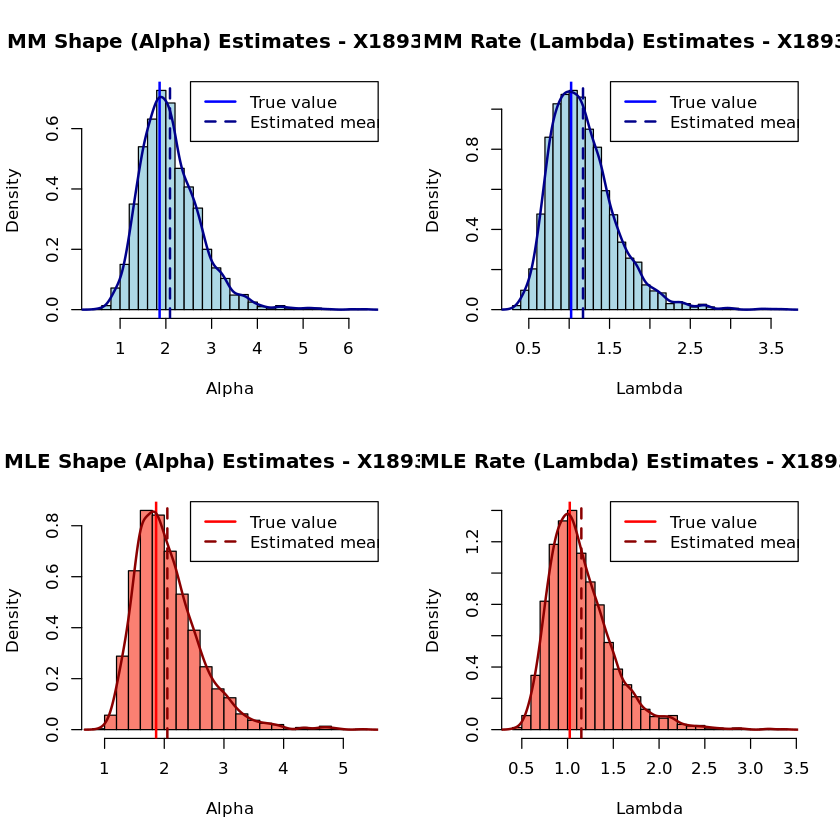


Simulation Statistics for Key: X190870 
True alpha: 3.005851 
True lambda: 1.921978 

Method of Moments Estimator Statistics:
  Alpha - Mean: 3.306473 SD: 0.986342 
  Lambda - Mean: 2.134925 SD: 0.679279 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 3.317541 SD: 0.8978798 
  Lambda - Mean: 2.142523 SD: 0.6280533 

========== Analysis for Key: X192588 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 4.111275 Lambda: 2.495911 
Maximum Likelihood estimators - Alpha: 3.603373 Lambda: 2.187569 
Simulating 3000 samples with alpha = 3.603373 and lambda = 2.187569 ...


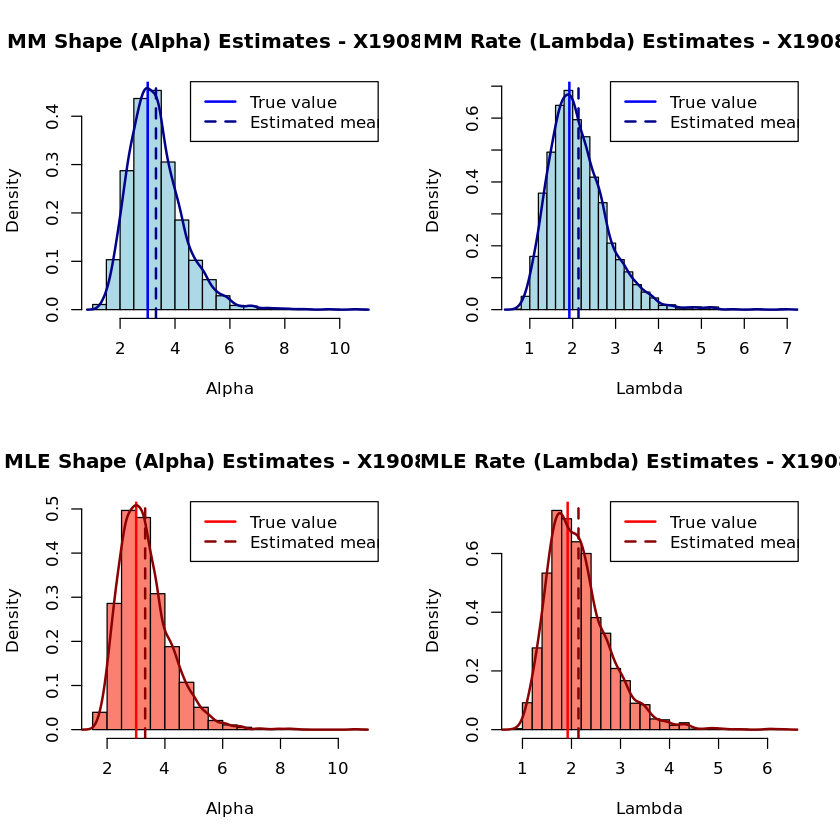


Simulation Statistics for Key: X192588 
True alpha: 3.603373 
True lambda: 2.187569 

Method of Moments Estimator Statistics:
  Alpha - Mean: 3.922533 SD: 1.162712 
  Lambda - Mean: 2.402346 SD: 0.7546947 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 3.952755 SD: 1.080514 
  Lambda - Mean: 2.419984 SD: 0.7051262 

========== Analysis for Key: X194969 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.39782 Lambda: 1.636633 
Maximum Likelihood estimators - Alpha: 1.933306 Lambda: 1.319577 
Simulating 3000 samples with alpha = 1.933306 and lambda = 1.319577 ...


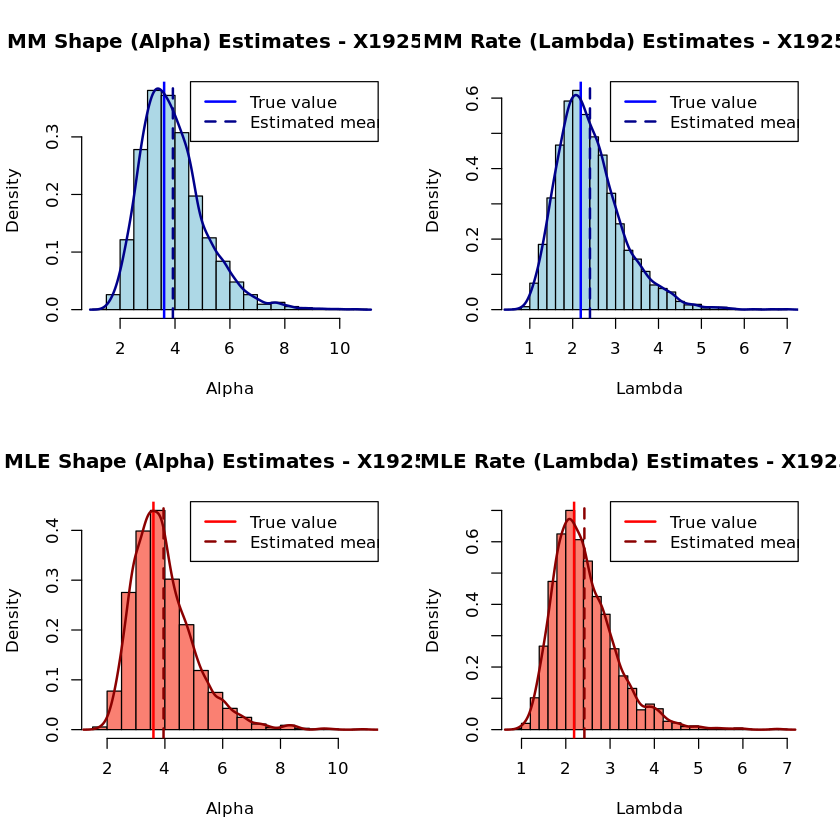


Simulation Statistics for Key: X194969 
True alpha: 1.933306 
True lambda: 1.319577 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.166286 SD: 0.6623558 
  Lambda - Mean: 1.504587 SD: 0.5032432 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 2.132202 SD: 0.5690346 
  Lambda - Mean: 1.481864 SD: 0.4461103 

========== Analysis for Key: X195557 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 1.781659 Lambda: 1.069615 
Maximum Likelihood estimators - Alpha: 1.810556 Lambda: 1.086963 
Simulating 3000 samples with alpha = 1.810556 and lambda = 1.086963 ...


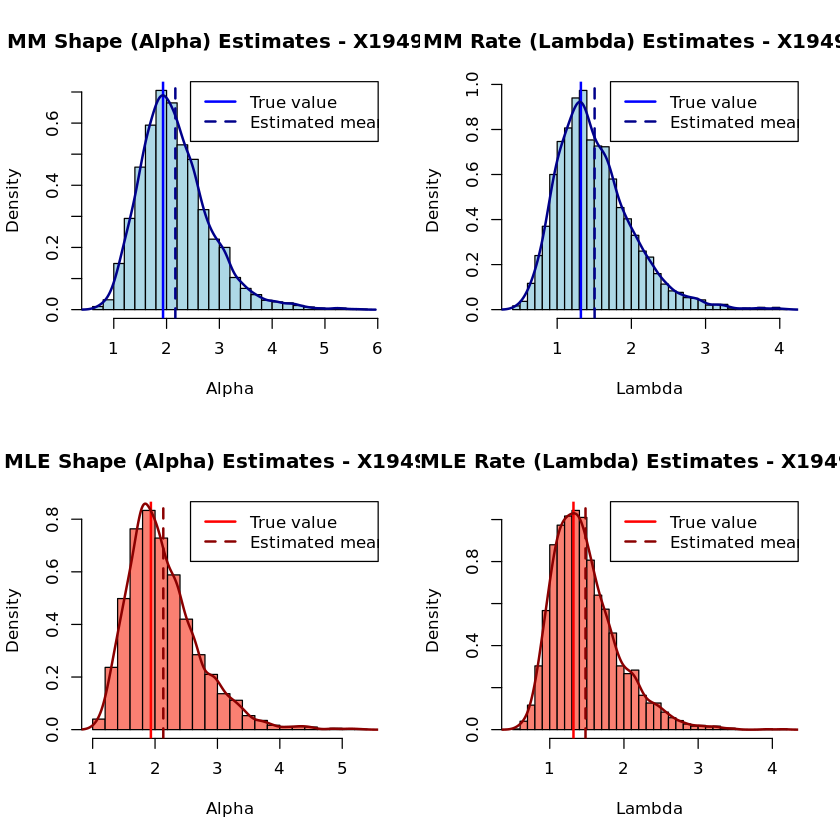


Simulation Statistics for Key: X195557 
True alpha: 1.810556 
True lambda: 1.086963 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.03264 SD: 0.62503 
  Lambda - Mean: 1.245744 SD: 0.4279703 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 1.990015 SD: 0.5234976 
  Lambda - Mean: 1.220743 SD: 0.376467 

========== Analysis for Key: X195770 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 1.539742 Lambda: 0.9294015 
Maximum Likelihood estimators - Alpha: 2.058972 Lambda: 1.242812 
Simulating 3000 samples with alpha = 2.058972 and lambda = 1.242812 ...


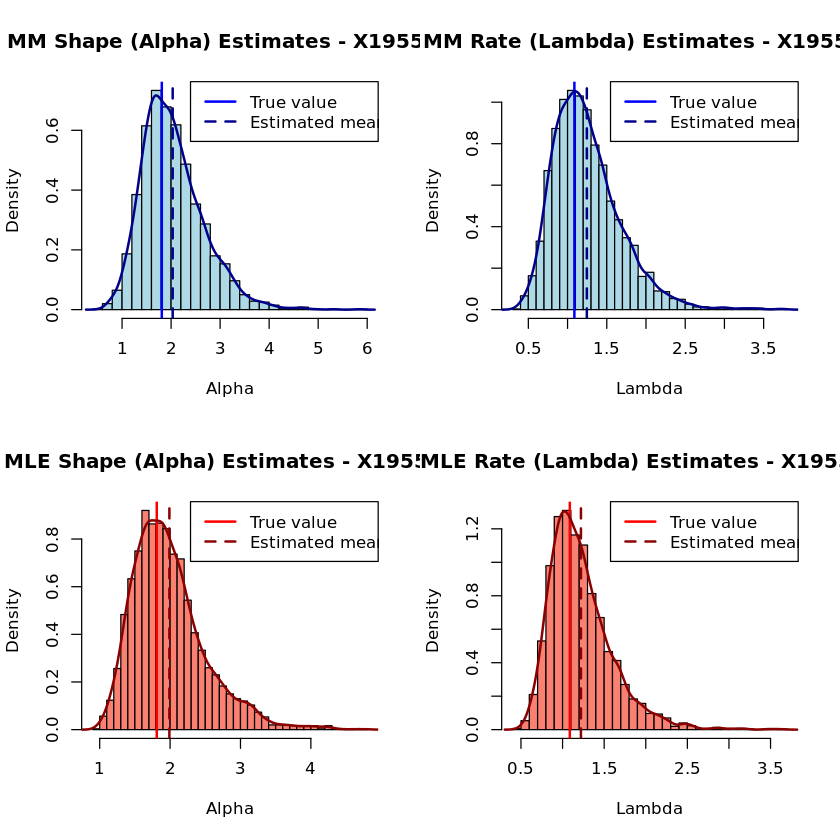


Simulation Statistics for Key: X195770 
True alpha: 2.058972 
True lambda: 1.242812 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.303996 SD: 0.6929568 
  Lambda - Mean: 1.414297 SD: 0.4654363 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 2.2729 SD: 0.6017978 
  Lambda - Mean: 1.396195 SD: 0.419163 

========== Analysis for Key: X196891 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.729007 Lambda: 1.52125 
Maximum Likelihood estimators - Alpha: 2.843513 Lambda: 1.58508 
Simulating 3000 samples with alpha = 2.843513 and lambda = 1.58508 ...


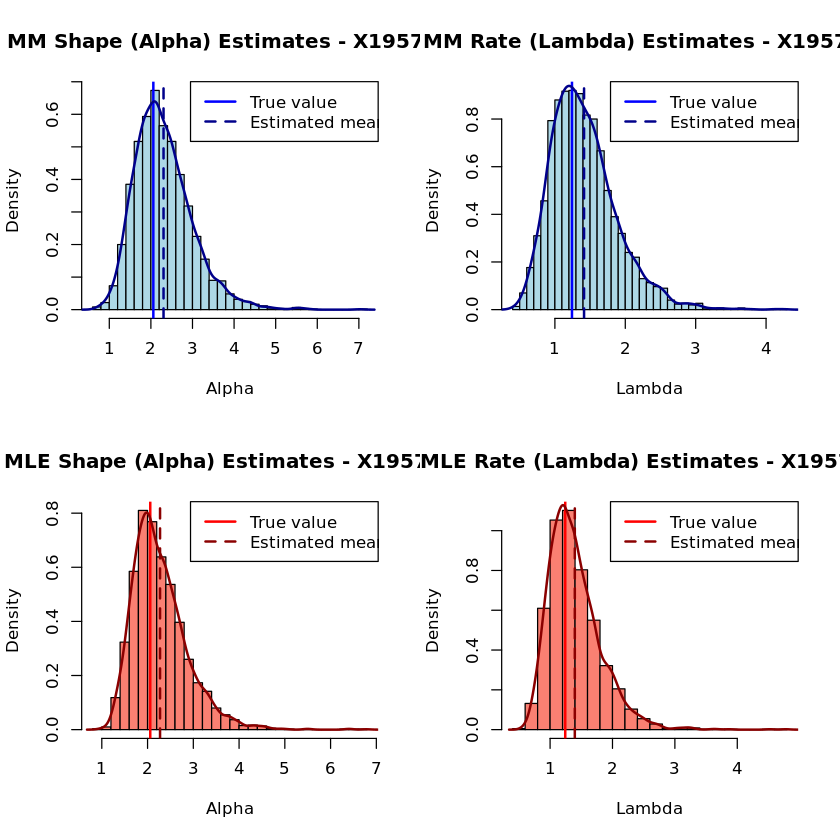


Simulation Statistics for Key: X196891 
True alpha: 2.843513 
True lambda: 1.58508 

Method of Moments Estimator Statistics:
  Alpha - Mean: 3.129483 SD: 0.9115415 
  Lambda - Mean: 1.763149 SD: 0.5561058 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 3.135249 SD: 0.8210041 
  Lambda - Mean: 1.76691 SD: 0.5124925 

========== Analysis for Key: X197086 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.290563 Lambda: 1.238159 
Maximum Likelihood estimators - Alpha: 3.079658 Lambda: 1.664701 
Simulating 3000 samples with alpha = 3.079658 and lambda = 1.664701 ...


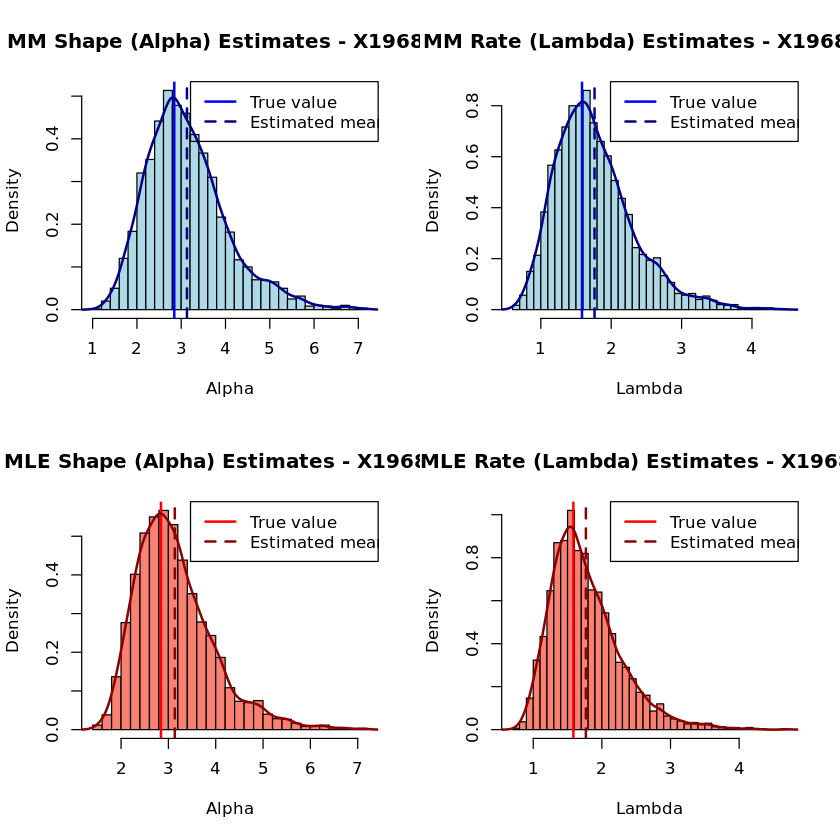


Simulation Statistics for Key: X197086 
True alpha: 3.079658 
True lambda: 1.664701 

Method of Moments Estimator Statistics:
  Alpha - Mean: 3.392956 SD: 1.011453 
  Lambda - Mean: 1.852447 SD: 0.589442 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 3.397809 SD: 0.9195895 
  Lambda - Mean: 1.854949 SD: 0.5424231 

========== Analysis for Key: X197505 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.484459 Lambda: 1.523697 
Maximum Likelihood estimators - Alpha: 2.660343 Lambda: 1.631565 
Simulating 3000 samples with alpha = 2.660343 and lambda = 1.631565 ...


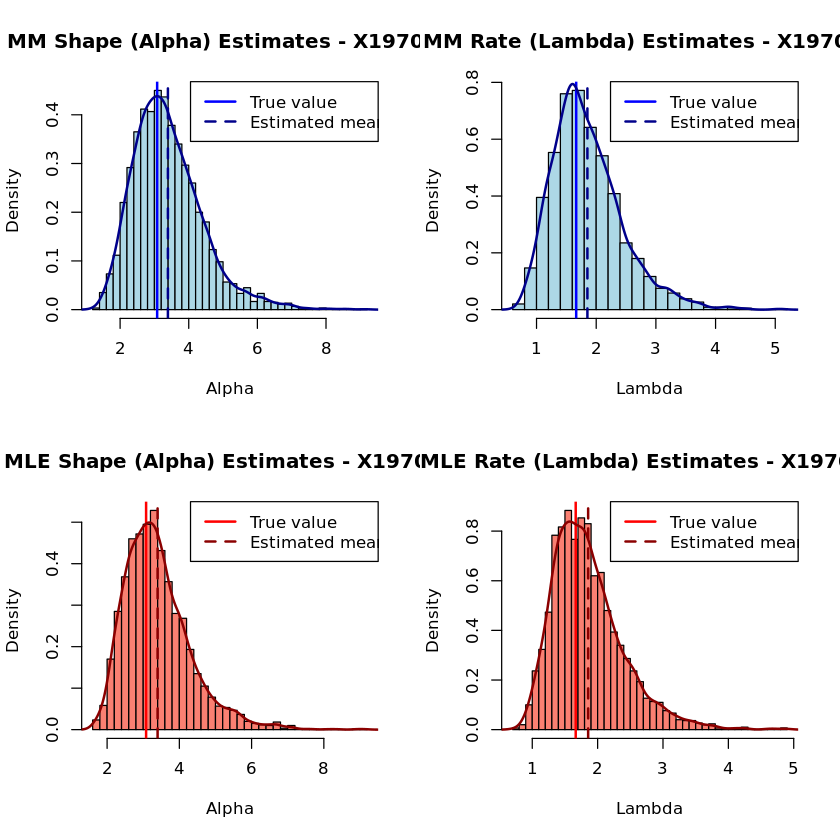


Simulation Statistics for Key: X197505 
True alpha: 2.660343 
True lambda: 1.631565 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.951111 SD: 0.8773933 
  Lambda - Mean: 1.831014 SD: 0.586488 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 2.946128 SD: 0.7838398 
  Lambda - Mean: 1.828555 SD: 0.5346883 

========== Analysis for Key: X197592 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.73442 Lambda: 1.736129 
Maximum Likelihood estimators - Alpha: 2.635402 Lambda: 1.673261 
Simulating 3000 samples with alpha = 2.635402 and lambda = 1.673261 ...


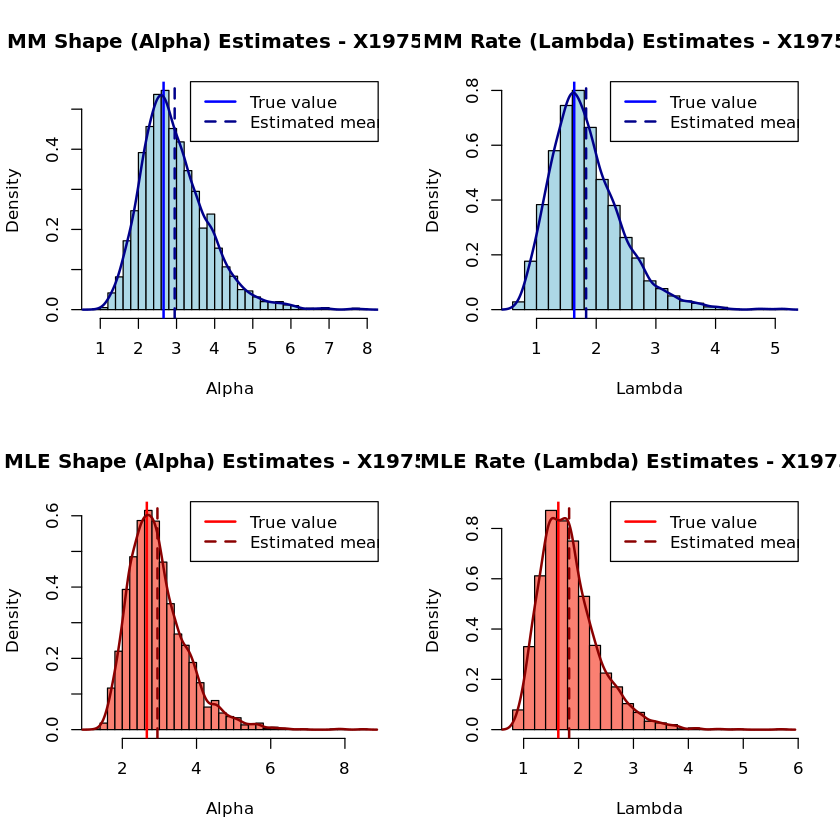


Simulation Statistics for Key: X197592 
True alpha: 2.635402 
True lambda: 1.673261 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.929365 SD: 0.8674377 
  Lambda - Mean: 1.884395 SD: 0.6074056 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 2.921041 SD: 0.7782341 
  Lambda - Mean: 1.879864 SD: 0.5571715 

========== Analysis for Key: X198090 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.176113 Lambda: 1.537466 
Maximum Likelihood estimators - Alpha: 2.890545 Lambda: 2.042225 
Simulating 3000 samples with alpha = 2.890545 and lambda = 2.042225 ...


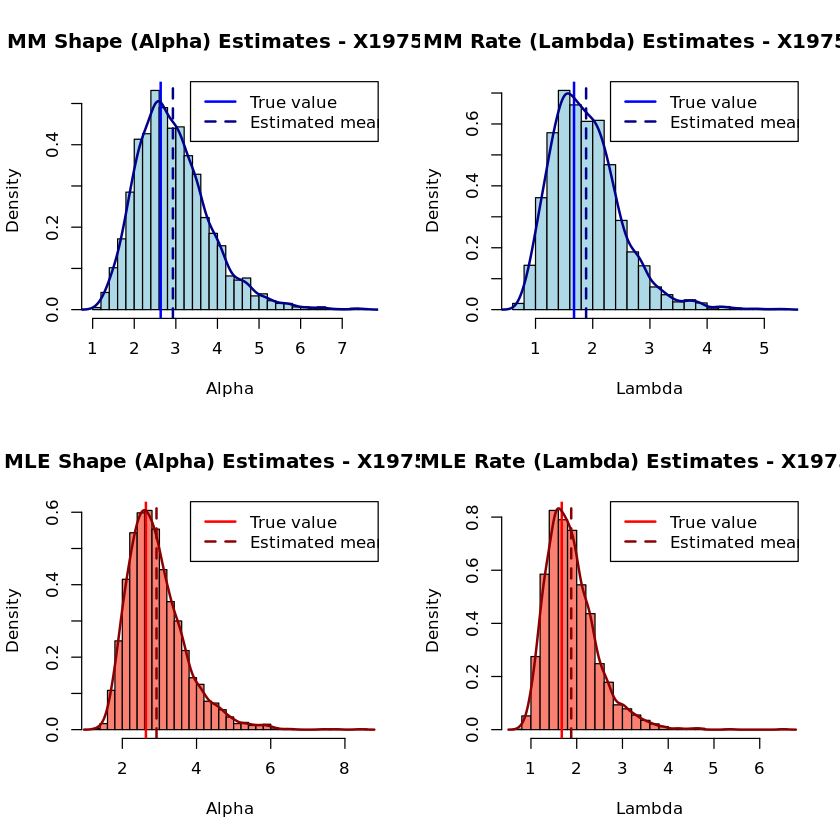


Simulation Statistics for Key: X198090 
True alpha: 2.890545 
True lambda: 2.042225 

Method of Moments Estimator Statistics:
  Alpha - Mean: 3.182654 SD: 0.9502149 
  Lambda - Mean: 2.272544 SD: 0.7307554 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 3.187713 SD: 0.8582294 
  Lambda - Mean: 2.276706 SD: 0.6717161 

========== Analysis for Key: X200035 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.662157 Lambda: 1.751876 
Maximum Likelihood estimators - Alpha: 2.482995 Lambda: 1.633975 
Simulating 3000 samples with alpha = 2.482995 and lambda = 1.633975 ...


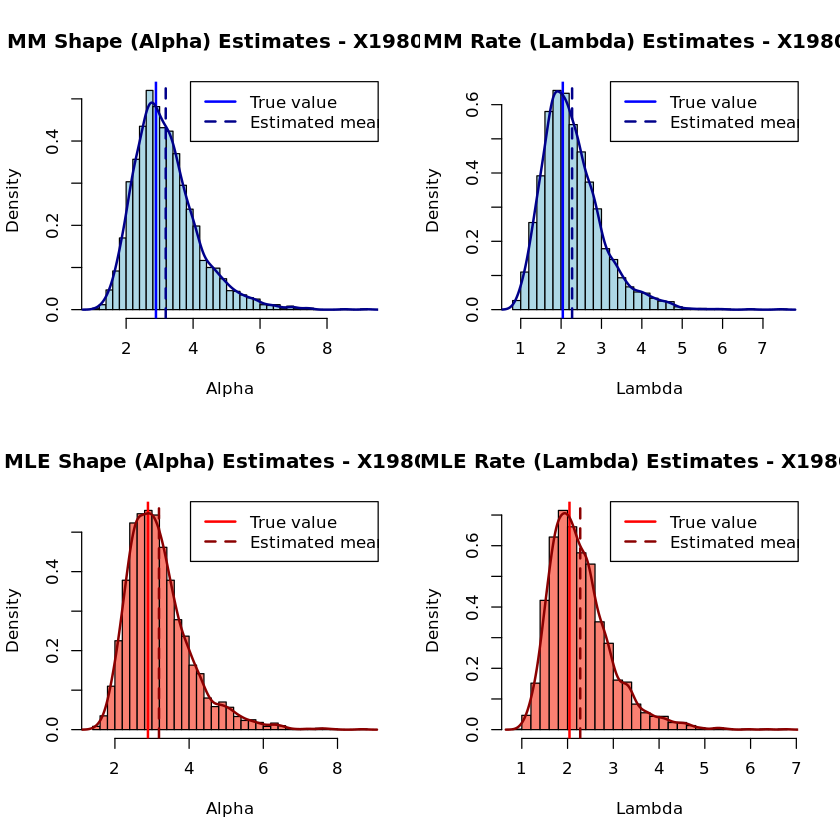


Simulation Statistics for Key: X200035 
True alpha: 2.482995 
True lambda: 1.633975 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.762459 SD: 0.8293569 
  Lambda - Mean: 1.842196 SD: 0.6024374 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 2.751784 SD: 0.7393641 
  Lambda - Mean: 1.835571 SD: 0.5496094 

========== Analysis for Key: X200090 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.524903 Lambda: 1.400776 
Maximum Likelihood estimators - Alpha: 2.737844 Lambda: 1.518911 
Simulating 3000 samples with alpha = 2.737844 and lambda = 1.518911 ...


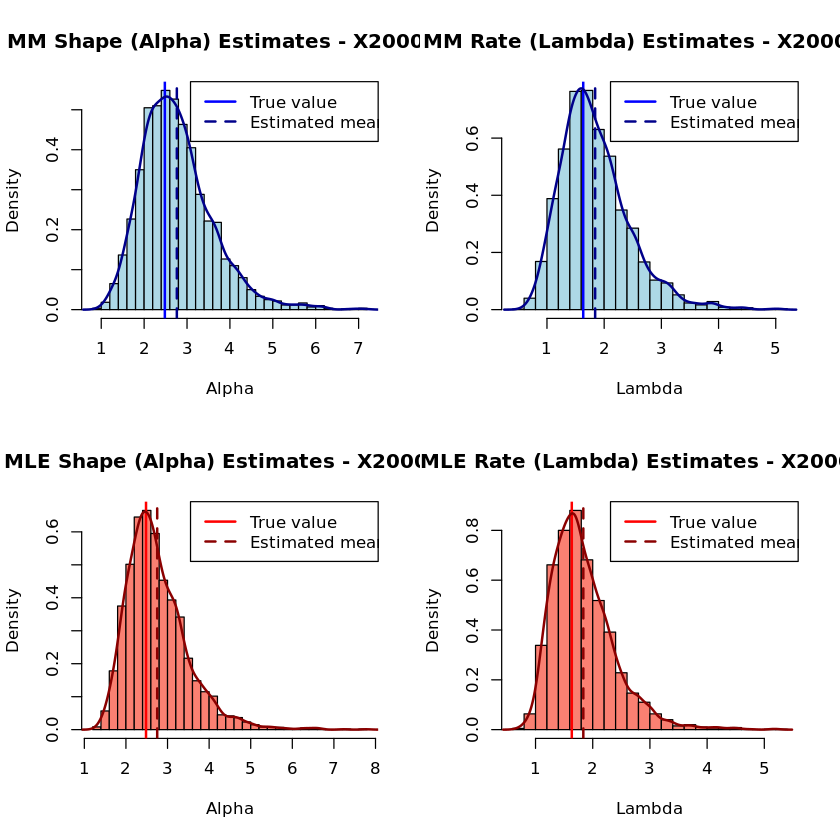


Simulation Statistics for Key: X200090 
True alpha: 2.737844 
True lambda: 1.518911 

Method of Moments Estimator Statistics:
  Alpha - Mean: 3.031767 SD: 0.9011537 
  Lambda - Mean: 1.702661 SD: 0.5475598 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 3.029756 SD: 0.804006 
  Lambda - Mean: 1.702015 SD: 0.4991445 

========== Analysis for Key: X200484 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 1.877811 Lambda: 1.08998 
Maximum Likelihood estimators - Alpha: 2.088359 Lambda: 1.212193 
Simulating 3000 samples with alpha = 2.088359 and lambda = 1.212193 ...


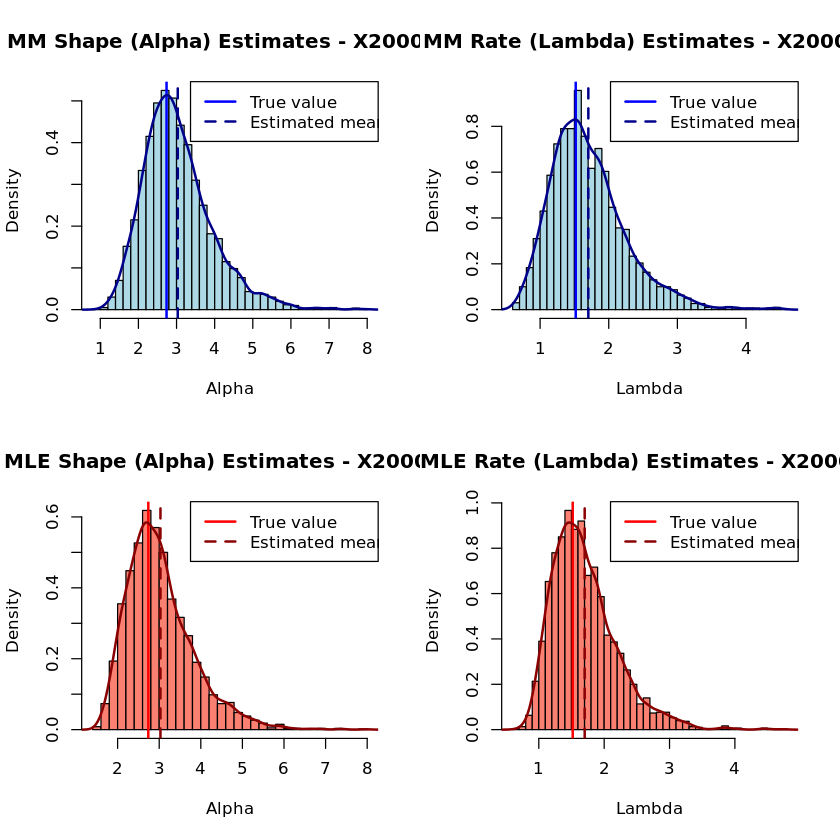


Simulation Statistics for Key: X200484 
True alpha: 2.088359 
True lambda: 1.212193 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.338731 SD: 0.7107887 
  Lambda - Mean: 1.380475 SD: 0.4607833 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 2.309683 SD: 0.6169513 
  Lambda - Mean: 1.363361 SD: 0.4091803 

========== Analysis for Key: X202999 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 1.707329 Lambda: 1.317903 
Maximum Likelihood estimators - Alpha: 1.544238 Lambda: 1.192012 
Simulating 3000 samples with alpha = 1.544238 and lambda = 1.192012 ...


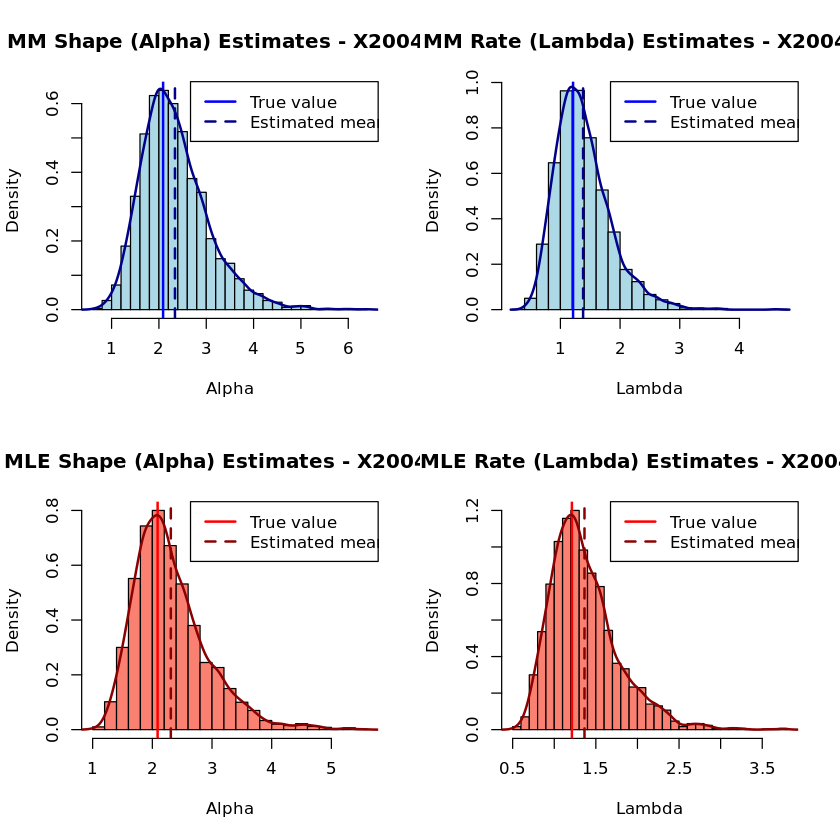


Simulation Statistics for Key: X202999 
True alpha: 1.544238 
True lambda: 1.192012 

Method of Moments Estimator Statistics:
  Alpha - Mean: 1.741555 SD: 0.534211 
  Lambda - Mean: 1.37654 SD: 0.473708 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 1.686805 SD: 0.4391969 
  Lambda - Mean: 1.332813 SD: 0.4035658 

========== Analysis for Key: X203026 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.694699 Lambda: 1.646913 
Maximum Likelihood estimators - Alpha: 2.607478 Lambda: 1.593606 
Simulating 3000 samples with alpha = 2.607478 and lambda = 1.593606 ...


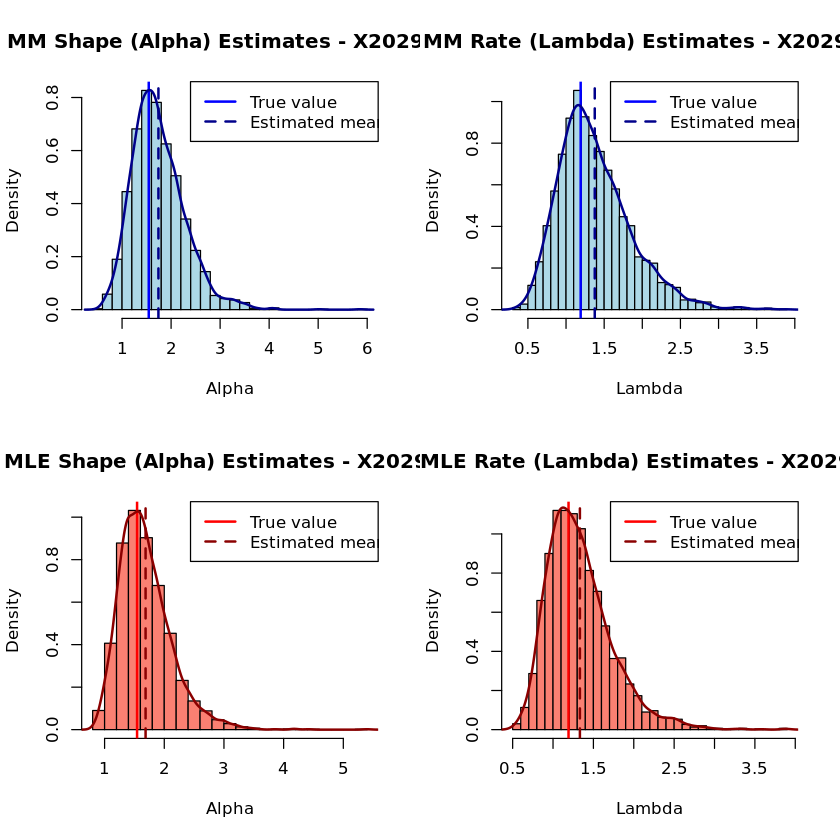


Simulation Statistics for Key: X203026 
True alpha: 2.607478 
True lambda: 1.593606 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.892497 SD: 0.8617598 
  Lambda - Mean: 1.789018 SD: 0.5752784 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 2.891177 SD: 0.7724786 
  Lambda - Mean: 1.788927 SD: 0.5269349 

========== Analysis for Key: X205863 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.348432 Lambda: 1.523363 
Maximum Likelihood estimators - Alpha: 2.108472 Lambda: 1.367709 
Simulating 3000 samples with alpha = 2.108472 and lambda = 1.367709 ...


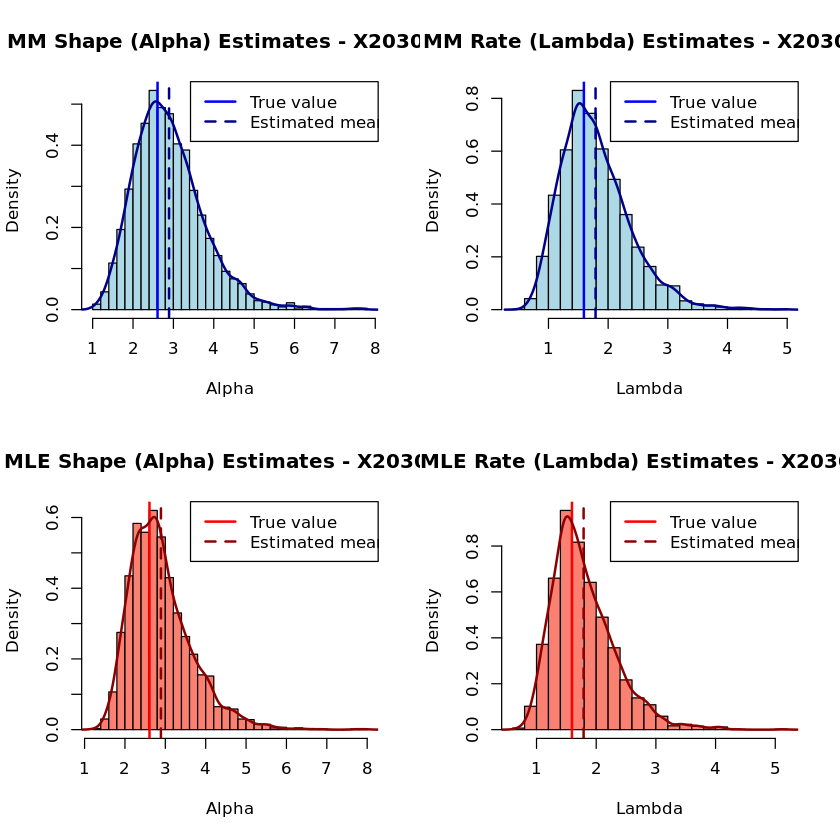


Simulation Statistics for Key: X205863 
True alpha: 2.108472 
True lambda: 1.367709 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.360449 SD: 0.7126355 
  Lambda - Mean: 1.557516 SD: 0.5160603 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 2.331501 SD: 0.616151 
  Lambda - Mean: 1.539195 SD: 0.4626689 

========== Analysis for Key: X207641 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 1.73993 Lambda: 0.953345 
Maximum Likelihood estimators - Alpha: 2.030798 Lambda: 1.112718 
Simulating 3000 samples with alpha = 2.030798 and lambda = 1.112718 ...


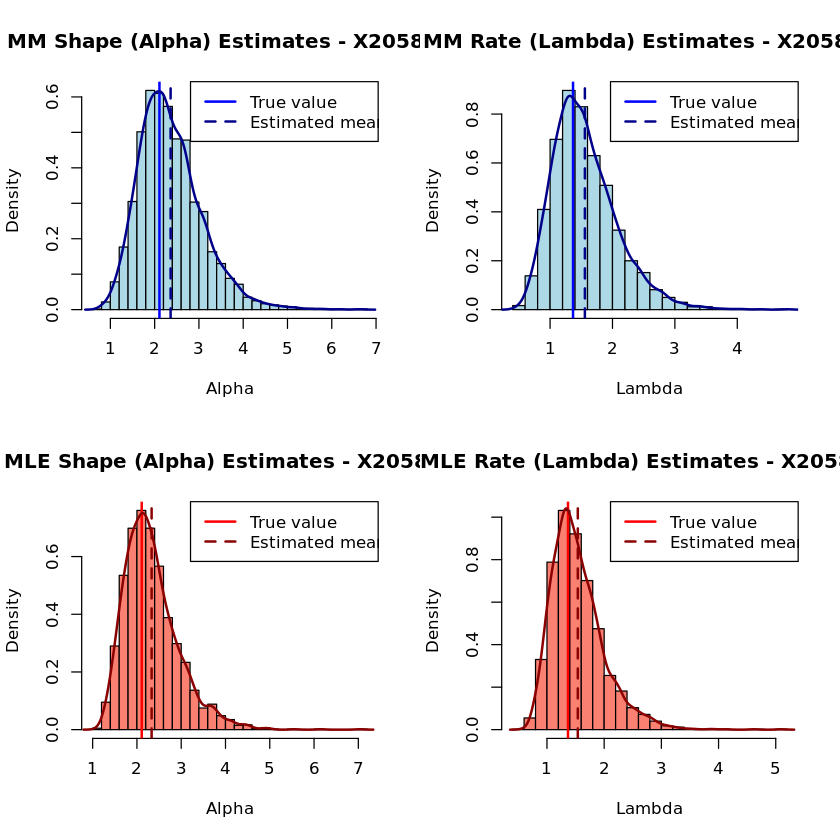


Simulation Statistics for Key: X207641 
True alpha: 2.030798 
True lambda: 1.112718 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.278541 SD: 0.6851098 
  Lambda - Mean: 1.27136 SD: 0.4226857 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 2.244999 SD: 0.5949169 
  Lambda - Mean: 1.253248 SD: 0.3799641 

========== Analysis for Key: X207736 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 3.206906 Lambda: 1.890671 
Maximum Likelihood estimators - Alpha: 3.567998 Lambda: 2.103558 
Simulating 3000 samples with alpha = 3.567998 and lambda = 2.103558 ...


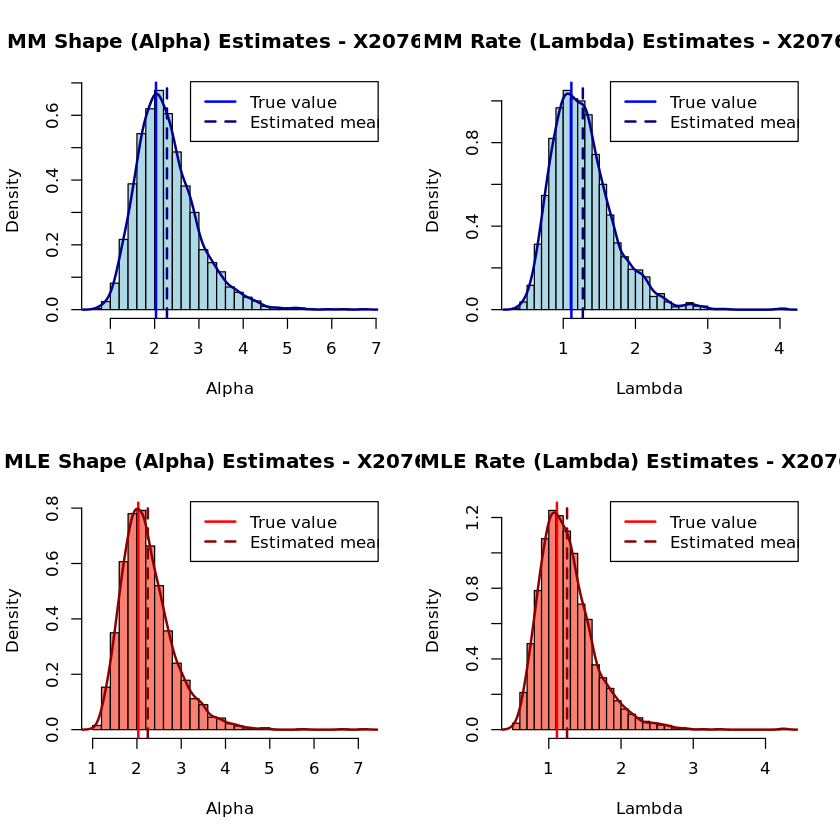


Simulation Statistics for Key: X207736 
True alpha: 3.567998 
True lambda: 2.103558 

Method of Moments Estimator Statistics:
  Alpha - Mean: 3.894095 SD: 1.16854 
  Lambda - Mean: 2.315615 SD: 0.7319229 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 3.920785 SD: 1.079424 
  Lambda - Mean: 2.331688 SD: 0.6869659 

========== Analysis for Key: X208115 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 2.791925 Lambda: 1.717114 
Maximum Likelihood estimators - Alpha: 2.346885 Lambda: 1.443401 
Simulating 3000 samples with alpha = 2.346885 and lambda = 1.443401 ...


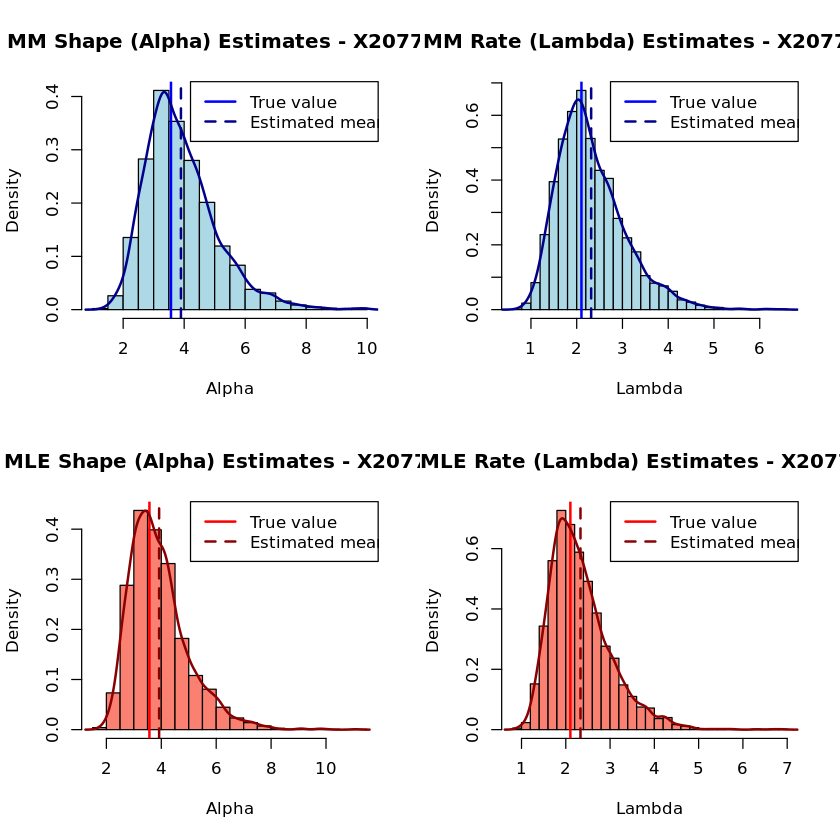


Simulation Statistics for Key: X208115 
True alpha: 2.346885 
True lambda: 1.443401 

Method of Moments Estimator Statistics:
  Alpha - Mean: 2.618401 SD: 0.7933303 
  Lambda - Mean: 1.634769 SD: 0.5413084 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 2.602692 SD: 0.7063274 
  Lambda - Mean: 1.625315 SD: 0.4926565 

========== Analysis for Key: X208331 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 3.353211 Lambda: 2.253213 
Maximum Likelihood estimators - Alpha: 3.318577 Lambda: 2.22994 
Simulating 3000 samples with alpha = 3.318577 and lambda = 2.22994 ...


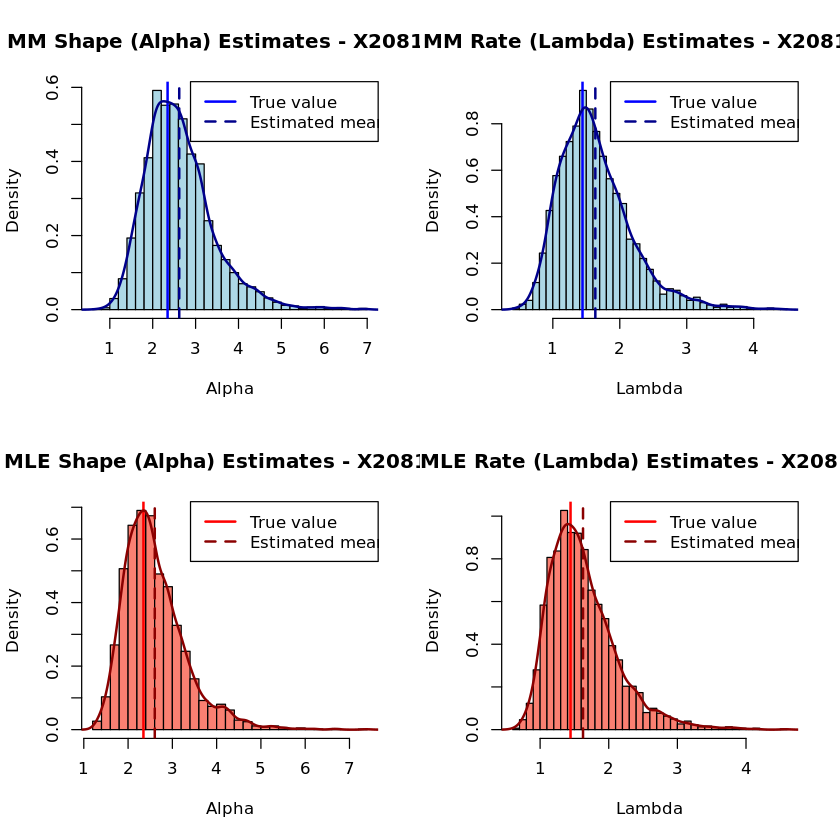


Simulation Statistics for Key: X208331 
True alpha: 3.318577 
True lambda: 2.22994 

Method of Moments Estimator Statistics:
  Alpha - Mean: 3.64556 SD: 1.097403 
  Lambda - Mean: 2.472705 SD: 0.7899691 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 3.659723 SD: 1.004623 
  Lambda - Mean: 2.482846 SD: 0.7350462 

========== Analysis for Key: X208450 ==========
Sample size: 35 
Method of Moments estimators - Alpha: 3.751823 Lambda: 2.329785 
Maximum Likelihood estimators - Alpha: 3.814603 Lambda: 2.36877 
Simulating 3000 samples with alpha = 3.814603 and lambda = 2.36877 ...


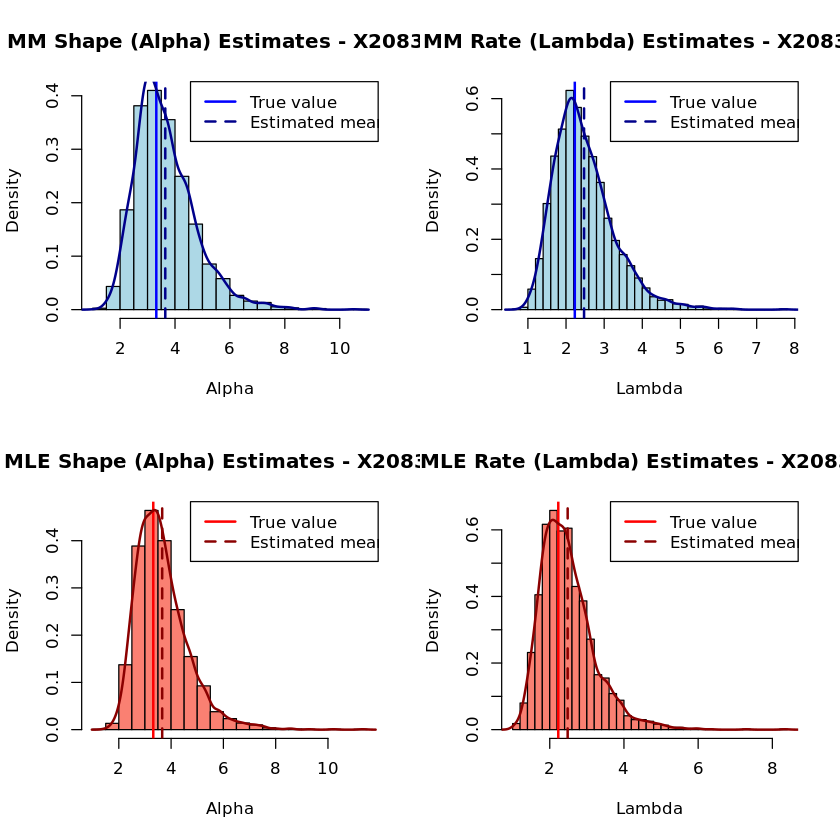


Simulation Statistics for Key: X208450 
True alpha: 3.814603 
True lambda: 2.36877 

Method of Moments Estimator Statistics:
  Alpha - Mean: 4.133846 SD: 1.196731 
  Lambda - Mean: 2.588942 SD: 0.7935604 

Maximum Likelihood Estimator Statistics:
  Alpha - Mean: 4.174272 SD: 1.118464 
  Lambda - Mean: 2.614432 SD: 0.7497777 


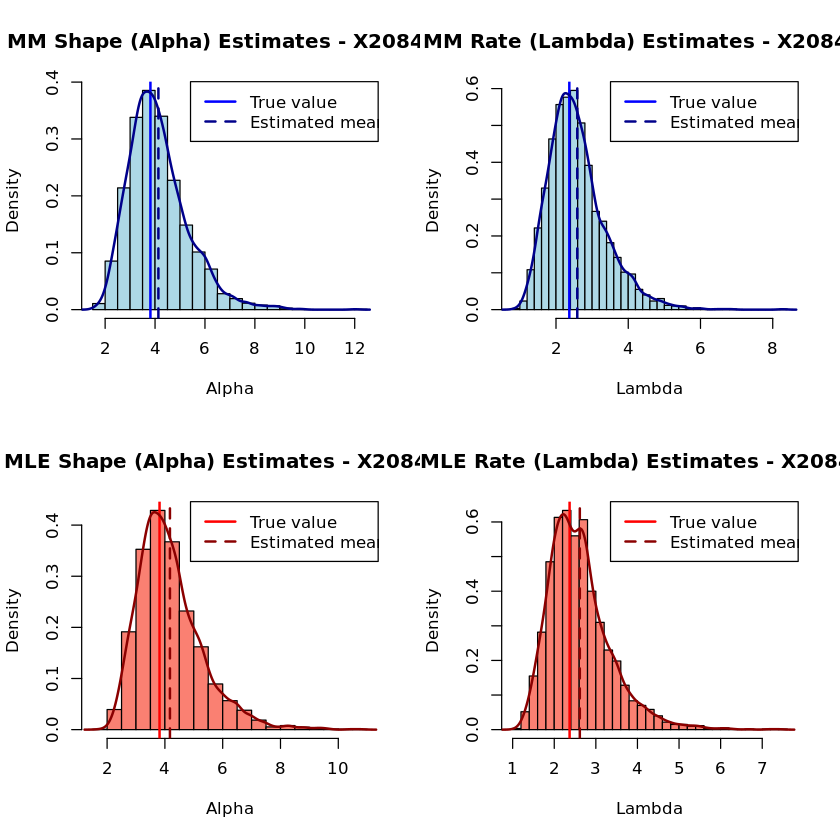

In [12]:
# Gamma Distribution Parameter Estimation - Modified for Simulation Histograms Only

# Try to read the data file
tryCatch({
  data <- read.table("tarea22.dat", header = TRUE)
  cat("Successfully read the data file.\n")
  print(head(data))
}, error = function(e) {
  cat("Could not read the file. Creating synthetic data for demonstration.\n")
  set.seed(123)
  
  # Create synthetic data for 3 different gamma distributions
  keys <- c("key1", "key2", "key3")
  data <- data.frame(
    key = rep(keys, each = 30),
    value = c(
      rgamma(30, shape = 2, rate = 0.5),  # For key1
      rgamma(30, shape = 5, rate = 1),    # For key2
      rgamma(30, shape = 1, rate = 0.2)   # For key3
    )
  )
  
  cat("Created synthetic data with the following parameters:\n")
  cat("Key1: shape = 2, rate = 0.5\n")
  cat("Key2: shape = 5, rate = 1\n")
  cat("Key3: shape = 1, rate = 0.2\n")
})

# Function to extract data for each key
get_key_data <- function(data, key) {
  if ("key" %in% names(data)) {
    # Data is in long format
    return(data$value[data$key == key])
  } else if (key %in% names(data)) {
    # Data is in wide format
    return(data[[key]])
  } else {
    # Try to find the key in the first column
    if (key %in% data[,1]) {
      row_index <- which(data[,1] == key)
      return(as.numeric(data[row_index, -1]))
    } else {
      return(NULL)
    }
  }
}

# Function to calculate method of moments estimators for gamma distribution
gamma_method_of_moments <- function(x) {
  mean_x <- mean(x)
  var_x <- var(x)
  
  # For gamma distribution:
  # mean = alpha/lambda
  # variance = alpha/lambda^2
  
  # Solving for alpha and lambda:
  # lambda = mean/variance
  # alpha = mean^2/variance
  
  lambda_mm <- mean_x / var_x
  alpha_mm <- mean_x^2 / var_x
  
  return(list(alpha = alpha_mm, lambda = lambda_mm))
}

# Gamma log-likelihood function
gamma_log_likelihood <- function(params, x) {
  alpha <- params[1]
  lambda <- params[2]
  
  if (alpha <= 0 || lambda <= 0) {
    return(-Inf)  # Invalid parameters
  }
  
  # Log-likelihood for gamma distribution
  n <- length(x)
  log_lik <- n * alpha * log(lambda) - n * lgamma(alpha) + 
             (alpha - 1) * sum(log(x)) - lambda * sum(x)
  
  return(log_lik)
}

# Simulation function for part c
simulate_and_analyze <- function(true_alpha, true_lambda, N = 3000) {
  cat("Simulating", N, "samples with alpha =", true_alpha, "and lambda =", true_lambda, "...\n")
  
  # Simulate samples from gamma distribution
  set.seed(456)
  simulated_samples <- lapply(1:N, function(i) {
    sample <- rgamma(30, shape = true_alpha, rate = true_lambda)
    mm_est <- gamma_method_of_moments(sample)
    
    # Use optim directly for MLE (faster for many simulations)
    mle_opt <- optim(
      par = c(mm_est$alpha, mm_est$lambda),
      fn = function(params) -gamma_log_likelihood(params, sample),
      method = "L-BFGS-B",
      lower = c(1e-8, 1e-8)
    )
    
    return(list(
      mm = mm_est,
      mle = list(alpha = mle_opt$par[1], lambda = mle_opt$par[2])
    ))
  })
  
  # Extract estimates
  mm_alphas <- sapply(simulated_samples, function(x) x$mm$alpha)
  mm_lambdas <- sapply(simulated_samples, function(x) x$mm$lambda)
  mle_alphas <- sapply(simulated_samples, function(x) x$mle$alpha)
  mle_lambdas <- sapply(simulated_samples, function(x) x$mle$lambda)
  
  # Compute statistics
  results <- list(
    mm_alpha_mean = mean(mm_alphas),
    mm_alpha_sd = sd(mm_alphas),
    mm_lambda_mean = mean(mm_lambdas),
    mm_lambda_sd = sd(mm_lambdas),
    mle_alpha_mean = mean(mle_alphas),
    mle_alpha_sd = sd(mle_alphas),
    mle_lambda_mean = mean(mle_lambdas),
    mle_lambda_sd = sd(mle_lambdas),
    mm_alphas = mm_alphas,
    mm_lambdas = mm_lambdas,
    mle_alphas = mle_alphas,
    mle_lambdas = mle_lambdas,
    true_alpha = true_alpha,
    true_lambda = true_lambda
  )
  
  return(results)
}

# Function to create histograms for simulation results
create_simulation_histograms <- function(sim_results, key) {
  # Set up plotting area with 2x2 layout
  par(mfrow = c(2, 2))
  
  # Extract data from simulation results
  mm_alphas <- sim_results$mm_alphas
  mm_lambdas <- sim_results$mm_lambdas
  mle_alphas <- sim_results$mle_alphas
  mle_lambdas <- sim_results$mle_lambdas
  
  true_alpha <- sim_results$true_alpha
  true_lambda <- sim_results$true_lambda
  
  # Histogram of Method of Moments alpha estimates
  hist(mm_alphas, breaks = 30, 
       main = paste("MM Shape (Alpha) Estimates -", key),
       xlab = "Alpha", col = "lightblue",
       probability = TRUE)
  # Add vertical lines for true value and mean
  abline(v = true_alpha, col = "blue", lwd = 2)
  abline(v = sim_results$mm_alpha_mean, col = "darkblue", lty = 2, lwd = 2)
  # Add a density curve
  lines(density(mm_alphas), col = "darkblue", lwd = 2)
  # Add legend
  legend("topright", legend = c("True value", "Estimated mean"), 
         col = c("blue", "darkblue"), lwd = 2, lty = c(1, 2))
  
  # Histogram of Method of Moments lambda estimates
  hist(mm_lambdas, breaks = 30, 
       main = paste("MM Rate (Lambda) Estimates -", key),
       xlab = "Lambda", col = "lightblue",
       probability = TRUE)
  abline(v = true_lambda, col = "blue", lwd = 2)
  abline(v = sim_results$mm_lambda_mean, col = "darkblue", lty = 2, lwd = 2)
  lines(density(mm_lambdas), col = "darkblue", lwd = 2)
  legend("topright", legend = c("True value", "Estimated mean"), 
         col = c("blue", "darkblue"), lwd = 2, lty = c(1, 2))
  
  # Histogram of MLE alpha estimates
  hist(mle_alphas, breaks = 30, 
       main = paste("MLE Shape (Alpha) Estimates -", key),
       xlab = "Alpha", col = "salmon",
       probability = TRUE)
  abline(v = true_alpha, col = "red", lwd = 2)
  abline(v = sim_results$mle_alpha_mean, col = "darkred", lty = 2, lwd = 2)
  lines(density(mle_alphas), col = "darkred", lwd = 2)
  legend("topright", legend = c("True value", "Estimated mean"), 
         col = c("red", "darkred"), lwd = 2, lty = c(1, 2))
  
  # Histogram of MLE lambda estimates
  hist(mle_lambdas, breaks = 30, 
       main = paste("MLE Rate (Lambda) Estimates -", key),
       xlab = "Lambda", col = "salmon",
       probability = TRUE)
  abline(v = true_lambda, col = "red", lwd = 2)
  abline(v = sim_results$mle_lambda_mean, col = "darkred", lty = 2, lwd = 2)
  lines(density(mle_lambdas), col = "darkred", lwd = 2)
  legend("topright", legend = c("True value", "Estimated mean"), 
         col = c("red", "darkred"), lwd = 2, lty = c(1, 2))
  
  # Print summary statistics
  cat("\nSimulation Statistics for Key:", key, "\n")
  cat("True alpha:", true_alpha, "\n")
  cat("True lambda:", true_lambda, "\n")
  cat("\nMethod of Moments Estimator Statistics:\n")
  cat("  Alpha - Mean:", sim_results$mm_alpha_mean, "SD:", sim_results$mm_alpha_sd, "\n")
  cat("  Lambda - Mean:", sim_results$mm_lambda_mean, "SD:", sim_results$mm_lambda_sd, "\n")
  cat("\nMaximum Likelihood Estimator Statistics:\n")
  cat("  Alpha - Mean:", sim_results$mle_alpha_mean, "SD:", sim_results$mle_alpha_sd, "\n")
  cat("  Lambda - Mean:", sim_results$mle_lambda_mean, "SD:", sim_results$mle_lambda_sd, "\n")
  
  # Return to single plot
  par(mfrow = c(1, 1))
}

# Maximum Likelihood Estimation for a single key
gamma_mle_single <- function(x, init_params) {
  # Use optim for MLE
  opt_result <- optim(
    par = c(init_params$alpha, init_params$lambda),
    fn = function(params) -gamma_log_likelihood(params, x),
    method = "L-BFGS-B",
    lower = c(1e-8, 1e-8)
  )
  
  return(list(
    alpha = opt_result$par[1],
    lambda = opt_result$par[2],
    log_likelihood = -opt_result$value
  ))
}

# Identify the keys in the data
if ("key" %in% names(data)) {
  keys <- unique(data$key)
} else {
  # Try to find keys in column names
  keys <- names(data)[names(data) != ""]
  if (length(keys) == 0) {
    # If no column names, try to find keys in the first column
    keys <- unique(data[,1])
  }
}

# Process each key - but only do MM and MLE estimation, then directly to simulation histograms
for (key in keys) {
  cat("\n========== Analysis for Key:", key, "==========\n")
  
  # Get data for this key
  key_data <- get_key_data(data, key)
  
  if (is.null(key_data) || length(key_data) == 0) {
    cat("No data found for key:", key, "\n")
    next
  }
  
  # Print summary statistics
  cat("Sample size:", length(key_data), "\n")
  
  # Method of Moments estimators
  mm_estimators <- gamma_method_of_moments(key_data)
  cat("Method of Moments estimators - Alpha:", mm_estimators$alpha, "Lambda:", mm_estimators$lambda, "\n")
  
  # Maximum Likelihood Estimation
  mle_estimators <- gamma_mle_single(key_data, mm_estimators)
  cat("Maximum Likelihood estimators - Alpha:", mle_estimators$alpha, "Lambda:", mle_estimators$lambda, "\n")
  
  # Run simulation and create histograms using MLE as true parameters
  sim_results <- simulate_and_analyze(mle_estimators$alpha, mle_estimators$lambda, N = 3000)
  
  # Create and display the histograms
  create_simulation_histograms(sim_results, key)
}

Simulando 3000 muestras con alpha = 1.8106 y lambda = 1.087 ...

Estadísticas de simulación para clave: 195557 
Alpha verdadero: 1.8106 
Lambda verdadero: 1.087 

Estadísticas del Estimador por Método de Momentos (EMM):
  Alpha - Media: 2.029454 DE: 0.6236256 
  Lambda - Media: 1.242936 DE: 0.4226391 

Estadísticas del Estimador por Máxima Verosimilitud (EMV):
  Alpha - Media: 1.990274 DE: 0.5270974 
  Lambda - Media: 1.22026 DE: 0.3745125 
Simulando 3000 muestras con alpha = 2.8435 y lambda = 1.5851 ...


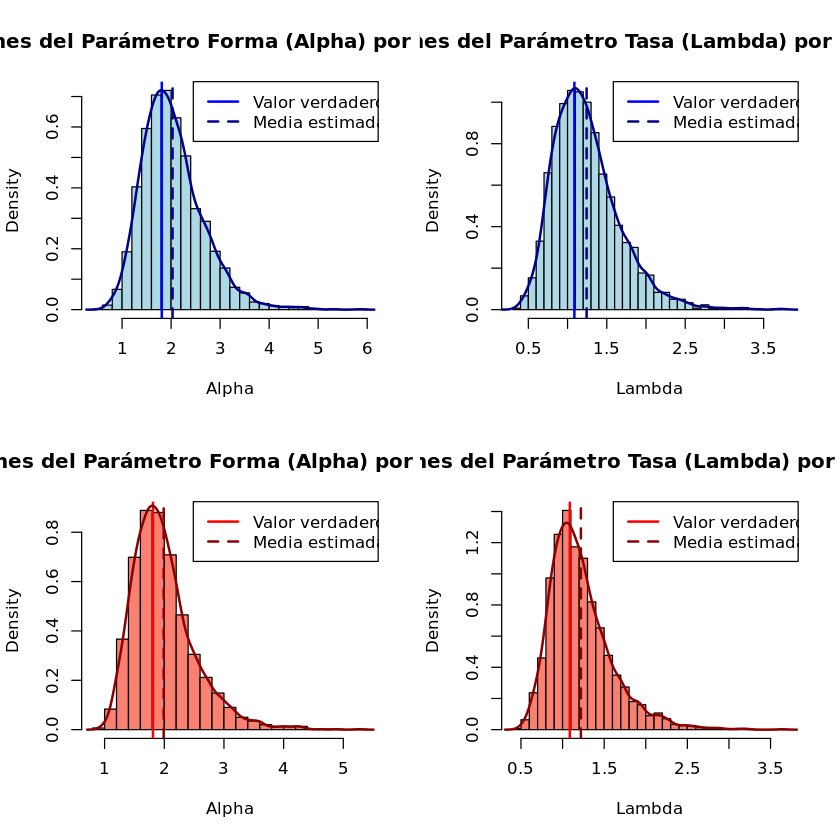


Estadísticas de simulación para clave: 196891 
Alpha verdadero: 2.8435 
Lambda verdadero: 1.5851 

Estadísticas del Estimador por Método de Momentos (EMM):
  Alpha - Media: 3.129471 DE: 0.9115376 
  Lambda - Media: 1.763173 DE: 0.5561131 

Estadísticas del Estimador por Máxima Verosimilitud (EMV):
  Alpha - Media: 3.135235 DE: 0.8210005 
  Lambda - Media: 1.766933 DE: 0.5124991 
Simulando 3000 muestras con alpha = 2.8906 y lambda = 2.0422 ...


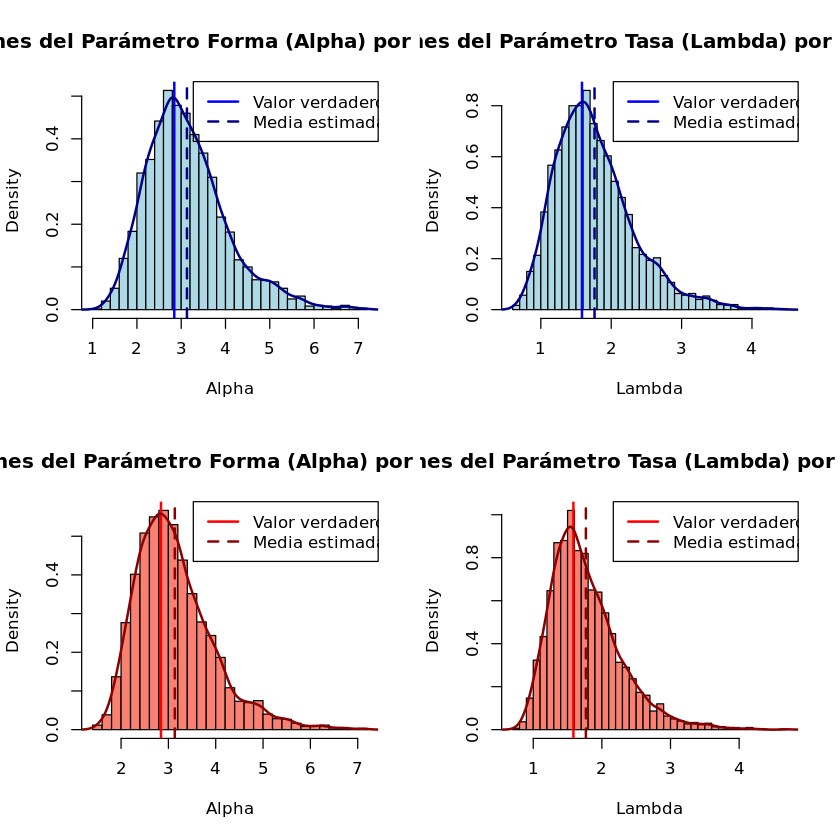


Estadísticas de simulación para clave: 198090 
Alpha verdadero: 2.8906 
Lambda verdadero: 2.0422 

Estadísticas del Estimador por Método de Momentos (EMM):
  Alpha - Media: 3.182704 DE: 0.9502323 
  Lambda - Media: 2.272505 DE: 0.7307453 

Estadísticas del Estimador por Máxima Verosimilitud (EMV):
  Alpha - Media: 3.187774 DE: 0.8582453 
  Lambda - Media: 2.276674 DE: 0.6717071 


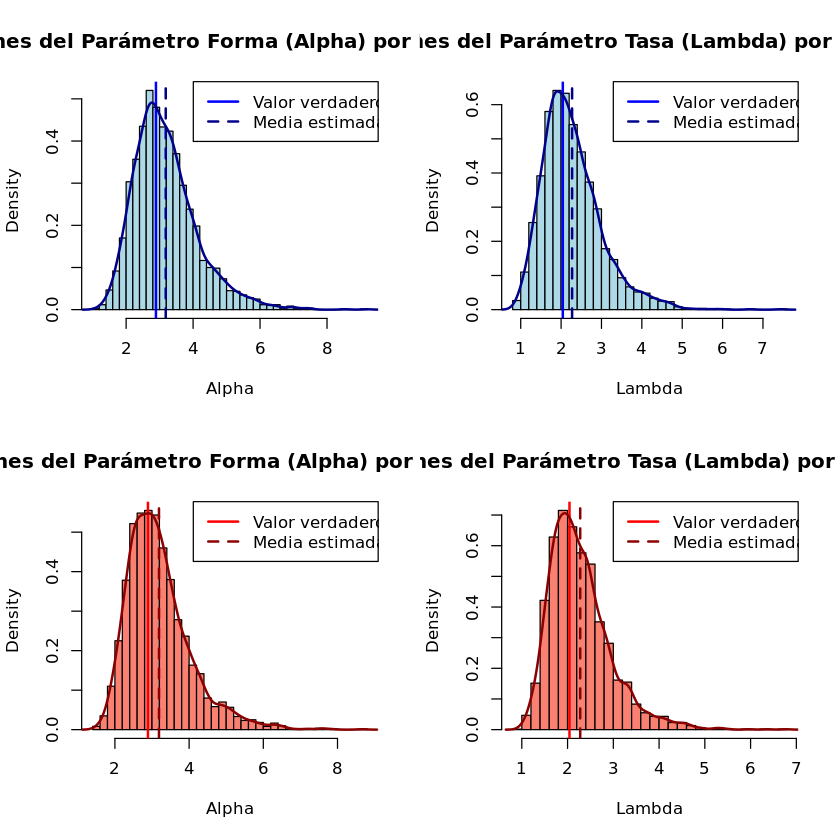

In [13]:
# Función para crear histogramas de simulación
crear_histogramas_simulacion <- function(clave, alpha_verdadero, lambda_verdadero, N = 3000) {
  cat("Simulando", N, "muestras con alpha =", alpha_verdadero, "y lambda =", lambda_verdadero, "...\n")
  
  # Simulación de muestras
  set.seed(456)
  muestras_simuladas <- lapply(1:N, function(i) {
    muestra <- rgamma(30, shape = alpha_verdadero, rate = lambda_verdadero)
    
    # Estimador por Método de Momentos (EMM)
    media <- mean(muestra)
    varianza <- var(muestra)
    lambda_emm <- media / varianza
    alpha_emm <- media^2 / varianza
    
    # Estimador por Máxima Verosimilitud (EMV)
    log_verosimilitud <- function(params, x) {
      alpha <- params[1]
      lambda <- params[2]
      
      if (alpha <= 0 || lambda <= 0) return(-Inf)
      
      n <- length(x)
      n * alpha * log(lambda) - n * lgamma(alpha) + 
        (alpha - 1) * sum(log(x)) - lambda * sum(x)
    }
    
    mle_opt <- optim(
      par = c(alpha_emm, lambda_emm),
      fn = function(params) -log_verosimilitud(params, muestra),
      method = "L-BFGS-B",
      lower = c(1e-8, 1e-8)
    )
    
    return(list(
      emm = list(alpha = alpha_emm, lambda = lambda_emm),
      emv = list(alpha = mle_opt$par[1], lambda = mle_opt$par[2])
    ))
  })
  
  # Extraer estimaciones
  emm_alphas <- sapply(muestras_simuladas, function(x) x$emm$alpha)
  emm_lambdas <- sapply(muestras_simuladas, function(x) x$emm$lambda)
  emv_alphas <- sapply(muestras_simuladas, function(x) x$emv$alpha)
  emv_lambdas <- sapply(muestras_simuladas, function(x) x$emv$lambda)
  
  # Calcular estadísticas
  emm_alpha_media <- mean(emm_alphas)
  emm_alpha_sd <- sd(emm_alphas)
  emm_lambda_media <- mean(emm_lambdas)
  emm_lambda_sd <- sd(emm_lambdas)
  emv_alpha_media <- mean(emv_alphas)
  emv_alpha_sd <- sd(emv_alphas)
  emv_lambda_media <- mean(emv_lambdas)
  emv_lambda_sd <- sd(emv_lambdas)
  
  # Configurar área de gráficos 2x2
  par(mfrow = c(2, 2))
  
  # Histograma de estimaciones alpha por EMM
  hist(emm_alphas, breaks = 30, 
       main = paste("Estimaciones del Parámetro Forma (Alpha) por EMM -", clave),
       xlab = "Alpha", col = "lightblue",
       probability = TRUE)
  abline(v = alpha_verdadero, col = "blue", lwd = 2)
  abline(v = emm_alpha_media, col = "darkblue", lty = 2, lwd = 2)
  lines(density(emm_alphas), col = "darkblue", lwd = 2)
  legend("topright", legend = c("Valor verdadero", "Media estimada"), 
         col = c("blue", "darkblue"), lwd = 2, lty = c(1, 2))
  
  # Histograma de estimaciones lambda por EMM
  hist(emm_lambdas, breaks = 30, 
       main = paste("Estimaciones del Parámetro Tasa (Lambda) por EMM -", clave),
       xlab = "Lambda", col = "lightblue",
       probability = TRUE)
  abline(v = lambda_verdadero, col = "blue", lwd = 2)
  abline(v = emm_lambda_media, col = "darkblue", lty = 2, lwd = 2)
  lines(density(emm_lambdas), col = "darkblue", lwd = 2)
  legend("topright", legend = c("Valor verdadero", "Media estimada"), 
         col = c("blue", "darkblue"), lwd = 2, lty = c(1, 2))
  
  # Histograma de estimaciones alpha por EMV
  hist(emv_alphas, breaks = 30, 
       main = paste("Estimaciones del Parámetro Forma (Alpha) por EMV -", clave),
       xlab = "Alpha", col = "salmon",
       probability = TRUE)
  abline(v = alpha_verdadero, col = "red", lwd = 2)
  abline(v = emv_alpha_media, col = "darkred", lty = 2, lwd = 2)
  lines(density(emv_alphas), col = "darkred", lwd = 2)
  legend("topright", legend = c("Valor verdadero", "Media estimada"), 
         col = c("red", "darkred"), lwd = 2, lty = c(1, 2))
  
  # Histograma de estimaciones lambda por EMV
  hist(emv_lambdas, breaks = 30, 
       main = paste("Estimaciones del Parámetro Tasa (Lambda) por EMV -", clave),
       xlab = "Lambda", col = "salmon",
       probability = TRUE)
  abline(v = lambda_verdadero, col = "red", lwd = 2)
  abline(v = emv_lambda_media, col = "darkred", lty = 2, lwd = 2)
  lines(density(emv_lambdas), col = "darkred", lwd = 2)
  legend("topright", legend = c("Valor verdadero", "Media estimada"), 
         col = c("red", "darkred"), lwd = 2, lty = c(1, 2))
  
  # Volver a configurar para un solo gráfico
  par(mfrow = c(1, 1))
  
  cat("\nEstadísticas de simulación para clave:", clave, "\n")
  cat("Alpha verdadero:", alpha_verdadero, "\n")
  cat("Lambda verdadero:", lambda_verdadero, "\n")
  cat("\nEstadísticas del Estimador por Método de Momentos (EMM):\n")
  cat("  Alpha - Media:", emm_alpha_media, "DE:", emm_alpha_sd, "\n")
  cat("  Lambda - Media:", emm_lambda_media, "DE:", emm_lambda_sd, "\n")
  cat("\nEstadísticas del Estimador por Máxima Verosimilitud (EMV):\n")
  cat("  Alpha - Media:", emv_alpha_media, "DE:", emv_alpha_sd, "\n")
  cat("  Lambda - Media:", emv_lambda_media, "DE:", emv_lambda_sd, "\n")
}

# Ejemplo de uso:
# Para usar esta función, simplemente llame:
# crear_histogramas_simulacion("clave1", 2.0, 0.5)
# crear_histogramas_simulacion("clave2", 5.0, 1.0)
# crear_histogramas_simulacion("clave3", 1.0, 0.2)

# Para las claves especificadas:
crear_histogramas_simulacion("195557", 1.8106, 1.0870)
crear_histogramas_simulacion("196891", 2.8435, 1.5851)
crear_histogramas_simulacion("198090", 2.8906, 2.0422)

In [5]:
# Leer el archivo asegurando formato correcto
muestra_total1 <- read.table("Tarea21.dat", header = TRUE, fill = TRUE, na.strings = "NA")

# Lista de claves
claves <- c("X198090", "X196891", "X195557")

# Iterar sobre cada clave y calcular los estimadores
for (clave in claves) {
  cat("\nClave:", clave, "\n")
  
  # Extraer la muestra correspondiente a la clave
  muestra1 <- muestra_total1[[clave]]
  muestra1 <- as.numeric(na.omit(muestra1))  # Convertir a numérico y eliminar NAs
  
  # Asegurar que la muestra tenga tamaño n = 20
  if (length(muestra1) < 20) {
    cat("Error: La muestra para la clave", clave, "tiene menos de 20 observaciones.\n")
    next
  }
  
  # Método de momentos
  theta_mom <- min(muestra1)  
  
  # Método de Máxima Verosimilitud
  theta_mv <- min(muestra1)   
  
  # Imprimir resultados
  cat("Estimador método de momentos (theta_mom):", theta_mom, "\n")
  cat("Estimador máxima verosimilitud (theta_mv):", theta_mv, "\n")
  
  # Calcular nuevos estimadores
  muestra_ordenada <- sort(muestra1)
  n_muestra <- length(muestra1)
  X1 <- muestra_ordenada[1]  # Mínimo de la muestra
  Xn <- muestra_ordenada[n_muestra]  # Máximo de la muestra
  
  # Cálculo de los estimadores de máxima verosimilitud
  mu_mv <- (X1 + Xn) / 2
  sigma_mv <- (Xn - X1) / (2 * sqrt(3))
  
  cat("Estimador de máxima verosimilitud para mu:", mu_mv, "\n")
  cat("Estimador de máxima verosimilitud para sigma:", sigma_mv, "\n")
  
  # Simulación de N=5000 muestras para validar la distribución de los estimadores
  set.seed(123)
  N <- 5000  # Número de simulaciones
  sim_mu_mv <- numeric(N)
  sim_sigma_mv <- numeric(N)
  
  for (i in 1:N) {
    muestra_sim <- sample(muestra1, size = n_muestra, replace = TRUE)  # Bootstrap
    muestra_ordenada <- sort(muestra_sim)
    X1 <- muestra_ordenada[1]
    Xn <- muestra_ordenada[n_muestra]
    
    # Estimadores de máxima verosimilitud
    sim_mu_mv[i] <- (X1 + Xn) / 2
    sim_sigma_mv[i] <- (Xn - X1) / (2 * sqrt(3))
  }
  
  # Análisis de la distribución de los estimadores
  cat("Media de mu estimado:", mean(sim_mu_mv), "\n")
  cat("Varianza de mu estimado:", var(sim_mu_mv), "\n")
  cat("Media de sigma estimado:", mean(sim_sigma_mv), "\n")
  cat("Varianza de sigma estimado:", var(sim_sigma_mv), "\n")
}



Clave: X198090 
Estimador método de momentos (theta_mom): -0.9199078 
Estimador máxima verosimilitud (theta_mv): -0.9199078 
Estimador de máxima verosimilitud para mu: 0.02677717 
Estimador de máxima verosimilitud para sigma: 0.5465688 
Media de mu estimado: 0.03402387 
Varianza de mu estimado: 0.004809257 
Media de sigma estimado: 0.5127234 
Varianza de sigma estimado: 0.001421769 

Clave: X196891 
Estimador método de momentos (theta_mom): -0.6684703 
Estimador máxima verosimilitud (theta_mv): -0.6684703 
Estimador de máxima verosimilitud para mu: 0.1597395 
Estimador de máxima verosimilitud para sigma: 0.4781671 
Media de mu estimado: 0.116131 
Varianza de mu estimado: 0.005082252 
Media de sigma estimado: 0.4454008 
Varianza de sigma estimado: 0.001654114 

Clave: X195557 
Estimador método de momentos (theta_mom): -0.6866193 
Estimador máxima verosimilitud (theta_mv): -0.6866193 
Estimador de máxima verosimilitud para mu: 0.122684 
Estimador de máxima verosimilitud para sigma: 0.46

#### Pregunta 5: 

Estimador método de momentos (theta_mom): -0.9199078 
Estimador máxima verosimilitud (theta_mv): -0.9199078 
Estimador de máxima verosimilitud para mu: 1.415389 
Estimador de máxima verosimilitud para sigma^2: 0.8942962 
La matriz Hessiana es definida negativa: TRUE 
Estimador de máxima verosimilitud para mu: 2.32797 
Estimador de máxima verosimilitud para sigma: 1.106696 
Estimador de momentos alpha_mom: 2.176113 
Estimador de momentos lambda_mom: 1.537466 
Estimador de máxima verosimilitud alpha_mv: 2.890545 
Estimador de máxima verosimilitud lambda_mv: 2.042225 


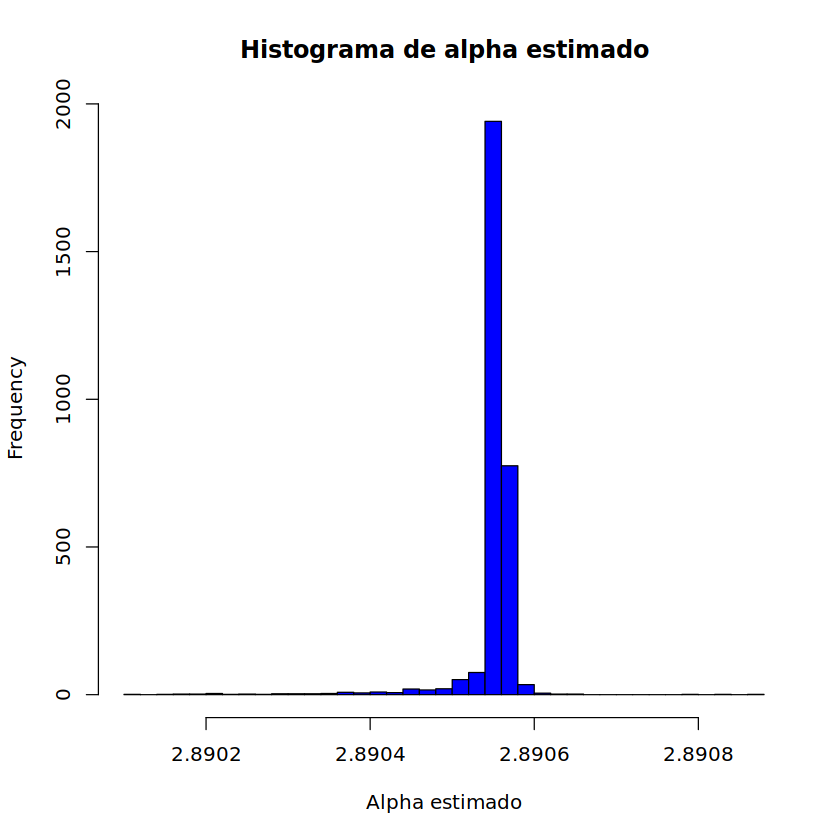

ERROR: Error in optim(par = runif(1, 0.2, 0.8), fn = log_likelihood, method = "L-BFGS-B", : L-BFGS-B needs finite values of 'fn'


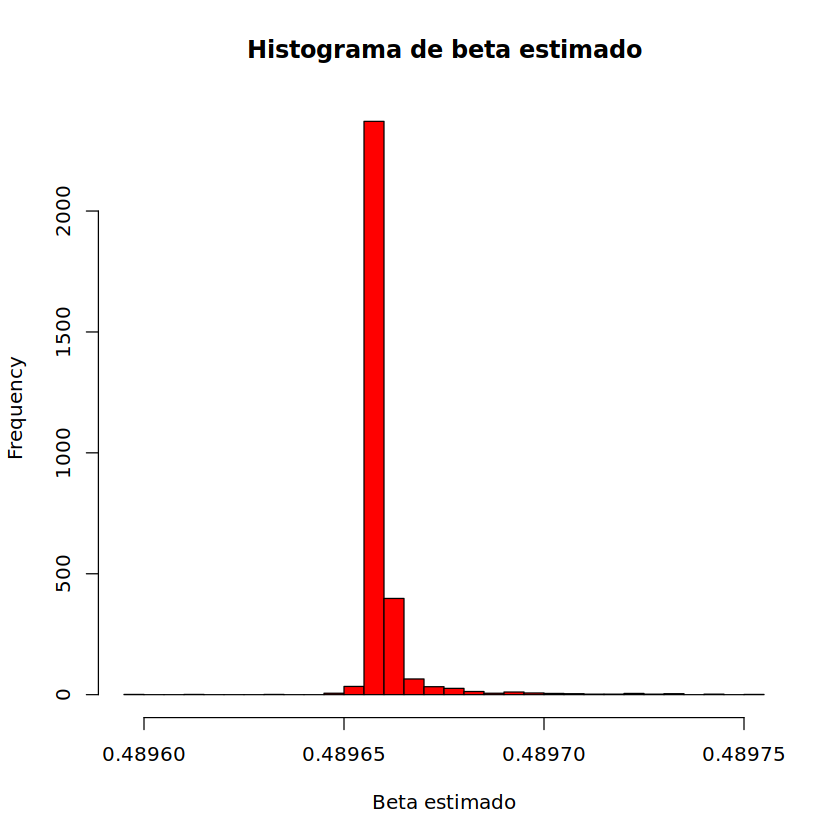

In [ ]:


# Inciso (a): Estimadores de método de momentos y máxima verosimilitud para theta (Uniforme)
theta_mom <- min(muestra1)
theta_mv <- min(muestra1)
cat("Estimador método de momentos (theta_mom):", theta_mom, "\n")
cat("Estimador máxima verosimilitud (theta_mv):", theta_mv, "\n")

# Inciso (b): Estimadores de máxima verosimilitud para Normal
mu_hat <- mean(muestra2)
sigma2_hat <- var(muestra2) * (n2 - 1) / n2
H <- matrix(c(-n2/sigma2_hat, 0, 0, -n2/(2*sigma2_hat^2)), nrow=2)
es_def_neg <- all(eigen(H)$values < 0)
cat("Estimador de máxima verosimilitud para mu:", mu_hat, "\n")
cat("Estimador de máxima verosimilitud para sigma^2:", sigma2_hat, "\n")
cat("La matriz Hessiana es definida negativa:", es_def_neg, "\n")

# Inciso (c): Estimadores de máxima verosimilitud basados en valores extremos
muestra_ordenada <- sort(muestra2)
X1 <- muestra_ordenada[1]
Xn <- muestra_ordenada[n2]
mu_mv <- (X1 + Xn) / 2
sigma_mv <- (Xn - X1) / (2 * sqrt(3))
cat("Estimador de máxima verosimilitud para mu:", mu_mv, "\n")
cat("Estimador de máxima verosimilitud para sigma:", sigma_mv, "\n")

# Inciso (d): Estimadores de momentos y máxima verosimilitud para la distribución gamma
alpha_mom <- (mean(muestra2)^2) / var(muestra2)
lambda_mom <- mean(muestra2) / var(muestra2)
cat("Estimador de momentos alpha_mom:", alpha_mom, "\n")
cat("Estimador de momentos lambda_mom:", lambda_mom, "\n")
log_verosimilitud <- function(params) {
  alpha <- params[1]
  lambda <- params[2]
  if (alpha <= 0 || lambda <= 0 || !is.finite(alpha) || !is.finite(lambda)) return(Inf)
  likelihood_values <- dgamma(muestra2, shape = alpha, rate = lambda, log = TRUE)
  if (any(!is.finite(likelihood_values))) return(Inf)
  -sum(likelihood_values)
}
resultado <- optim(par = c(max(0.1, alpha_mom), max(0.1, lambda_mom)), fn = log_verosimilitud, method = "L-BFGS-B", lower = c(0.01, 0.01))
alpha_mv <- resultado$par[1]
lambda_mv <- resultado$par[2]
cat("Estimador de máxima verosimilitud alpha_mv:", alpha_mv, "\n")
cat("Estimador de máxima verosimilitud lambda_mv:", lambda_mv, "\n")

# Inciso (e): Simulación de N=3000 muestras y generación de histogramas
set.seed(123)
N <- 3000
sim_alpha_mv <- numeric(N)
sim_beta_mv <- numeric(N)
for (i in 1:N) {
  sim_muestra <- rgamma(n2, shape = alpha_mv, rate = lambda_mv)
  resultado <- optim(par = c(runif(1, 0.5 * alpha_mv, 1.5 * alpha_mv), runif(1, 0.5 * lambda_mv, 1.5 * lambda_mv)), fn = log_verosimilitud, method = "L-BFGS-B", lower = c(0.01, 0.01))
  sim_alpha_mv[i] <- resultado$par[1]
  sim_beta_mv[i] <- 1 / resultado$par[2]
}
hist(sim_alpha_mv, main = "Histograma de alpha estimado", xlab = "Alpha estimado", col = "blue", breaks = 50)
hist(sim_beta_mv, main = "Histograma de beta estimado", xlab = "Beta estimado", col = "red", breaks = 50)

# Inciso (f): Generación de 5000 muestras y estimación en una distribución angular
set.seed(123)
N <- 5000
n_muestra <- 35
alpha_real <- 0.75
sim_alpha_tilde <- numeric(N)
sim_alpha_hat <- numeric(N)
for (i in 1:N) {
  muestra_sim <- rbeta(n_muestra, alpha_real, 1 - alpha_real)
  sim_alpha_tilde[i] <- mean(muestra_sim)
  log_likelihood <- function(alpha) {
    if (alpha <= 0 || alpha >= 1 || !is.finite(alpha)) return(Inf)
    likelihood_values <- dbeta(muestra_sim, alpha, 1 - alpha, log = TRUE)
    if (any(!is.finite(likelihood_values))) return(Inf)
    -sum(likelihood_values)
  }
  resultado <- optim(par = runif(1, 0.2, 0.8), fn = log_likelihood, method = "L-BFGS-B", lower = 0.01, upper = 0.99)
  if (!is.null(resultado$par) && is.finite(resultado$par)) {
    sim_alpha_hat[i] <- resultado$par
  } else {
    sim_alpha_hat[i] <- NA  # Evitar valores no válidos
  }
}
sim_alpha_hat <- na.omit(sim_alpha_hat)
hist(sim_alpha_tilde, main = "Histograma de α̃ estimado", xlab = "α̃ estimado", col = "blue", breaks = 50)
hist(sim_alpha_hat, main = "Histograma de α̂ estimado", xlab = "α̂ estimado", col = "red", breaks = 50)



Starting simulation...
  |                                                                      |   0%

  |======================================================================| 100%

Summary Statistics (after filtering):
Number of valid samples: 4129 out of 5000 

Method of Moments Estimator (alpha_tilde):
Mean: 0.6696887 
Variance: 0.04300503 
Theoretical Variance: 0.06964286 

Maximum Likelihood Estimator (alpha_hat):
Mean: 0.6935898 
Variance: 0.04465401 

Empirical Relative Efficiency: 1.038344 


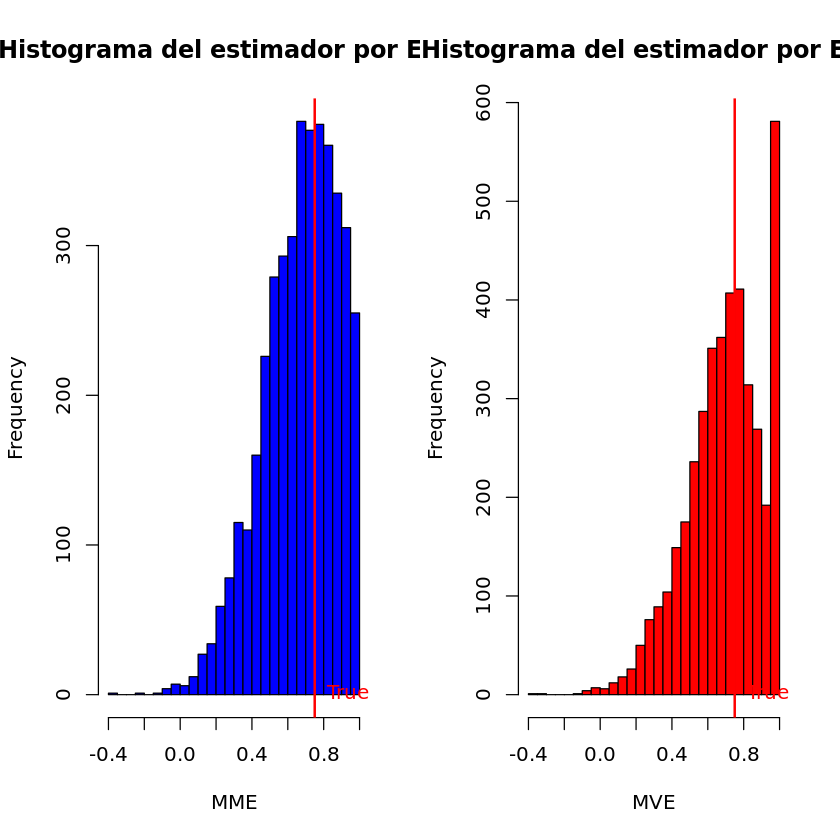

In [15]:
# Corrected simulation for part (f)
set.seed(123)
N <- 5000
n_muestra <- 35
alpha_real <- 0.75

# Function to sample from angular distribution f(x;alpha) = (1 + alpha*x)/2 for x in [-1,1]
r_angular <- function(n, alpha) {
  # Use rejection sampling instead of inverse transform
  samples <- numeric(n)
  for (i in 1:n) {
    accept <- FALSE
    while (!accept) {
      # Generate uniform on [-1, 1]
      x <- runif(1, -1, 1)
      # Accept with probability proportional to (1 + alpha*x)/2
      u <- runif(1, 0, 1)
      if (u <= (1 + alpha*x)/(1 + abs(alpha))) {
        samples[i] <- x
        accept <- TRUE
      }
    }
  }
  return(samples)
}

sim_alpha_tilde <- numeric(N)  # Method of moments estimator
sim_alpha_hat <- numeric(N)    # Maximum likelihood estimator

# Progress indicator
cat("Starting simulation...\n")
pb <- txtProgressBar(min = 0, max = N, style = 3)

for (i in 1:N) {
  # Generate sample from angular distribution
  muestra_sim <- r_angular(n_muestra, alpha_real)
  
  # Method of moments estimator: alpha_tilde = 3 * mean(x)
  sim_alpha_tilde[i] <- 3 * mean(muestra_sim)
  
  # Maximum likelihood estimator
  mle_obj <- function(alpha) {
    # Check bounds
    if (abs(alpha) >= 1) return(1e10)
    
    # Avoid numerical issues
    sum_log_terms <- 0
    for (x in muestra_sim) {
      term <- 1 + alpha * x
      if (term <= 0) return(1e10)  # Invalid value
      sum_log_terms <- sum_log_terms + log(term)
    }
    
    # Return negative log-likelihood
    return(-(sum_log_terms - n_muestra * log(2)))
  }
  
  # Use optimize with safe bounds
  resultado <- try(optimize(mle_obj, interval = c(-0.99, 0.99)), silent = TRUE)
  
  if (!inherits(resultado, "try-error")) {
    sim_alpha_hat[i] <- resultado$minimum
  } else {
    # Use a grid search as fallback
    alpha_vals <- seq(-0.95, 0.95, by = 0.05)
    lik_vals <- sapply(alpha_vals, mle_obj)
    best_idx <- which.min(lik_vals)
    sim_alpha_hat[i] <- alpha_vals[best_idx]
  }
  
  # Update progress bar
  setTxtProgressBar(pb, i)
}
close(pb)

# Remove any problematic values (outside theoretical range)
valid_indices <- !is.na(sim_alpha_tilde) & !is.na(sim_alpha_hat) & 
                abs(sim_alpha_tilde) <= 1 & abs(sim_alpha_hat) <= 1
sim_alpha_tilde <- sim_alpha_tilde[valid_indices]
sim_alpha_hat <- sim_alpha_hat[valid_indices]

# Print summary statistics
cat("\nSummary Statistics (after filtering):\n")
cat("Number of valid samples:", sum(valid_indices), "out of", N, "\n\n")

cat("Method of Moments Estimator (alpha_tilde):\n")
cat("Mean:", mean(sim_alpha_tilde), "\n")
cat("Variance:", var(sim_alpha_tilde), "\n")
cat("Theoretical Variance:", (3 - alpha_real^2)/n_muestra, "\n\n")

cat("Maximum Likelihood Estimator (alpha_hat):\n")
cat("Mean:", mean(sim_alpha_hat), "\n")
cat("Variance:", var(sim_alpha_hat), "\n\n")

# Calculate empirical relative efficiency
em_re <- var(sim_alpha_hat)/var(sim_alpha_tilde)
cat("Empirical Relative Efficiency:", em_re, "\n")

# Create histograms with ASCII-safe labels
par(mfrow = c(1, 2))
hist(sim_alpha_tilde, main = "Histograma del estimador por EMM", 
     xlab = "MME", col = "blue", breaks = 30)
abline(v = alpha_real, col = "red", lwd = 2)
text(alpha_real, 0, "True alpha", pos = 4, col = "red")

hist(sim_alpha_hat, main = "Histograma del estimador por EMV", 
     xlab = "MVE", col = "red", breaks = 30)
abline(v = alpha_real, col = "red", lwd = 2)
text(alpha_real, 0, "True alpha", pos = 4, col = "red")

a) Varianza del estimador por método de momentos
Fórmula: var(α̃) = (3 - α²) / n
Ejemplo: Para α = 0.5, n = 35, var(α̃) = 0.07857143 

b) Probabilidad usando el Teorema del Límite Central
Para n = 25 y α = 0, P(|α̃| > 0.5) = 0.1489147 

c) Varianza asintótica del estimador por máxima verosimilitud
Función de información de Fisher: I(α) = (1/2α³)[log((1+α)/(1-α)) - 2α]
Ejemplo: Para α = 0.5, I(α) = 0.3944492 
        Para α = 0.5, n = 35, var(α̂) ≈ 0.07243374 

e) Tabla de Eficiencia Relativa para diferentes valores de α
  k  alpha relative_efficiency
  1 0.0000           1.0000000
  2 0.0825           0.9981777
  3 0.1650           0.9926215
  4 0.2475           0.9830533
  5 0.3300           0.9689718
  6 0.4125           0.9495863
  7 0.4950           0.9236979
  8 0.5775           0.8894883
  9 0.6600           0.8441184
 10 0.7425           0.7828880
 11 0.8250           0.6971365
 12 0.9075           0.5669651
 13 0.9900           0.2899642


Warning message in title(...):
“conversion failure on 'Eficiencia Relativa vs. α' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in title(...):
“conversion failure on 'Eficiencia Relativa vs. α' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in title(...):
“conversion failure on 'Valor del parámetro α' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in title(...):
“conversion failure on 'Valor del parámetro α' in 'mbcsToSbcs': dot substituted for <b1>”


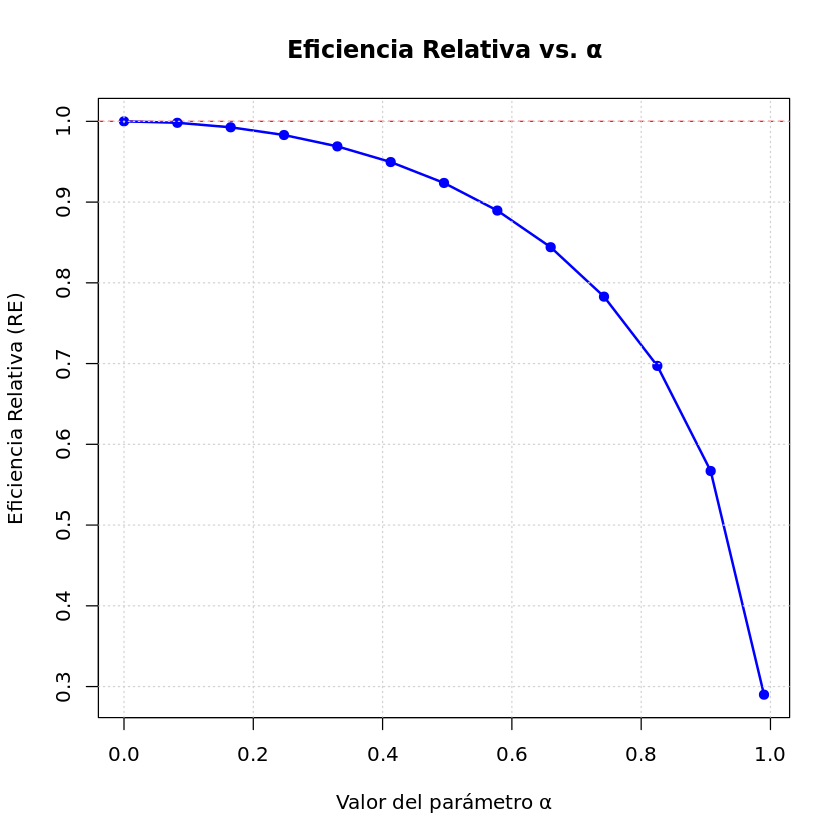

In [16]:
# Análisis de la Distribución Angular en el Decaimiento de Muones

# a) Varianza del estimador por método de momentos
variance_mm <- function(alpha, n) {
  return((3 - alpha^2) / n)
}

# b) Probabilidad usando el Teorema del Límite Central
prob_mm_exceeds <- function(threshold, true_alpha, n) {
  # Varianza de alpha_tilde cuando alpha = 0
  var_mm <- variance_mm(true_alpha, n)
  
  # Usando el Teorema del Límite Central
  prob <- 2 * (1 - pnorm(threshold / sqrt(var_mm)))
  return(prob)
}

# c) Función de información de Fisher
fisher_info <- function(alpha) {
  result <- (1 / (2 * alpha^3)) * (log((1 + alpha)/(1 - alpha)) - 2 * alpha)
  return(result)
}

# Varianza asintótica del estimador por máxima verosimilitud
variance_ml <- function(alpha, n) {
  return(1 / (n * fisher_info(alpha)))
}

# d) y e) Eficiencia relativa
relative_efficiency <- function(alpha, n) {
  var_mm <- variance_mm(alpha, n)
  var_ml <- variance_ml(alpha, n)
  return(var_ml / var_mm)
}

# Crear tabla de eficiencia relativa para diferentes valores de alpha
alpha_values <- seq(0, 0.99, length.out = 13)
n <- 35  # Tamaño de muestra

# Crear tabla
re_table <- data.frame(
  k = 1:13,
  alpha = alpha_values,
  relative_efficiency = sapply(alpha_values, function(a) {
    if (abs(a) < 1e-10) {
      # Para alpha cercano a cero
      return(1.0)
    } else {
      return(relative_efficiency(a, n))
    }
  })
)

# Imprimir resultados para sección a)
cat("a) Varianza del estimador por método de momentos\n")
cat("Fórmula: var(α̃) = (3 - α²) / n\n")
cat("Ejemplo: Para α = 0.5, n = 35, var(α̃) =", variance_mm(0.5, 35), "\n\n")

# Imprimir resultados para sección b)
cat("b) Probabilidad usando el Teorema del Límite Central\n")
cat("Para n = 25 y α = 0, P(|α̃| > 0.5) =", prob_mm_exceeds(0.5, 0, 25), "\n\n")

# Imprimir resultados para sección c)
cat("c) Varianza asintótica del estimador por máxima verosimilitud\n")
cat("Función de información de Fisher: I(α) = (1/2α³)[log((1+α)/(1-α)) - 2α]\n")
cat("Ejemplo: Para α = 0.5, I(α) =", fisher_info(0.5), "\n")
cat("        Para α = 0.5, n = 35, var(α̂) ≈", variance_ml(0.5, 35), "\n\n")

# Imprimir tabla para sección e)
cat("e) Tabla de Eficiencia Relativa para diferentes valores de α\n")
print(re_table, row.names = FALSE)

# Generar gráfico de eficiencia relativa
plot(alpha_values, re_table$relative_efficiency, type = "l", col = "blue", lwd = 2,
     xlab = "Valor del parámetro α", ylab = "Eficiencia Relativa (RE)",
     main = "Eficiencia Relativa vs. α")
abline(h = 1, col = "red", lty = 2)
points(alpha_values, re_table$relative_efficiency, pch = 19, col = "blue")
grid()

# Guardamos los resultados en tablas para facilitar su inclusión en documentos
write.csv(re_table, "eficiencia_relativa.csv", row.names = FALSE)